Este análisis exploratorio busca entender los patrones de movilidad en la ciudad de Natales a partir de la Encuesta Origen Destino 2024, con un enfoque en las desigualdades relacionadas al género, edad y condición de discapacidad. El objetivo es identificar quiénes se mueven, quiénes no, y qué factores podrían influir en su movilidad.

### Carga de datos y configuraciones iniciales

In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Configuraciones
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
#Crea carpeta para guardar graficos
import os
if not os.path.exists('graficos'):
    os.makedirs('graficos')

In [4]:
#dataset limpios
persona = pd.read_csv("persona_limpio.csv")
hogar = pd.read_csv("hogar_limpio.csv")
viaje = pd.read_csv("viajes_limpio.csv")
vehiculo = pd.read_csv("vehiculo_limpio.csv")
bicicleta = pd.read_csv("bicicleta_limpio.csv")
etapa = pd.read_csv("etapa_limpio.csv")
localizacion = pd.read_csv("localizacion_limpio.csv")

### Exploración general

In [5]:
def resumen_general(df, nombre):
    print(f"\nResumen de: {nombre}")
    display(df.info())
    display(df.describe(include='all'))
    print("Duplicados:", df.duplicated().sum())

resumen_general(hogar, 'hogar')
resumen_general(persona, 'persona')
resumen_general(viaje, 'viaje')
resumen_general(etapa, 'etapa')
resumen_general(vehiculo, 'vehiculo')
resumen_general(bicicleta, 'bicicleta')
resumen_general(localizacion, 'localizacion')


Resumen de: hogar
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   folio                     518 non-null    int64  
 1   direccioncomuna           518 non-null    object 
 2   zona_hogar                518 non-null    int64  
 3   sector_hogar              518 non-null    object 
 4   diaentrevista             518 non-null    int64  
 5   mesentrevista             518 non-null    int64  
 6   horaentrevista            518 non-null    int64  
 7   minutoentrevista          518 non-null    int64  
 8   diaregistroviaje          518 non-null    int64  
 9   mesregistroviaje          518 non-null    int64  
 10  tamanofamiliar            518 non-null    int64  
 11  tipovivienda              518 non-null    object 
 12  situacionvivienda         518 non-null    object 
 13  dividendo                 10 non-null     floa

None

folio direccioncomuna  zona_hogar     sector_hogar  \
count     518.000000             518  518.000000              518   
unique           NaN               1         NaN                7   
top              NaN  Puerto natales         NaN  Residencial Sur   
freq             NaN             518         NaN              158   
mean    11347.577220             NaN   28.426641              NaN   
std       888.034894             NaN   14.863448              NaN   
min     10011.000000             NaN    1.000000              NaN   
25%     10654.250000             NaN   15.000000              NaN   
50%     11301.500000             NaN   30.000000              NaN   
75%     11951.750000             NaN   41.000000              NaN   
max     15171.000000             NaN   50.000000              NaN   

        diaentrevista  mesentrevista  horaentrevista  minutoentrevista  \
count      518.000000     518.000000      518.000000        518.000000   
unique            NaN            NaN             NaN               NaN   
top               NaN            NaN             NaN               NaN   
freq              NaN            NaN             NaN               NaN   
mean        17.366795       6.370656       15.509653         20.868726   
std          9.820862       1.363261        2.734355         18.952913   
min          1.000000       5.000000        9.000000          0.000000   
25%          8.000000       5.000000       14.000000          0.000000   
50%         17.000000       6.000000       16.000000         19.000000   
75%         26.000000       8.000000       18.000000         35.750000   
max         31.000000       9.000000       21.000000         59.000000   

        diaregistroviaje  mesregistroviaje  ...  numeroestudiantes  \
count         518.000000        518.000000  ...         518.000000   
unique               NaN               NaN  ...                NaN   
top                  NaN               NaN  ...                NaN   
freq                 NaN               NaN  ...                NaN   
mean           16.517375          6.438224  ...           0.395753   
std             9.906658          1.356639  ...           0.727826   
min             1.000000          5.000000  ...           0.000000   
25%             8.000000          5.000000  ...           0.000000   
50%            17.000000          6.000000  ...           0.000000   
75%            25.000000          8.000000  ...           1.000000   
max            31.000000          9.000000  ...           5.000000   

       numeroviajes viajescaminata  tramovehiculo  \
count    518.000000     518.000000            518   
unique          NaN            NaN              4   
top             NaN            NaN     1 Vehiculo   
freq            NaN            NaN            230   
mean       4.799228       1.299228            NaN   
std        4.513277       2.393018            NaN   
min        0.000000       0.000000            NaN   
25%        2.000000       0.000000            NaN   
50%        4.000000       0.000000            NaN   
75%        7.000000       2.000000            NaN   
max       34.000000      20.000000            NaN   

                                 tramoingresohogar  tipodia        zona  \
count                                          518      518  518.000000   
unique                                           4        2         NaN   
top     Ingreso Medio: entre $450.001 y $1.035.000  laboral         NaN   
freq                                           199      453         NaN   
mean                                           NaN      NaN   28.426641   
std                                            NaN      NaN   14.863448   
min                                            NaN      NaN    1.000000   
25%                                            NaN      NaN   15.000000   
50%                                            NaN      NaN   30.000000   
75%                                            NaN      NaN   41.0000

Duplicados: 0

Resumen de: persona
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   folio                       1000 non-null   int64  
 1   ordenpersona                1000 non-null   int64  
 2   diaentrevista               1000 non-null   int64  
 3   mesentrevista               1000 non-null   int64  
 4   horaentrevista              1000 non-null   int64  
 5   minutoentrevista            1000 non-null   int64  
 6   sexo                        1000 non-null   object 
 7   parentesco                  1000 non-null   object 
 8   mesnacimiento               1000 non-null   int64  
 9   agnonacimiento              1000 non-null   int64  
 10  tenencialicenciaconducir    1000 non-null   object 
 11  tenenciatne                 1000 non-null   object 
 12  tenenciatarjetaadultomayor  1000 non-null   object 
 13 

None

folio  ordenpersona  diaentrevista  mesentrevista  \
count    1000.00000   1000.000000    1000.000000    1000.000000   
unique          NaN           NaN            NaN            NaN   
top             NaN           NaN            NaN            NaN   
freq            NaN           NaN            NaN            NaN   
mean    11069.33500      2.039000      14.940000       6.493000   
std       605.86066      1.197043       9.919516       1.404964   
min     10011.00000      1.000000       1.000000       5.000000   
25%     10541.00000      1.000000       4.000000       5.000000   
50%     11092.00000      2.000000      17.000000       6.000000   
75%     11552.00000      3.000000      25.000000       8.000000   
max     12101.00000      9.000000      31.000000       9.000000   

        horaentrevista  minutoentrevista     sexo        parentesco  \
count      1000.000000       1000.000000     1000              1000   
unique             NaN               NaN        2                 7   
top                NaN               NaN  Mujeres  Jefe(a) de hogar   
freq               NaN               NaN      528               423   
mean         15.457000         23.118000      NaN               NaN   
std           3.064236         17.340437      NaN               NaN   
min           9.000000          0.000000      NaN               NaN   
25%          14.000000         10.000000      NaN               NaN   
50%          16.000000         20.000000      NaN               NaN   
75%          18.000000         38.250000      NaN               NaN   
max          21.000000         59.000000      NaN               NaN   

        mesnacimiento  agnonacimiento  ... campanadiario campanaradio  \
count     1000.000000      1000.00000  ...          1000         1000   
unique            NaN             NaN  ...             1            2   
top               NaN             NaN  ...            No           No   
freq              NaN             NaN  ...          1000          878   
mean         6.370000      1978.02200  ...           NaN          NaN   
std          3.377056        22.73791  ...           NaN          NaN   
min          1.000000      1920.00000  ...           NaN          NaN   
25%          4.000000      1960.00000  ...           NaN          NaN   
50%          6.000000      1977.00000  ...           NaN          NaN   
75%          9.000000      1994.00000  ...           NaN          NaN   
max         12.000000      2022.00000  ...           NaN          NaN   

       campanatelevision  campanaafiche campanapasacalle campanapersonas  \
count               1000           1000             1000            1000   
unique                 2              2                2               1   
top                   No             No               No              No   
freq                 989            920              910            1000   
mean                 NaN            NaN              NaN             NaN   
std                  NaN            NaN              NaN             NaN   
min                  NaN            NaN              NaN             NaN   
25%                  NaN            NaN              NaN             NaN   
50%                  NaN            NaN              NaN             NaN   
75%                  NaN            NaN              NaN             NaN   
max                  NaN            NaN              NaN             NaN   

               edad        tramoedad ingresopersonal factorexpansionp  
count   1000.000000             1000            1000             1000  
unique          NaN                7              39              318  
top             NaN  De 30 a 64 años             0.0            5,345  
freq            NaN              508             273               23  
mean      43.532000              NaN             NaN              NaN  
std       22.741111              NaN             NaN              NaN  
min        0.000000              NaN             NaN          

Duplicados: 0

Resumen de: viaje
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   folio                    1000 non-null   int64 
 1   ordenpersona             1000 non-null   int64 
 2   ordenviaje               1000 non-null   int64 
 3   proposito                1000 non-null   object
 4   propositovc              1000 non-null   object
 5   origenactividadcomuna    1000 non-null   object
 6   lugaractividadcomuna     1000 non-null   object
 7   actividadempresa         208 non-null    object
 8   tipoasiento              1000 non-null   object
 9   modoetapa1               1000 non-null   object
 10  cuadrascaminadasdespues  1000 non-null   int64 
 11  minutoscaminadosdespues  1000 non-null   int64 
 12  horallegadahora          1000 non-null   int64 
 13  horallegadaminuto        1000 non-null   int64 
 14  horavolv

None

folio  ordenpersona   ordenviaje      proposito propositovc  \
count    1000.000000   1000.000000  1000.000000           1000        1000   
unique           NaN           NaN          NaN             12          12   
top              NaN           NaN          NaN  Volver a casa   No aplica   
freq             NaN           NaN          NaN            475         525   
mean    10524.988000      1.938000     2.535000            NaN         NaN   
std       314.204772      1.128463     1.895882            NaN         NaN   
min     10011.000000      1.000000     1.000000            NaN         NaN   
25%     10232.000000      1.000000     1.000000            NaN         NaN   
50%     10532.000000      2.000000     2.000000            NaN         NaN   
75%     10792.000000      2.000000     3.000000            NaN         NaN   
max     11042.000000      7.000000    18.000000            NaN         NaN   

       origenactividadcomuna lugaractividadcomuna actividadempresa  \
count                   1000                 1000              208   
unique                     4                    5                8   
top           Puerto Natales       Puerto natales        Servicios   
freq                     994                  992               45   
mean                     NaN                  NaN              NaN   
std                      NaN                  NaN              NaN   
min                      NaN                  NaN              NaN   
25%                      NaN                  NaN              NaN   
50%                      NaN                  NaN              NaN   
75%                      NaN                  NaN              NaN   
max                      NaN                  NaN              NaN   

        tipoasiento modoetapa1  ...  zona_destinoviaje  sector_destinoviaje  \
count          1000       1000  ...         1000.00000                 1000   
unique            3         10  ...                NaN                    8   
top     Desconocido       Auto  ...                NaN      Residencial Sur   
freq            462        534  ...                NaN                  274   
mean            NaN        NaN  ...           22.79700                  NaN   
std             NaN        NaN  ...           13.72429                  NaN   
min             NaN        NaN  ...            0.00000                  NaN   
25%             NaN        NaN  ...           13.00000                  NaN   
50%             NaN        NaN  ...           22.00000                  NaN   
75%             NaN        NaN  ...           32.00000                  NaN   
max             NaN        NaN  ...           50.00000                  NaN   

               horallegada         tiempoviaje  \
count                 1000                1000   
unique                 228                  46   
top     30-12-1899 8:00:00  30-12-1899 0:15:00   
freq                    40                 241   
mean                   NaN                 NaN   
std                    NaN                 NaN   
min                    NaN                 NaN   
25%                    NaN                 NaN   
50%                    NaN                 NaN   
75%                    NaN                 NaN   
max                    NaN                 NaN   

                                          periodo  numeroetapasviaje  \
count                                        1000             1000.0   
unique                                          5                NaN   
top     Fuera de Punta (10:30-11:30, 14:00-18:00)                NaN   
freq                                          369                NaN   
mean                                          NaN                1.0   
std                                           NaN                0.0   
min                                           NaN                1.0   
25%                                           NaN                1.0   
50%                                    

Duplicados: 0

Resumen de: etapa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   folio                     1000 non-null   int64 
 1   ordenpersona              1000 non-null   int64 
 2   ordenviaje                1000 non-null   int64 
 3   ordenetapa                1000 non-null   int64 
 4   modoetapa                 1000 non-null   object
 5   cuadrascaminadasantes     1000 non-null   object
 6   minutoscaminadosantes     1000 non-null   object
 7   tipoasiento               1000 non-null   object
 8   ordenvehiculoviaje        1000 non-null   object
 9   situacionbicicleta        1000 non-null   object
 10  usohabitualbicicleta      1000 non-null   object
 11  usociclovia               1000 non-null   object
 12  motivonousociclovia       1000 non-null   object
 13  tiempoespera              1000 non-null   obje

None

folio  ordenpersona   ordenviaje  ordenetapa modoetapa  \
count    1000.000000   1000.000000  1000.000000      1000.0      1000   
unique           NaN           NaN          NaN         NaN        10   
top              NaN           NaN          NaN         NaN      Auto   
freq             NaN           NaN          NaN         NaN       534   
mean    10524.988000      1.938000     2.535000         1.0       NaN   
std       314.204772      1.128463     1.895882         0.0       NaN   
min     10011.000000      1.000000     1.000000         1.0       NaN   
25%     10232.000000      1.000000     1.000000         1.0       NaN   
50%     10532.000000      2.000000     2.000000         1.0       NaN   
75%     10792.000000      2.000000     3.000000         1.0       NaN   
max     11042.000000      7.000000    18.000000         1.0       NaN   

       cuadrascaminadasantes minutoscaminadosantes  tipoasiento  \
count                   1000                  1000         1000   
unique                    10                    11            3   
top                      0.0                   1.0  Desconocido   
freq                     643                   521          462   
mean                     NaN                   NaN          NaN   
std                      NaN                   NaN          NaN   
min                      NaN                   NaN          NaN   
25%                      NaN                   NaN          NaN   
50%                      NaN                   NaN          NaN   
75%                      NaN                   NaN          NaN   
max                      NaN                   NaN          NaN   

       ordenvehiculoviaje situacionbicicleta  ... pagotarifaviaje  \
count                1000               1000  ...            1000   
unique                  5                  2  ...               5   
top             No aplica          No aplica  ...     Desconocido   
freq                  462                957  ...             848   
mean                  NaN                NaN  ...             NaN   
std                   NaN                NaN  ...             NaN   
min                   NaN                NaN  ...             NaN   
25%                   NaN                NaN  ...             NaN   
50%                   NaN                NaN  ...             NaN   
75%                   NaN                NaN  ...             NaN   
max                   NaN                NaN  ...             NaN   

       montotarifaviaje lugarbajovehiculo lugarbajovehiculocomuna  \
count              1000              1000                    1000   
unique                6                 3                       2   
top         Desconocido       Desconocido             Desconocido   
freq                857               848                     957   
mean                NaN               NaN                     NaN   
std                 NaN               NaN                     NaN   
min                 NaN               NaN                     NaN   
25%                 NaN               NaN                     NaN   
50%                 NaN               NaN                     NaN   
75%                 NaN               NaN                     NaN   
max                 NaN               NaN                     NaN   

       zona_lugarbajovehiculo sector_lugarbajovehiculo dondeestacionovehiculo  \
count                    1000                     1000                   1000   
unique                     16                        7                      5   
top               Desconocido              Desconocido            Desconocido   
freq                      956                      956                    462   
mean                      NaN                      NaN                    NaN   
std                       NaN                      NaN                    NaN   
min                       NaN                      NaN                    NaN   
25%                       N

Duplicados: 0

Resumen de: vehiculo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   folio                359 non-null    int64 
 1   ordenvehiculo        359 non-null    int64 
 2   tipovehiculo         359 non-null    object
 3   ordenconductor       359 non-null    int64 
 4   marcavehiculo        359 non-null    object
 5   anovehiculo          359 non-null    int64 
 6   combustiblevehiculo  359 non-null    object
 7   situacionvehiculo    359 non-null    object
 8   vehiculotrabajo      359 non-null    object
 9   factorexpansiona     359 non-null    object
dtypes: int64(4), object(6)
memory usage: 28.2+ KB


None

folio  ordenvehiculo tipovehiculo  ordenconductor  \
count     359.000000     359.000000          359      359.000000   
unique           NaN            NaN            7             NaN   
top              NaN            NaN         Auto             NaN   
freq             NaN            NaN          227             NaN   
mean    11291.200557       1.217270          NaN        1.568245   
std       914.833742       0.469913          NaN        0.868567   
min     10011.000000       1.000000          NaN        1.000000   
25%     10601.500000       1.000000          NaN        1.000000   
50%     11241.000000       1.000000          NaN        1.000000   
75%     11921.500000       1.000000          NaN        2.000000   
max     15171.000000       3.000000          NaN        7.000000   

       marcavehiculo  anovehiculo combustiblevehiculo   situacionvehiculo  \
count            359   359.000000                 359                 359   
unique            46          NaN                   4                   3   
top        Chevrolet          NaN            Gasolina  Propia (del hogar)   
freq              67          NaN                 250                 354   
mean             NaN  2011.715877                 NaN                 NaN   
std              NaN     7.618894                 NaN                 NaN   
min              NaN  1980.000000                 NaN                 NaN   
25%              NaN  2008.000000                 NaN                 NaN   
50%              NaN  2013.000000                 NaN                 NaN   
75%              NaN  2018.000000                 NaN                 NaN   
max              NaN  2022.000000                 NaN                 NaN   

       vehiculotrabajo factorexpansiona  
count              359              359  
unique               2                7  
top                 No           13,272  
freq               295              103  
mean               NaN              NaN  
std                NaN              NaN  
min                NaN              NaN  
25%                NaN              NaN  
50%                NaN              NaN  
75%                NaN              NaN  
max                NaN              NaN

Duplicados: 0

Resumen de: bicicleta
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   folio               196 non-null    int64 
 1   ordenbicicleta      196 non-null    int64 
 2   tipobicicleta       196 non-null    object
 3   ordenconductor      196 non-null    int64 
 4   situacionbicicleta  196 non-null    object
 5   bicicletatrabajo    196 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.3+ KB


None

folio  ordenbicicleta     tipobicicleta  ordenconductor  \
count     196.000000      196.000000               196      196.000000   
unique           NaN             NaN                 5             NaN   
top              NaN             NaN  Bicicleta urbana             NaN   
freq             NaN             NaN               156             NaN   
mean    11140.295918        1.515306               NaN        2.010204   
std       815.685192        0.781038               NaN        1.022765   
min     10021.000000        1.000000               NaN        1.000000   
25%     10361.000000        1.000000               NaN        1.000000   
50%     10996.500000        1.000000               NaN        2.000000   
75%     11917.000000        2.000000               NaN        3.000000   
max     12531.000000        5.000000               NaN        6.000000   

        situacionbicicleta bicicletatrabajo  
count                  196              196  
unique                   2                2  
top     Propia (del hogar)               No  
freq                   194              179  
mean                   NaN              NaN  
std                    NaN              NaN  
min                    NaN              NaN  
25%                    NaN              NaN  
50%                    NaN              NaN  
75%                    NaN              NaN  
max                    NaN              NaN

Duplicados: 0

Resumen de: localizacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   folio        520 non-null    int64 
 1   idzona       520 non-null    int64 
 2   idmacrozona  520 non-null    int64 
 3   zona         520 non-null    int64 
 4   macrozona    520 non-null    object
dtypes: int64(4), object(1)
memory usage: 20.4+ KB


None

folio      idzona  idmacrozona        zona        macrozona
count     520.000000  520.000000   520.000000  520.000000              520
unique           NaN         NaN          NaN         NaN                7
top              NaN         NaN          NaN         NaN  Residencial Sur
freq             NaN         NaN          NaN         NaN              159
mean    11355.744231   28.467308     4.101923   28.467308              NaN
std       902.299197   14.853909     1.947083   14.853909              NaN
min     10011.000000    1.000000     1.000000    1.000000              NaN
25%     10658.750000   15.000000     2.000000   15.000000              NaN
50%     11306.500000   30.500000     5.000000   30.500000              NaN
75%     11954.250000   41.000000     5.000000   41.000000              NaN
max     15181.000000   50.000000     7.000000   50.000000              NaN

Duplicados: 0


### Limpieza pendiente 
(requiere cruce de tablas)

In [6]:
personas_temp = persona.copy()
viajes_temp = viaje.copy()

In [7]:
personas_temp['clave_persona'] = personas_temp['folio'].astype(str) + '_' + personas_temp['ordenpersona'].astype(str)
viajes_temp['clave_persona'] = viajes_temp['folio'].astype(str) + '_' + viajes_temp['ordenpersona'].astype(str)

viajes_por_persona = viajes_temp.groupby('clave_persona')['ordenviaje'].nunique().reset_index()
viajes_por_persona.rename(columns={'ordenviaje': 'viajes_contados'}, inplace=True)

comparacion_viajes = personas_temp[['clave_persona', 'numeroviajes', 'numeroetapas']].merge(
    viajes_por_persona, on='clave_persona', how='left'
)
comparacion_viajes['diferencia'] = comparacion_viajes['numeroviajes'] - comparacion_viajes['viajes_contados']

In [8]:
casos_nulos = comparacion_viajes[
    comparacion_viajes['numeroviajes'].isna() & comparacion_viajes['viajes_contados'].notna()
]
casos_nulos

Empty DataFrame
Columns: [clave_persona, numeroviajes, numeroetapas, viajes_contados, diferencia]
Index: []

In [9]:
persona['numeroviajes'] = persona['numeroviajes'].fillna(0)

In [10]:
persona['numeroetapas'] = persona['numeroetapas'].fillna(0)

In [11]:
# Copia de seguridad antes de reemplazar por si acaso
viaje['actividadempresa_original'] = viaje['actividadempresa']

In [12]:
viajes_temp = viaje.copy()
viajes_temp['clave_persona'] = viajes_temp['folio'].astype(str) + '_' + viajes_temp['ordenpersona'].astype(str)

personas_temp = persona.copy()
personas_temp['clave_persona'] = personas_temp['folio'].astype(str) + '_' + personas_temp['ordenpersona'].astype(str)

viajes_con_trabajo = viajes_temp.merge(
    personas_temp[['clave_persona', 'actividadtrabaja']],
    on='clave_persona',
    how='left'
)

In [13]:
# Ahora, aplicamos la limpieza directamente sobre la columna original
def reemplazo_final(row):
    if pd.isna(row['actividadempresa']) and row['actividadtrabaja'] == 'No':
        return 'No aplica'
    elif pd.isna(row['actividadempresa']) and row['actividadtrabaja'] == 'Si':
        return 'Desconocido'
    else:
        return row['actividadempresa']

viaje['actividadempresa'] = viajes_con_trabajo.apply(reemplazo_final, axis=1)

In [14]:
viaje['actividadempresa'].value_counts(dropna = False)

actividadempresa
Desconocido       407
No aplica         385
Servicios          45
Educacion          42
Comercio           35
Industria          26
Salud              20
Sector Publico     19
Otro               19
Habitacional        2
Name: count, dtype: int64

### Exploración tabla por tabla

##### Tabla hogar

In [15]:
hogar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   folio                     518 non-null    int64  
 1   direccioncomuna           518 non-null    object 
 2   zona_hogar                518 non-null    int64  
 3   sector_hogar              518 non-null    object 
 4   diaentrevista             518 non-null    int64  
 5   mesentrevista             518 non-null    int64  
 6   horaentrevista            518 non-null    int64  
 7   minutoentrevista          518 non-null    int64  
 8   diaregistroviaje          518 non-null    int64  
 9   mesregistroviaje          518 non-null    int64  
 10  tamanofamiliar            518 non-null    int64  
 11  tipovivienda              518 non-null    object 
 12  situacionvivienda         518 non-null    object 
 13  dividendo                 10 non-null     float64
 14  arriendo  

In [16]:
n_hogares = hogar['folio'].nunique()
print(f"Cantidad de hogares: {n_hogares}")

Cantidad de hogares: 518


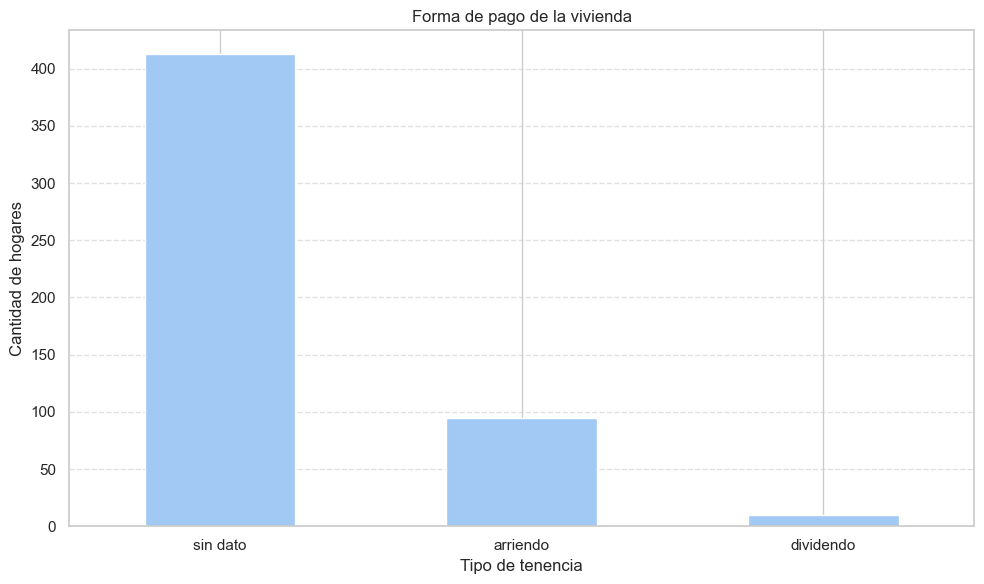

In [17]:
conteo_pago = hogar['forma_pago_vivienda'].value_counts()

# Gráfico de barras
import matplotlib.pyplot as plt


conteo_pago.plot(kind='bar')
plt.title('Forma de pago de la vivienda')
plt.xlabel('Tipo de tenencia')
plt.ylabel('Cantidad de hogares')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


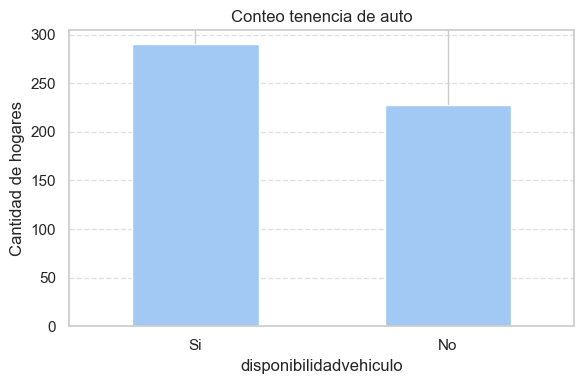

disponibilidadvehiculo
Si    290
No    228
Name: count, dtype: int64


In [18]:
conteo_auto = hogar['disponibilidadvehiculo'].value_counts()

plt.figure(figsize=(6,4))
conteo_auto.plot(kind='bar')
plt.title('Conteo tenencia de auto')
plt.ylabel('Cantidad de hogares')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(hogar['disponibilidadvehiculo'].value_counts())

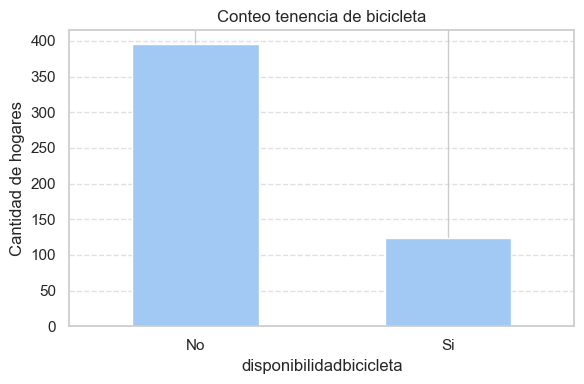

disponibilidadbicicleta
No    395
Si    123
Name: count, dtype: int64


In [19]:
conteo_bici = hogar['disponibilidadbicicleta'].value_counts()

plt.figure(figsize=(6,4))
conteo_bici.plot(kind='bar')
plt.title('Conteo tenencia de bicicleta')
plt.ylabel('Cantidad de hogares')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(hogar['disponibilidadbicicleta'].value_counts())

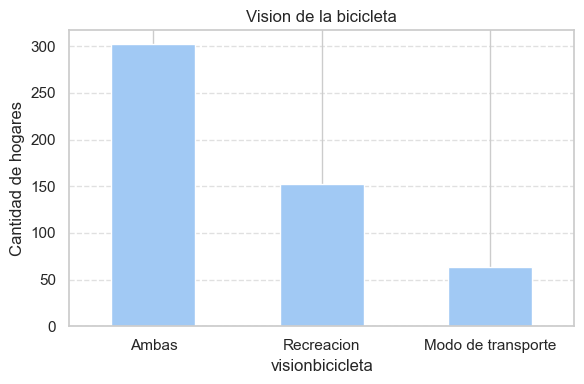

In [20]:
conteo_visionbici = hogar['visionbicicleta'].value_counts()

plt.figure(figsize=(6,4))
conteo_visionbici.plot(kind='bar')
plt.title('Vision de la bicicleta')
plt.ylabel('Cantidad de hogares')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [21]:
hogar['numerovehiculos'] = pd.to_numeric(hogar['numerovehiculos'], errors='coerce')
hogar['numerovehiculos'] = hogar['numerovehiculos'].fillna(0).astype(int)

In [22]:
print(hogar['numerovehiculos'].dtype)

int32


In [23]:
hogar['numerovehiculos'] = hogar['numerovehiculos'].fillna(0)

hogares_con_vehiculo = hogar[hogar['numerovehiculos'] > 0]
promedio_autos_casas_con_auto = hogares_con_vehiculo['numerovehiculos'].mean()

promedio_autos_todas_casas = hogar['numerovehiculos'].mean()

# Mostrar resultados
print(f"Hogares con al menos un vehículo: {hogares_con_vehiculo['folio'].nunique()}")
print(f"Promedio de autos por casa (solo casas con vehículo): {promedio_autos_casas_con_auto:.2f}")
print(f"Promedio de autos por casa (todas las casas): {promedio_autos_todas_casas:.2f}")

Hogares con al menos un vehículo: 290
Promedio de autos por casa (solo casas con vehículo): 1.24
Promedio de autos por casa (todas las casas): 0.69


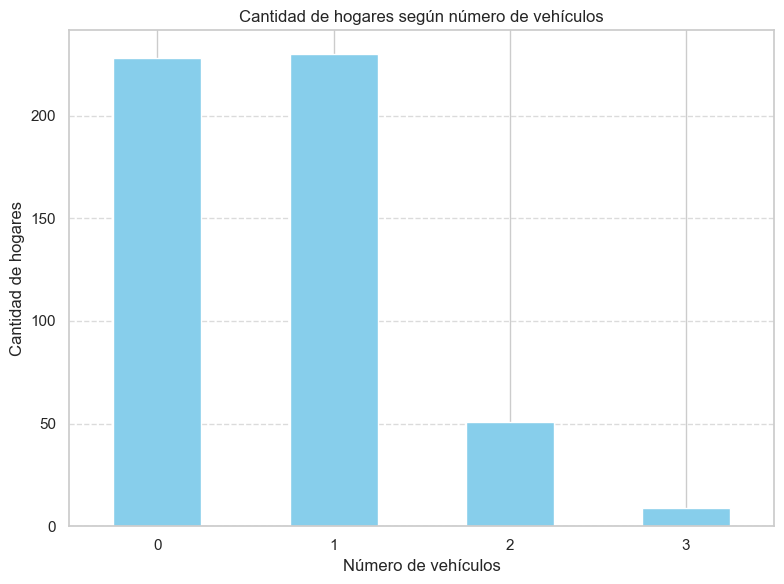

In [24]:
conteo_vehiculos = hogar['numerovehiculos'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
conteo_vehiculos.plot(kind='bar', color='skyblue')
plt.title('Cantidad de hogares según número de vehículos')
plt.xlabel('Número de vehículos')
plt.ylabel('Cantidad de hogares')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
bicicleta_por_hogar = bicicleta.groupby('folio').size().reset_index(name='numerobicicleta')
hogares_con_bicicleta = bicicleta_por_hogar['folio'].nunique()
print(f"Hogares con al menos un bicicleta: {hogares_con_bicicleta}")

Hogares con al menos un bicicleta: 123


In [26]:
hogares_con_vehiculo_df = hogares_con_vehiculo[['folio']]
hogares_con_bicicleta_df = bicicleta_por_hogar[['folio']]

# Cruce de hogares que están en ambos
hogares_con_ambos = pd.merge(hogares_con_vehiculo_df, hogares_con_bicicleta_df, on='folio')
print(f"Hogares con ambos: {len(hogares_con_ambos)}")

Hogares con ambos: 82


In [27]:
hogares_capred = hogar[hogar['integrantecapred'] == 'Si']
print(f"Hogares con al menos una persona con capacidad reducida: {hogares_capred['folio'].nunique()}")

Hogares con al menos una persona con capacidad reducida: 59


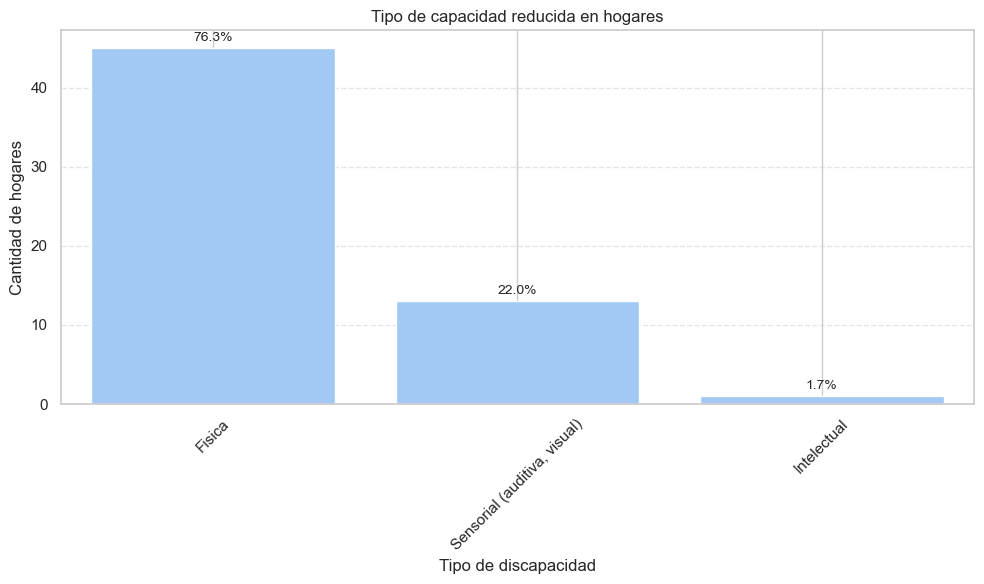

In [28]:
tipo_valido = hogar[hogar['capredtipo'] != 'No aplica']
conteo_tipos = tipo_valido['capredtipo'].value_counts()

plt.figure(figsize = (10,6))
porcentaje = (conteo_tipos / conteo_tipos.sum()) * 100
conteo_tipos.plot(kind='bar', color='skyblue')
bars = plt.bar(conteo_tipos.index, conteo_tipos.values)
plt.title('Tipo de capacidad reducida en hogares')
plt.xlabel('Tipo de discapacidad')
plt.ylabel('Cantidad de hogares')
plt.xticks(rotation=45)

for bar, pct in zip(bars, porcentaje):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)
    
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('graficos/capredtipo_hogar.png', dpi=300, bbox_inches='tight')
plt.show()

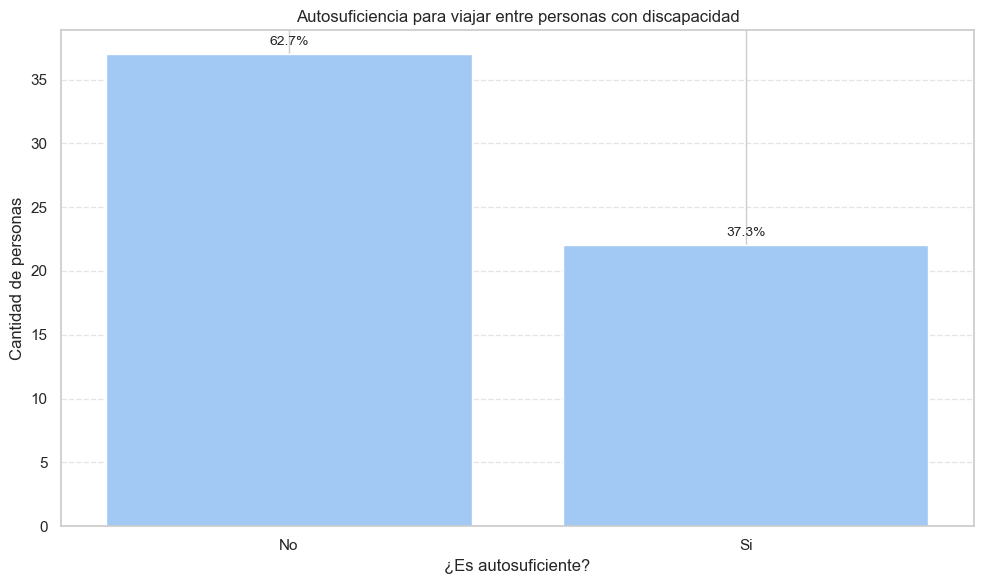

In [29]:
autosuficiencia_valido = hogar[hogar['capredsuficiencia'] != 'No aplica']
conteo_autosuficiencia = tipo_valido['capredsuficiencia'].value_counts()
porcentajes = (conteo_autosuficiencia / conteo_autosuficiencia.sum()) * 100


conteo_autosuficiencia.plot(kind='bar')
bars = plt.bar(conteo_autosuficiencia.index, conteo_autosuficiencia.values)
plt.title('Autosuficiencia para viajar entre personas con discapacidad')
plt.xlabel('¿Es autosuficiente?')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar, pct in zip(bars, porcentajes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### Tabla persona

In [30]:
persona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   folio                       1000 non-null   int64  
 1   ordenpersona                1000 non-null   int64  
 2   diaentrevista               1000 non-null   int64  
 3   mesentrevista               1000 non-null   int64  
 4   horaentrevista              1000 non-null   int64  
 5   minutoentrevista            1000 non-null   int64  
 6   sexo                        1000 non-null   object 
 7   parentesco                  1000 non-null   object 
 8   mesnacimiento               1000 non-null   int64  
 9   agnonacimiento              1000 non-null   int64  
 10  tenencialicenciaconducir    1000 non-null   object 
 11  tenenciatne                 1000 non-null   object 
 12  tenenciatarjetaadultomayor  1000 non-null   object 
 13  escolaridadcurso            1000 n

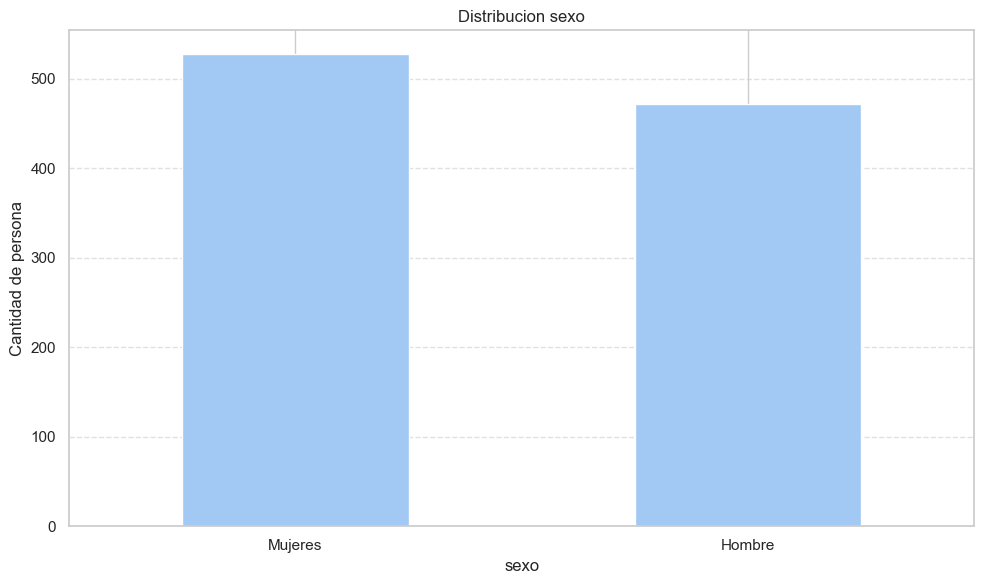

sexo
Mujeres    528
Hombre     472
Name: count, dtype: int64


In [31]:
conteo_sexo = persona['sexo'].value_counts()

conteo_sexo.plot(kind='bar')
plt.title('Distribucion sexo')
plt.ylabel('Cantidad de persona')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(persona['sexo'].value_counts())

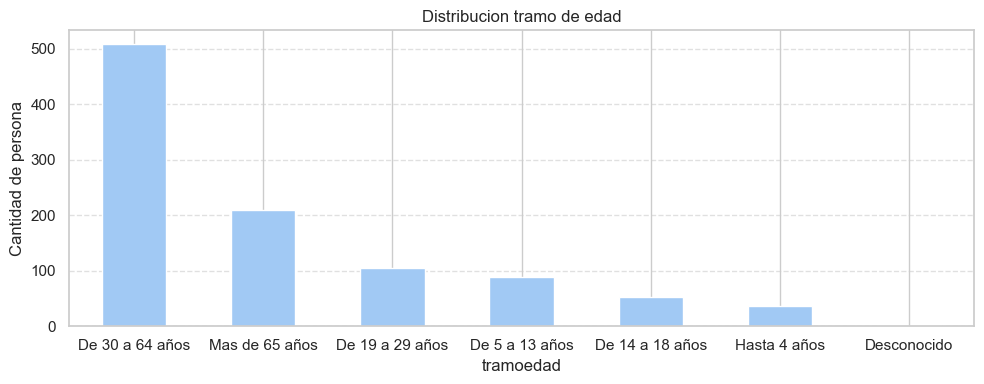

In [32]:
conteo_edad = persona['tramoedad'].value_counts()

conteo_edad.plot(kind='bar', figsize=(10,4))
plt.title('Distribucion tramo de edad')
plt.ylabel('Cantidad de persona')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

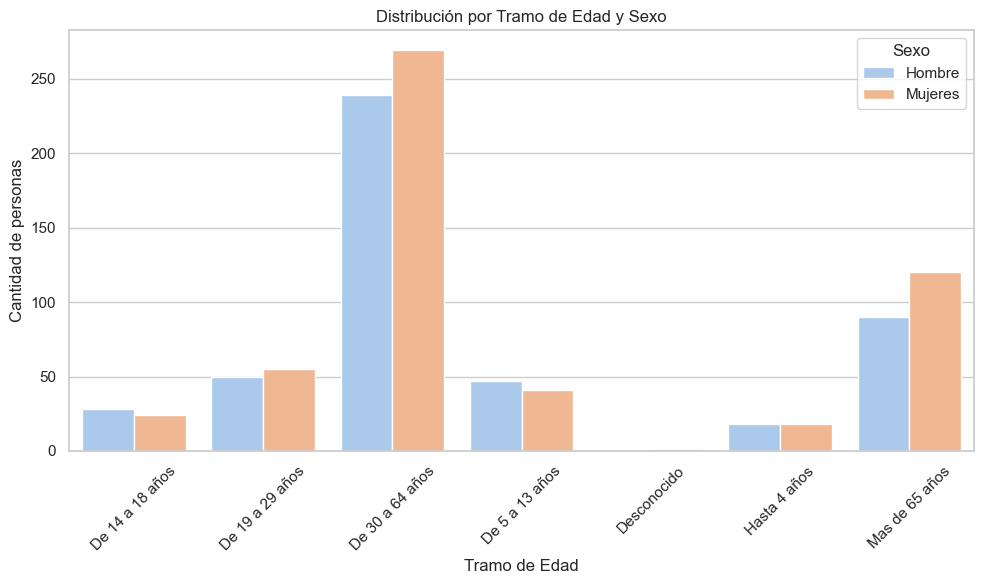

In [33]:
conteo_tramoedad = (
    persona.groupby(['tramoedad', 'sexo']).size().reset_index(name='conteo')
)

plt.figure()
sns.barplot(data=conteo_tramoedad, x='tramoedad', y='conteo', hue='sexo', palette='pastel')
plt.title('Distribución por Tramo de Edad y Sexo')
plt.xlabel('Tramo de Edad')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

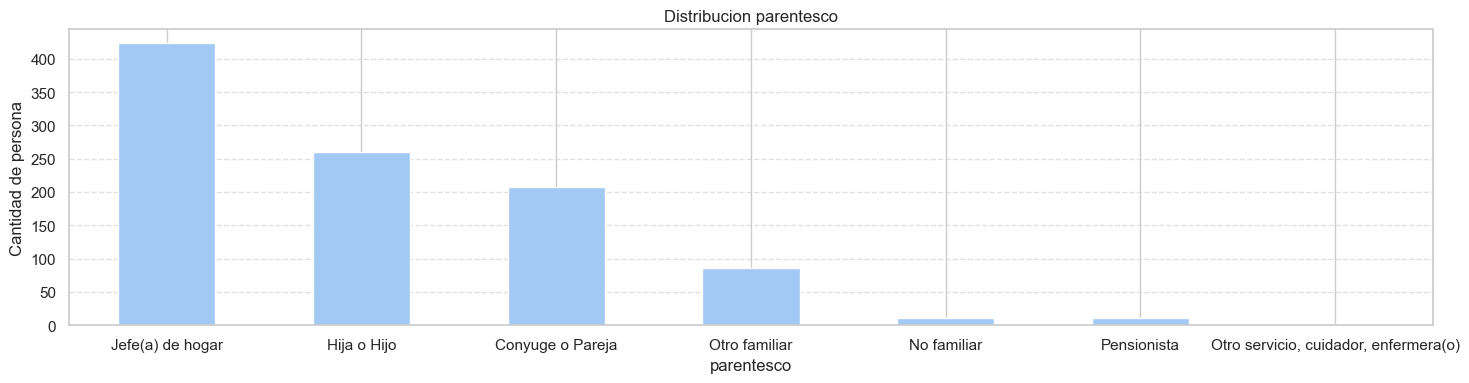

In [34]:
conteo_parentesco = persona['parentesco'].value_counts()

conteo_parentesco.plot(kind='bar', figsize=(15,4))
plt.title('Distribucion parentesco')
plt.ylabel('Cantidad de persona')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

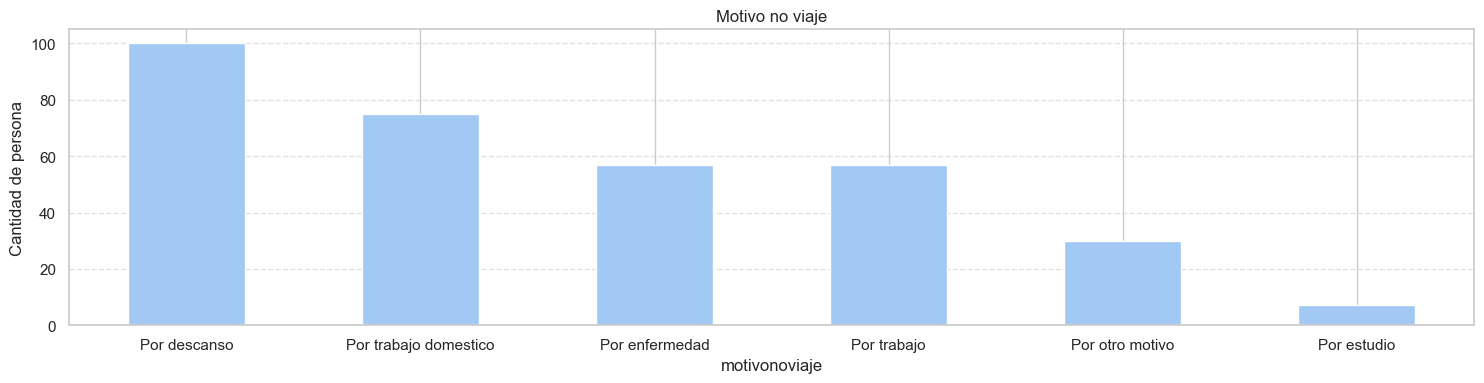

In [35]:
conteo_motivonoviaje = persona['motivonoviaje'].value_counts()

conteo_motivonoviaje = conteo_motivonoviaje.drop('No aplica', errors='ignore')

conteo_motivonoviaje.plot(kind='bar', figsize=(15,4))
plt.title('Motivo no viaje')
plt.ylabel('Cantidad de persona')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

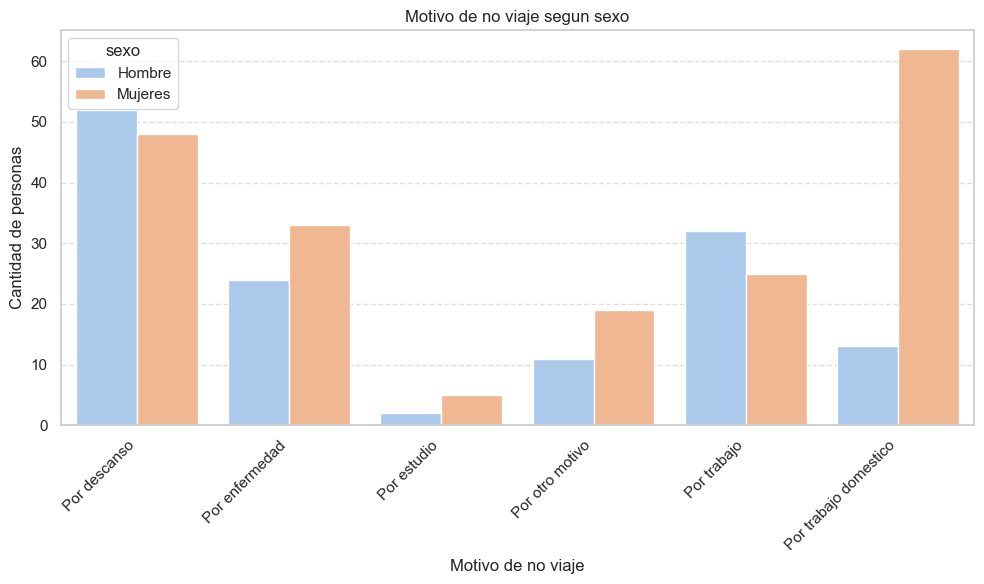

In [36]:
conteo_motivonoviaje_sexo = (
    persona.groupby(['motivonoviaje', 'sexo']).size().reset_index(name='conteo')
)

conteo_motivonoviaje_sexo = conteo_motivonoviaje_sexo[conteo_motivonoviaje_sexo['motivonoviaje'] != 'No aplica']



sns.barplot(data=conteo_motivonoviaje_sexo, x='motivonoviaje', y='conteo', hue='sexo')
plt.title('Motivo de no viaje segun sexo')
plt.ylabel('Cantidad de personas')
plt.xlabel('Motivo de no viaje')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

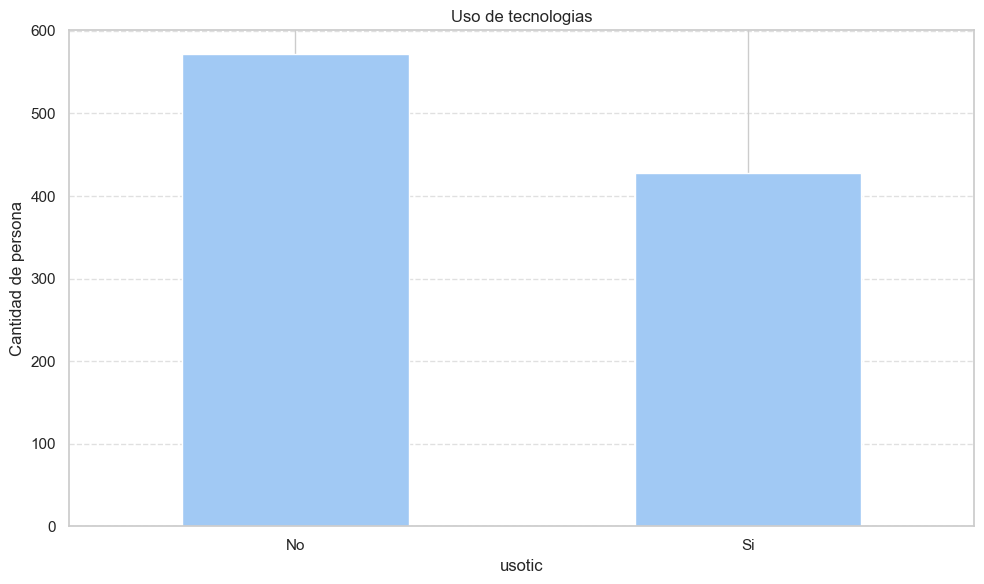

In [37]:
conteo_usotic = persona['usotic'].value_counts() #Utiliza diariamente el viaje programas de informacion en tiempo real

conteo_usotic.plot(kind='bar')
plt.title('Uso de tecnologias')
plt.ylabel('Cantidad de persona')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [38]:
combinaciones = persona.groupby(['actividadtrabaja', 'actividadestudia', 'actividadjubilado']).size().reset_index(name='conteo')
print(combinaciones)

  actividadtrabaja actividadestudia actividadjubilado  conteo
0               No               No                No     201
1               No               No                Si     146
2               No               Si                No     164
3               Si               No                No     467
4               Si               No                Si      16
5               Si               Si                No       6


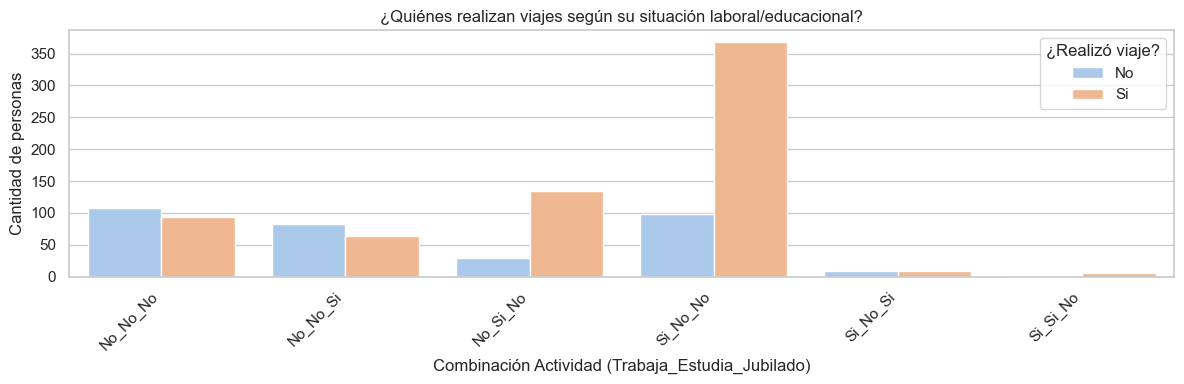

In [39]:
actividad_combo = (
    persona
    .assign(combinacion_actividad = 
            persona['actividadtrabaja'].astype(str) + '_' +
            persona['actividadestudia'].astype(str) + '_' +
            persona['actividadjubilado'].astype(str))
    .groupby(['combinacion_actividad', 'realizoviaje'])
    .size()
    .reset_index(name='conteo')
)

plt.figure(figsize=(12, 4))
sns.barplot(data=actividad_combo, x='combinacion_actividad', y='conteo', hue='realizoviaje')
plt.xticks(rotation=45, ha='right')
plt.title('¿Quiénes realizan viajes según su situación laboral/educacional?')
plt.xlabel('Combinación Actividad (Trabaja_Estudia_Jubilado)')
plt.ylabel('Cantidad de personas')
plt.tight_layout()
plt.legend(title='¿Realizó viaje?')
plt.show()

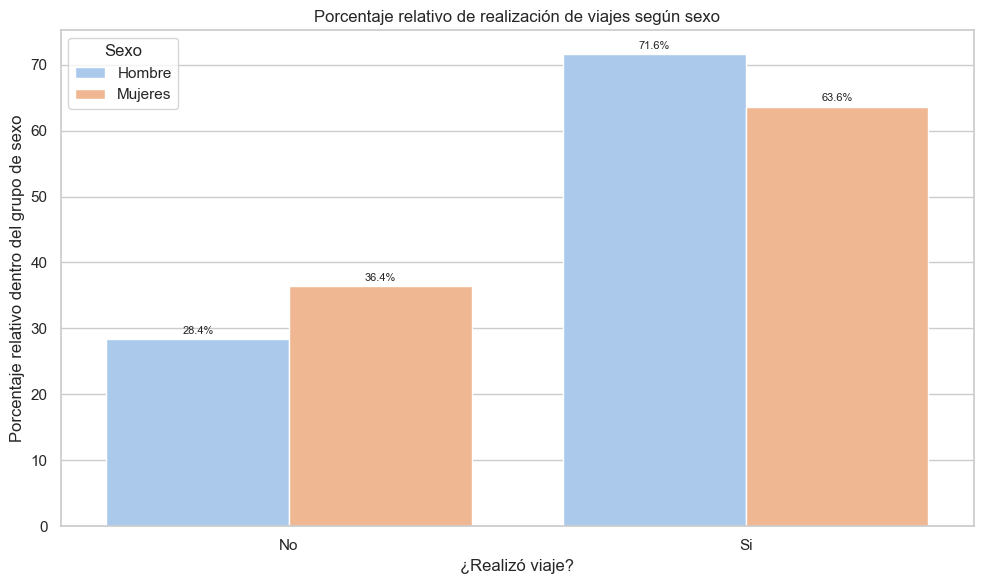

In [40]:
data = {'sexo': ['Hombre', 'Hombre', 'Mujeres', 'Mujeres'],
        'realizoviaje': ['No', 'Si', 'No', 'Si'],
        'conteo': [134, 338, 192, 336]}
conteo_viajesexo = pd.DataFrame(data)

# Datos de la población por sexo
total_hombres = 472
total_mujeres = 528

# Calcular el porcentaje dentro de cada grupo de sexo
conteo_viajesexo['porcentaje_relativo'] = 0.0

for index, row in conteo_viajesexo.iterrows():
    if row['sexo'] == 'Hombre':
        conteo_viajesexo.loc[index, 'porcentaje_relativo'] = (row['conteo'] / total_hombres) * 100
    elif row['sexo'] == 'Mujeres':
        conteo_viajesexo.loc[index, 'porcentaje_relativo'] = (row['conteo'] / total_mujeres) * 100


ax_porcentaje = sns.barplot(data=conteo_viajesexo, x='realizoviaje', y='porcentaje_relativo', hue='sexo')
plt.title('Porcentaje relativo de realización de viajes según sexo')
plt.xlabel('¿Realizó viaje?')
plt.ylabel('Porcentaje relativo dentro del grupo de sexo')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
for p in ax_porcentaje.patches:
    height = p.get_height()
    if height > 0:
        ax_porcentaje.text(p.get_x() + p.get_width() / 2., height + 0.5,
                        f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('graficos/realizoviaje_vs_sexo.png', dpi=300, bbox_inches='tight')
plt.show()

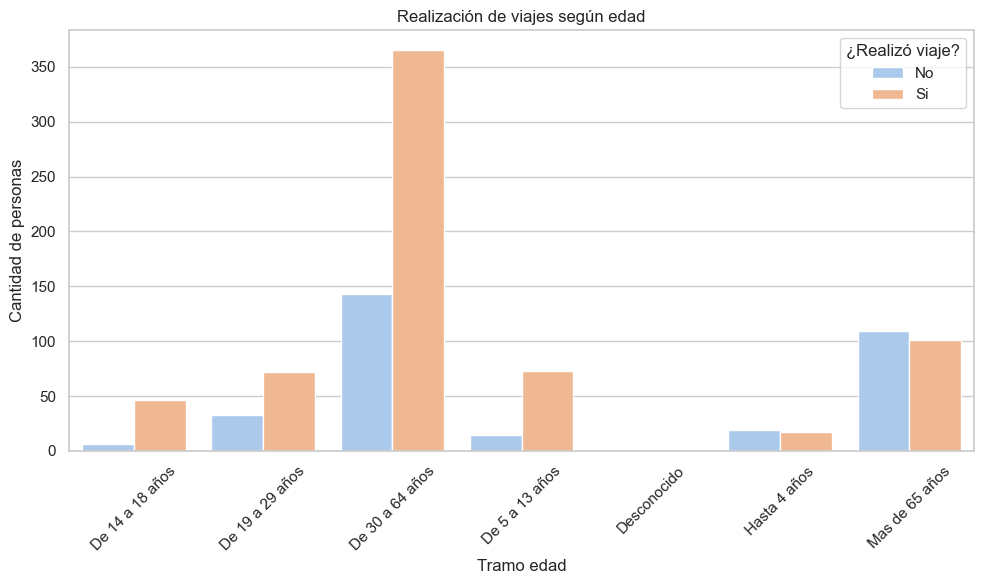

In [41]:
conteo_viajeedad = (
    persona.groupby(['tramoedad', 'realizoviaje']).size().reset_index(name='conteo')
)

totales_por_edad = (
    conteo_viajeedad.groupby('tramoedad')['conteo'].transform('sum'))

conteo_viajeedad['porcentaje'] = conteo_viajeedad['conteo'] / totales_por_edad * 100

    
sns.barplot(data=conteo_viajeedad, x='tramoedad', y='conteo', hue='realizoviaje')
plt.title('Realización de viajes según edad')
plt.xlabel('Tramo edad')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='¿Realizó viaje?')
plt.tight_layout()
plt.show()

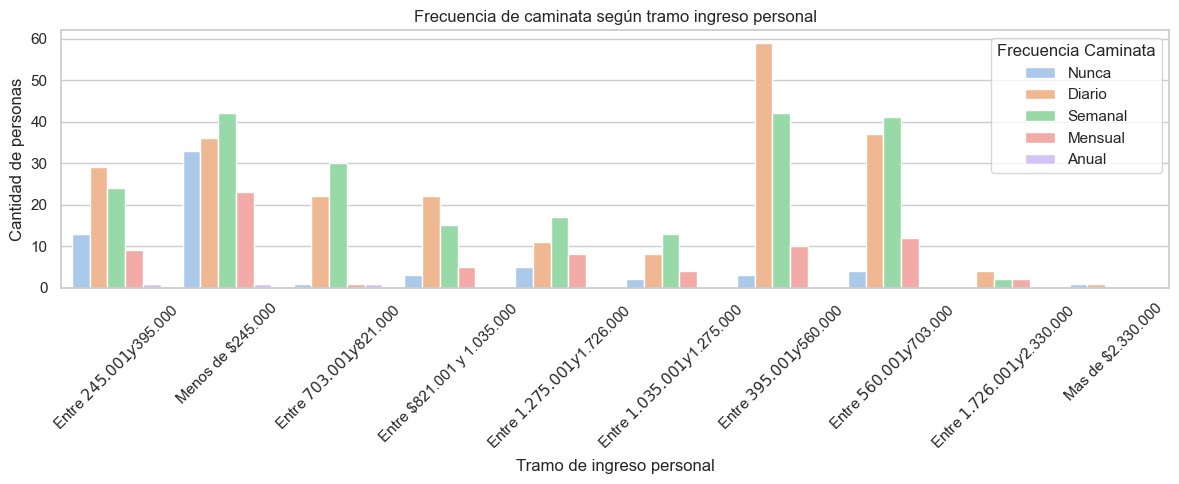

In [42]:
conteo_freqcaminata = (
    persona.groupby(['tramoingresopersonal', 'freqcaminata']).size().reset_index(name='conteo')
)

plt.figure(figsize=(12, 5))
sns.countplot(data=persona[persona['tramoingresopersonal'] != 'No responde'] , x='tramoingresopersonal', hue='freqcaminata')
plt.title('Frecuencia de caminata según tramo ingreso personal')
plt.xlabel('Tramo de ingreso personal')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Frecuencia Caminata')
plt.tight_layout()
plt.show()

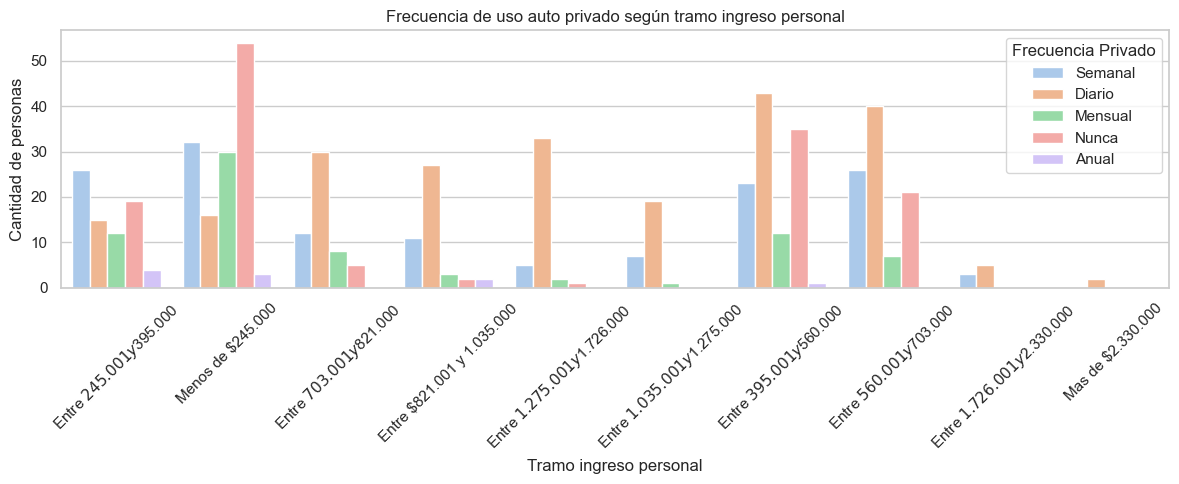

In [43]:
conteo_freqprivado = (
    persona.groupby(['tramoingresopersonal', 'freqprivado']).size().reset_index(name='conteo')
)

plt.figure(figsize=(12, 5))
sns.countplot(data=persona[persona['tramoingresopersonal'] != 'No responde'], x='tramoingresopersonal', hue='freqprivado')
plt.title('Frecuencia de uso auto privado según tramo ingreso personal')
plt.xlabel('Tramo ingreso personal')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Frecuencia Privado')
plt.tight_layout()
plt.show()

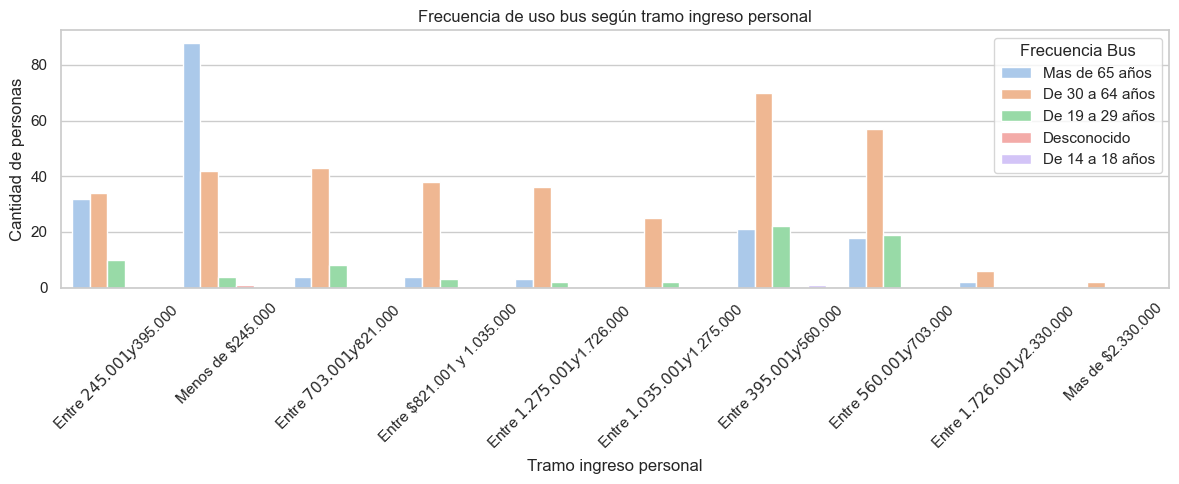

In [44]:
conteo_freqbus = (
    persona.groupby(['tramoingresopersonal', 'freqbus']).size().reset_index(name='conteo')
)

plt.figure(figsize=(12, 5))
sns.countplot(data=persona[persona['tramoingresopersonal'] != 'No responde'], x='tramoingresopersonal', hue='tramoedad')
plt.title('Frecuencia de uso bus según tramo ingreso personal')
plt.xlabel('Tramo ingreso personal')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Frecuencia Bus')
plt.tight_layout()
plt.show()

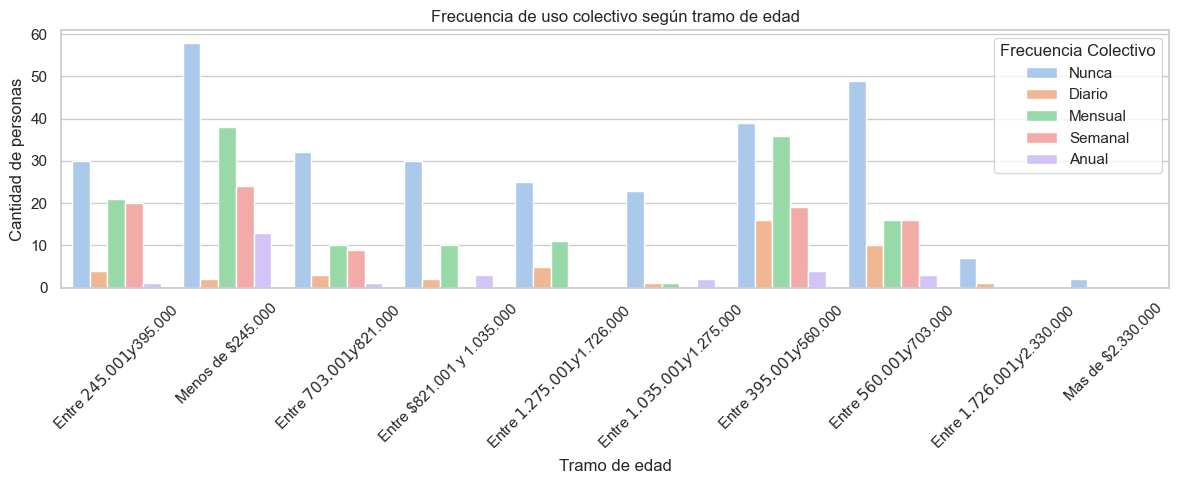

In [45]:
conteo_freqcolectivo = (
    persona.groupby(['tramoingresopersonal', 'freqcolectivo']).size().reset_index(name='conteo')
)

plt.figure(figsize=(12, 5))
sns.countplot(data=persona[persona['tramoingresopersonal'] != 'No responde'], x='tramoingresopersonal', hue='freqcolectivo')
plt.title('Frecuencia de uso colectivo según tramo de edad')
plt.xlabel('Tramo de edad')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Frecuencia Colectivo')
plt.tight_layout()
plt.show()

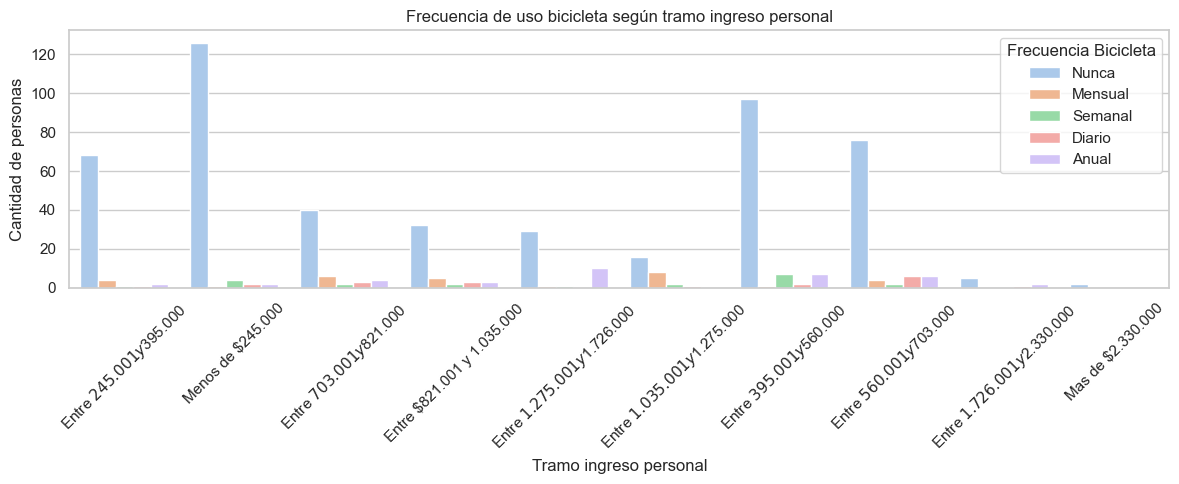

In [46]:
conteo_freqbicicleta = (
    persona.groupby(['tramoingresopersonal', 'freqbicicleta']).size().reset_index(name='conteo')
)

plt.figure(figsize=(12, 5))
sns.countplot(data=persona[persona['tramoingresopersonal'] != 'No responde'], x='tramoingresopersonal', hue='freqbicicleta')
plt.title('Frecuencia de uso bicicleta según tramo ingreso personal')
plt.xlabel('Tramo ingreso personal')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Frecuencia Bicicleta')
plt.tight_layout()
plt.show()

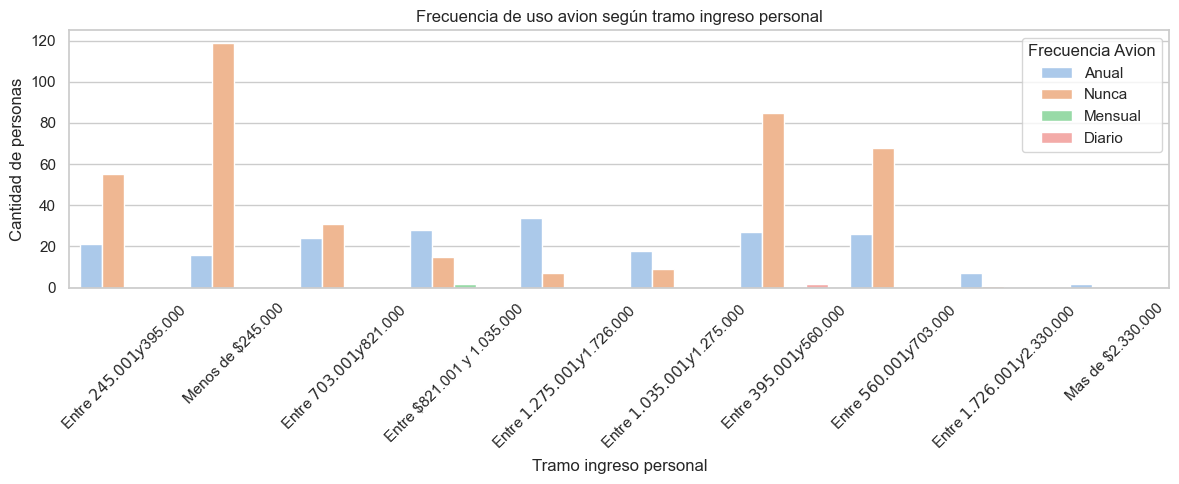

In [47]:
conteo_freqavion = (
    persona.groupby(['tramoingresopersonal', 'freqavion']).size().reset_index(name='conteo')
)

plt.figure(figsize=(12, 5))
sns.countplot(data=persona[persona['tramoingresopersonal'] != 'No responde'], x='tramoingresopersonal', hue='freqavion')
plt.title('Frecuencia de uso avion según tramo ingreso personal')
plt.xlabel('Tramo ingreso personal')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Frecuencia Avion')
plt.tight_layout()
plt.show()

##### Tabla viaje

In [48]:
viaje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   folio                      1000 non-null   int64 
 1   ordenpersona               1000 non-null   int64 
 2   ordenviaje                 1000 non-null   int64 
 3   proposito                  1000 non-null   object
 4   propositovc                1000 non-null   object
 5   origenactividadcomuna      1000 non-null   object
 6   lugaractividadcomuna       1000 non-null   object
 7   actividadempresa           1000 non-null   object
 8   tipoasiento                1000 non-null   object
 9   modoetapa1                 1000 non-null   object
 10  cuadrascaminadasdespues    1000 non-null   int64 
 11  minutoscaminadosdespues    1000 non-null   int64 
 12  horallegadahora            1000 non-null   int64 
 13  horallegadaminuto          1000 non-null   int64 
 14  horavolvi

In [49]:
viaje['folio'].nunique()

171

In [50]:
viaje['periodo'].value_counts()

periodo
Fuera de Punta (10:30-11:30, 14:00-18:00)    369
Punta mañana (7:30-10-30)                    291
Mediodia (11:30-14:00)                       196
Punta Tarde (18:00-20:00)                     86
Resto                                         58
Name: count, dtype: int64

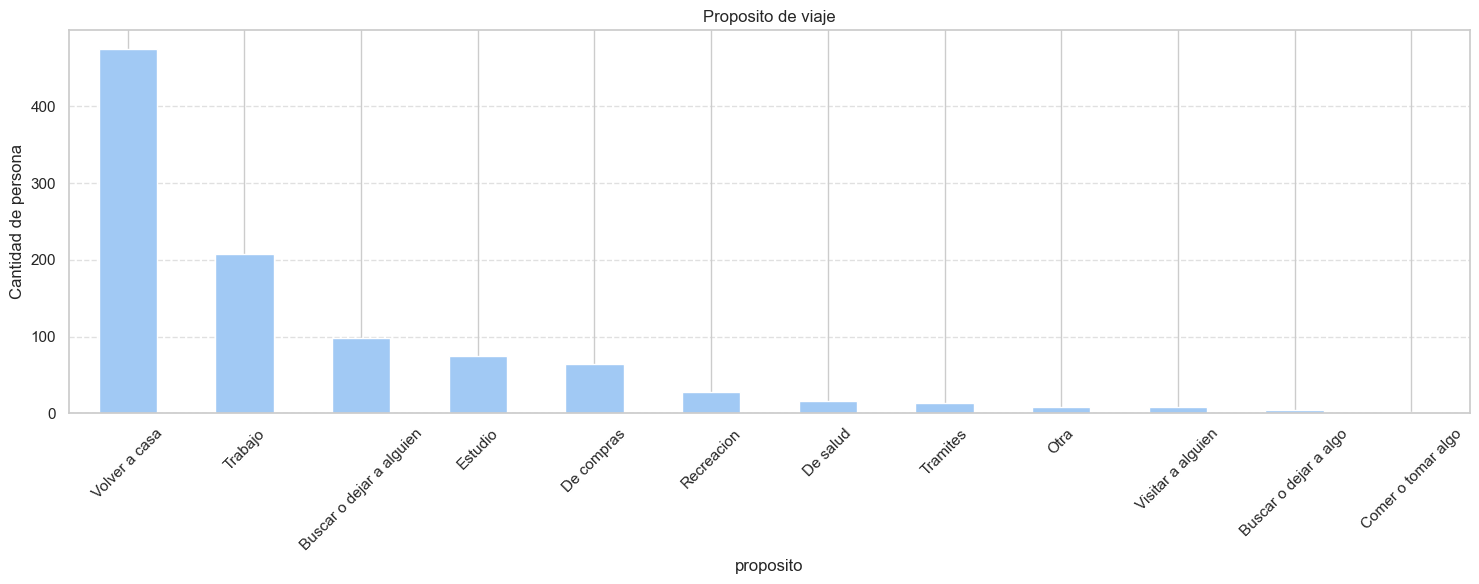

In [51]:
conteo_proposito = viaje['proposito'].value_counts()

conteo_proposito.plot(kind='bar', figsize=(15,6))
plt.title('Proposito de viaje')
plt.ylabel('Cantidad de persona')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

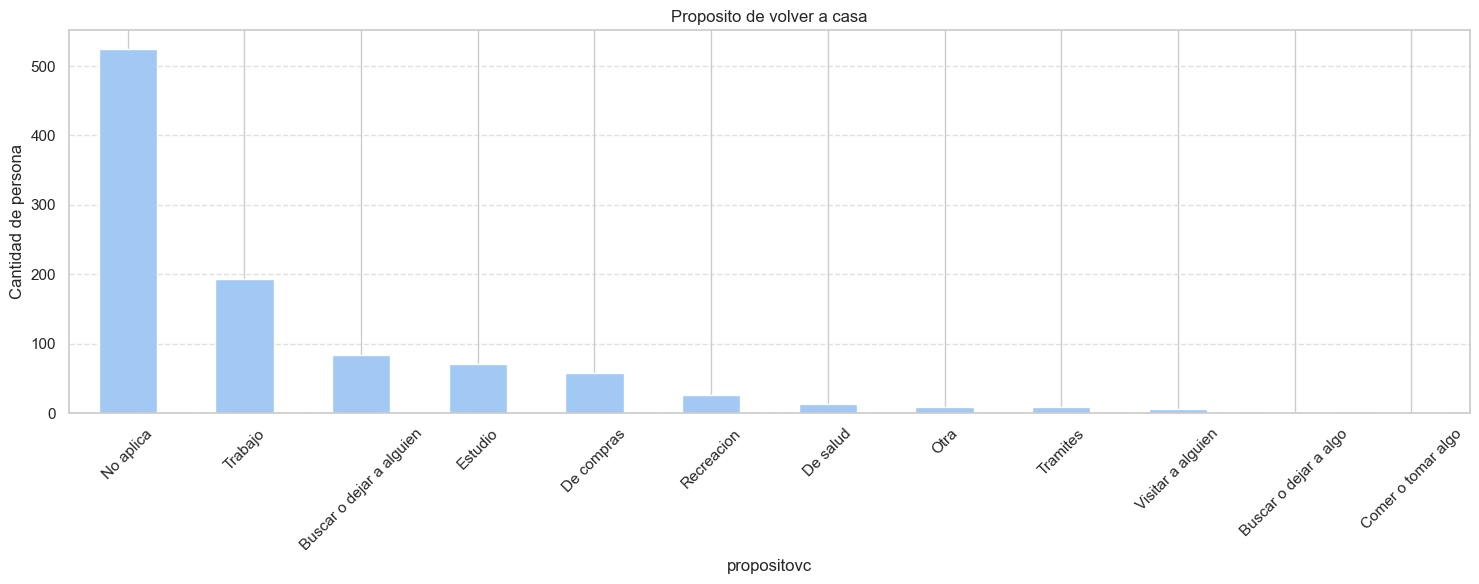

In [52]:
conteo_propositovc = viaje['propositovc'].value_counts()

conteo_propositovc.plot(kind='bar', figsize=(15,6))
plt.title('Proposito de volver a casa')
plt.ylabel('Cantidad de persona')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

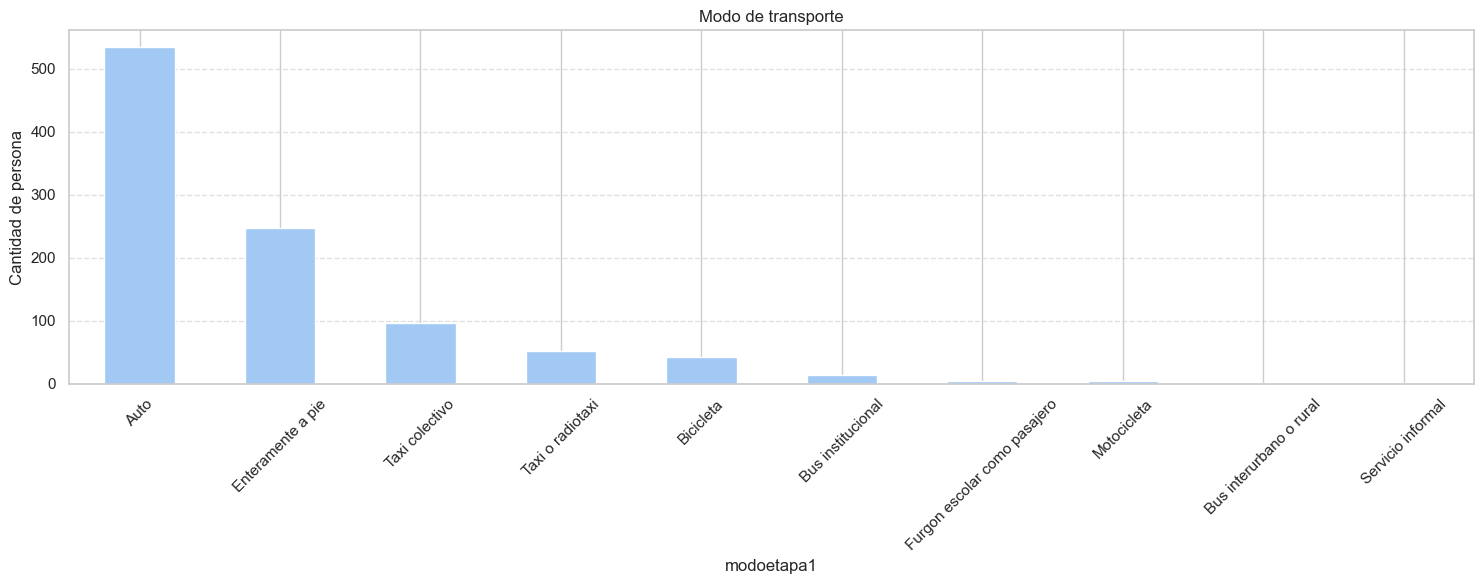

In [53]:
conteo_modo = viaje['modoetapa1'].value_counts()

conteo_modo.plot(kind='bar', figsize=(15,6))
plt.title('Modo de transporte')
plt.ylabel('Cantidad de persona')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

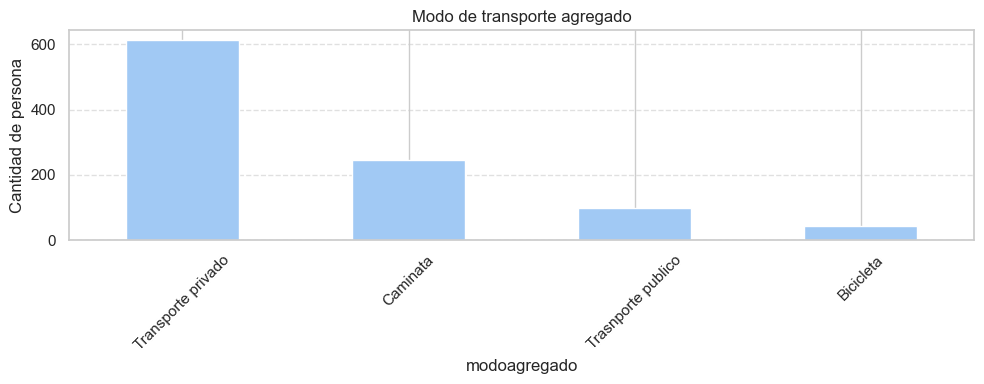

In [54]:
conteo_modoagregado = viaje['modoagregado'].value_counts()

conteo_modoagregado.plot(kind='bar', figsize=(10,4))
plt.title('Modo de transporte agregado')
plt.ylabel('Cantidad de persona')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [55]:
viaje['tiempoviaje'] = pd.to_datetime(viaje['tiempoviaje'], errors='coerce', dayfirst=True)
viaje['tiempoviaje_min'] = viaje['tiempoviaje'].dt.hour * 60 + viaje['tiempoviaje'].dt.minute

In [56]:
viaje['tiempoviaje_min'].unique()

array([ 12,  15,  10,   8,   5,  40,   9,  20,  45,   7,  30,  13,  19,
        25,   3,  14,  17,  16,   2,   1,   6,  35, 210, 125,  60,  21,
        23,  18, 297,  87,  57,  58, 290, 130,   4, 240, 170,  75,  70,
        50,  85, 205, 115, 265,  47,  90])

In [57]:
bins = [0, 5, 10, 15, 20, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
labels = ['1-5', '6-10', '11-15', '16-20', '21-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300']
viaje['tiempo_rango'] = pd.cut(viaje['tiempoviaje_min'], bins=bins, labels=labels)
viaje['tiempo_rango'].value_counts()

tiempo_rango
6-10       278
11-15      249
1-5        175
16-20      149
21-30      104
31-60       23
61-90        7
151-180      3
181-210      3
211-240      3
121-150      2
271-300      2
91-120       1
241-270      1
Name: count, dtype: int64

C:\Users\Catalina\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


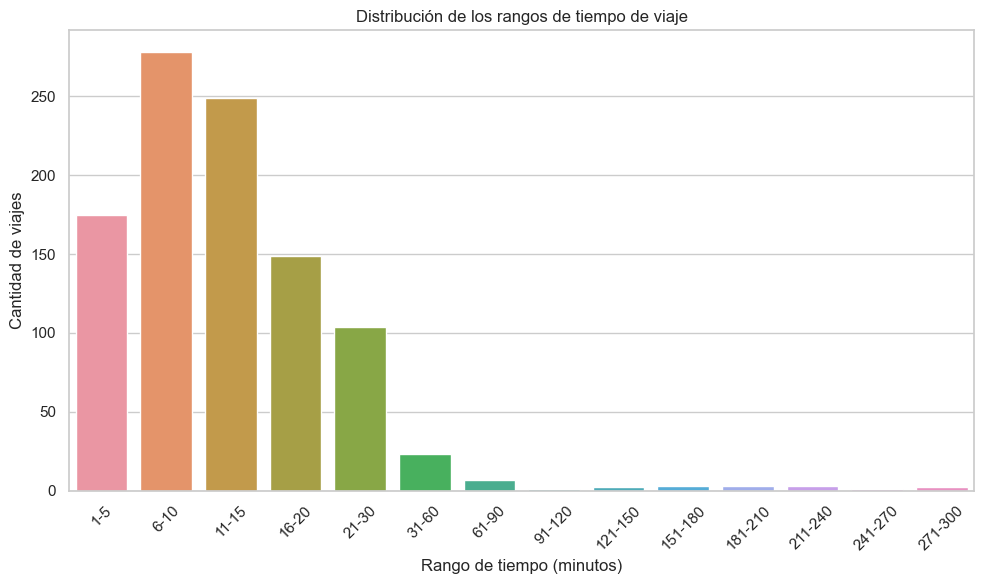

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(data=viaje, x='tiempo_rango')
plt.title('Distribución de los rangos de tiempo de viaje')
plt.xlabel('Rango de tiempo (minutos)')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

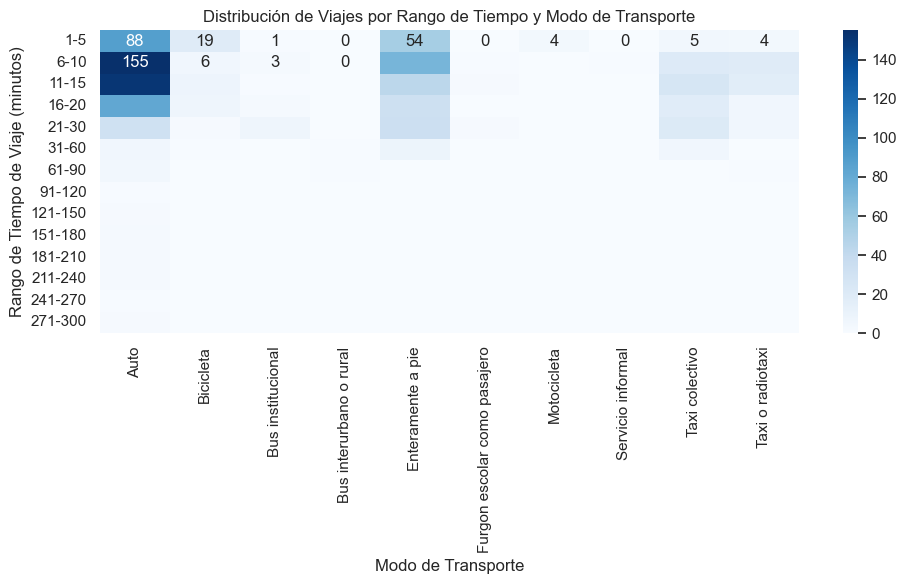

In [59]:
tabla_cruce_rangos = pd.crosstab(viaje['tiempo_rango'], viaje['modoetapa1'])

plt.figure(figsize=(10, 6))
sns.heatmap(tabla_cruce_rangos, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.title('Distribución de Viajes por Rango de Tiempo y Modo de Transporte')
plt.xlabel('Modo de Transporte')
plt.ylabel('Rango de Tiempo de Viaje (minutos)')


plt.tight_layout()
plt.show()

C:\Users\Catalina\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


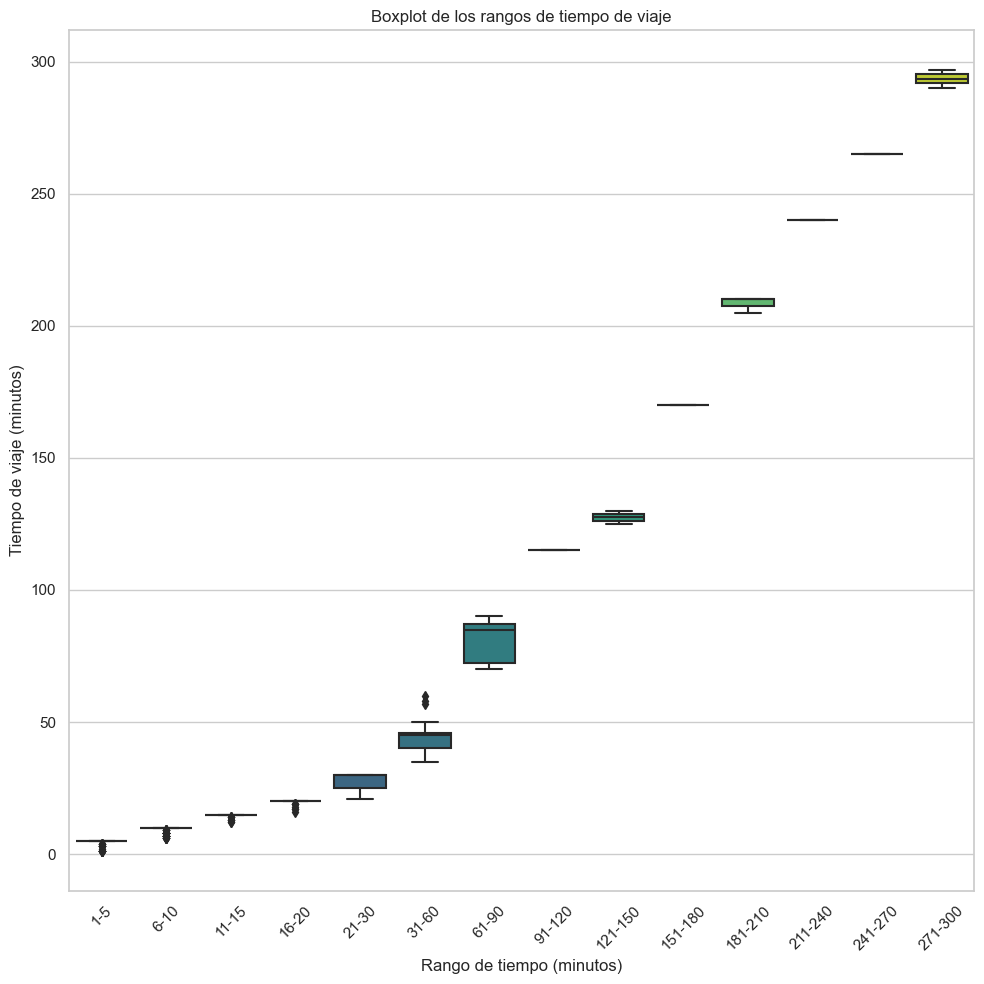

In [60]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=viaje, x='tiempo_rango', y='tiempoviaje_min', palette='viridis')
plt.title('Boxplot de los rangos de tiempo de viaje')
plt.xlabel('Rango de tiempo (minutos)')
plt.ylabel('Tiempo de viaje (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

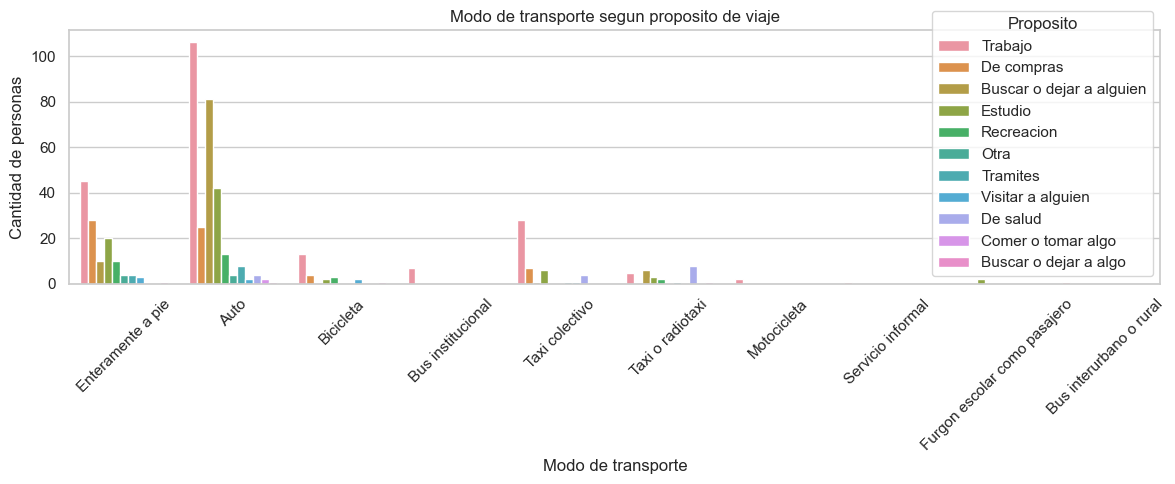

In [61]:
cruce_modo_proposito = (
     viaje.groupby(['modoetapa1', 'proposito']).size().reset_index(name='conteo')
)

plt.figure(figsize=(12, 5))
sns.countplot(data=viaje[viaje['proposito'] != 'Volver a casa'], x='modoetapa1', hue='proposito')
plt.title('Modo de transporte segun proposito de viaje')
plt.xlabel('Modo de transporte')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45)
plt.legend(title='Proposito')
plt.tight_layout()
plt.show()

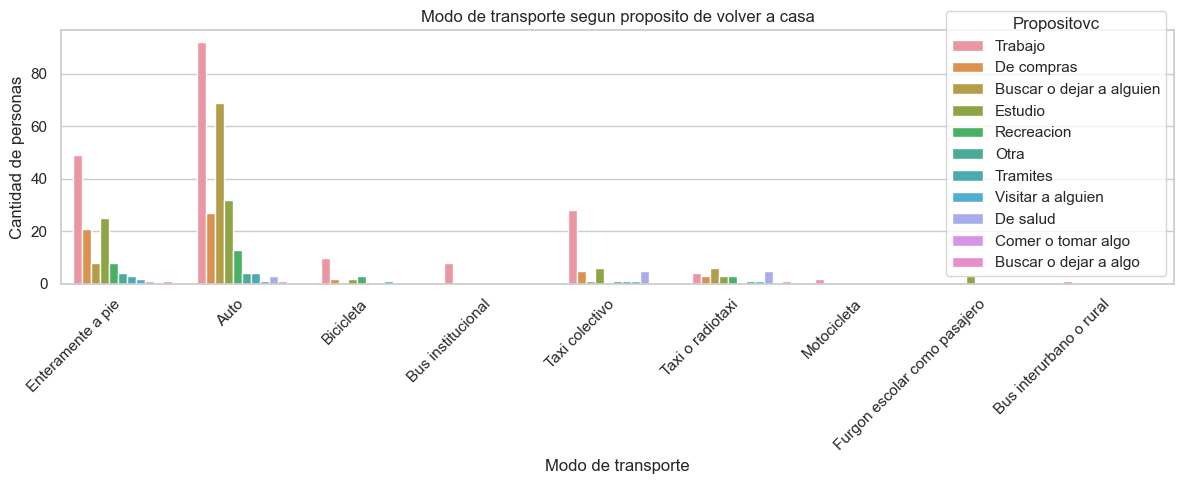

In [62]:
cruce_modo_propositovc = (
     viaje.groupby(['modoetapa1', 'propositovc']).size().reset_index(name='conteo')
)

plt.figure(figsize=(12, 5))
sns.countplot(data=viaje[viaje['propositovc'] != 'No aplica'], x='modoetapa1', hue='propositovc')
plt.title('Modo de transporte segun proposito de volver a casa')
plt.xlabel('Modo de transporte')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45,  ha='right')
plt.legend(title='Propositovc')
plt.tight_layout()
plt.show()

In [63]:
agrupado_proposito = viaje.groupby('proposito')['tiempoviaje_min'].agg(['mean', 'median']).reset_index()
print(agrupado_proposito)

                   proposito       mean  median
0      Buscar o dejar a algo  21.250000    22.5
1   Buscar o dejar a alguien  30.316327    15.0
2         Comer o tomar algo  15.000000    15.0
3                 De compras  14.515625    12.5
4                   De salud  21.250000    15.0
5                    Estudio  14.773333    15.0
6                       Otra  13.125000    10.0
7                 Recreacion  13.642857    15.0
8                    Trabajo  16.331731    15.0
9                   Tramites  43.928571    20.0
10         Visitar a alguien  18.125000    12.5
11             Volver a casa  16.021053    15.0


In [64]:
agrupado_modo = viaje.groupby('modoetapa1')['tiempoviaje_min'].agg(['mean', 'median']).reset_index()
print(agrupado_modo)

                     modoetapa1       mean  median
0                          Auto  19.606742    15.0
1                     Bicicleta  11.395349    10.0
2             Bus institucional  20.600000    20.0
3       Bus interurbano o rural  60.000000    60.0
4             Enteramente a pie  14.263158    10.0
5  Furgon escolar como pasajero  20.000000    15.0
6                   Motocicleta   5.000000     5.0
7             Servicio informal  10.000000    10.0
8                Taxi colectivo  19.093750    15.0
9              Taxi o radiotaxi  15.886792    15.0


In [65]:
agrupado_modoagregado = viaje.groupby('modoagregado')['tiempoviaje_min'].agg(['mean', 'median']).reset_index()
print(agrupado_modoagregado)

         modoagregado       mean  median
0           Bicicleta  11.395349    10.0
1            Caminata  14.263158    10.0
2  Transporte privado  19.200980    15.0
3  Trasnporte publico  19.928571    15.0


In [66]:
conteo_viajes_persona = viaje.groupby(['folio', 'ordenpersona']).size().reset_index(name='cantidad_viajes')
conteo_viajes_persona.head()

folio  ordenpersona  cantidad_viajes
0  10011             3                4
1  10012             1                2
2  10021             1               11
3  10021             3                6
4  10022             4                2

In [67]:
conteo_cantidad_viajes = conteo_viajes_persona['cantidad_viajes'].value_counts().sort_index()
conteo_cantidad_viajes.head()

cantidad_viajes
1      5
2    168
3      9
4    103
5      9
Name: count, dtype: int64

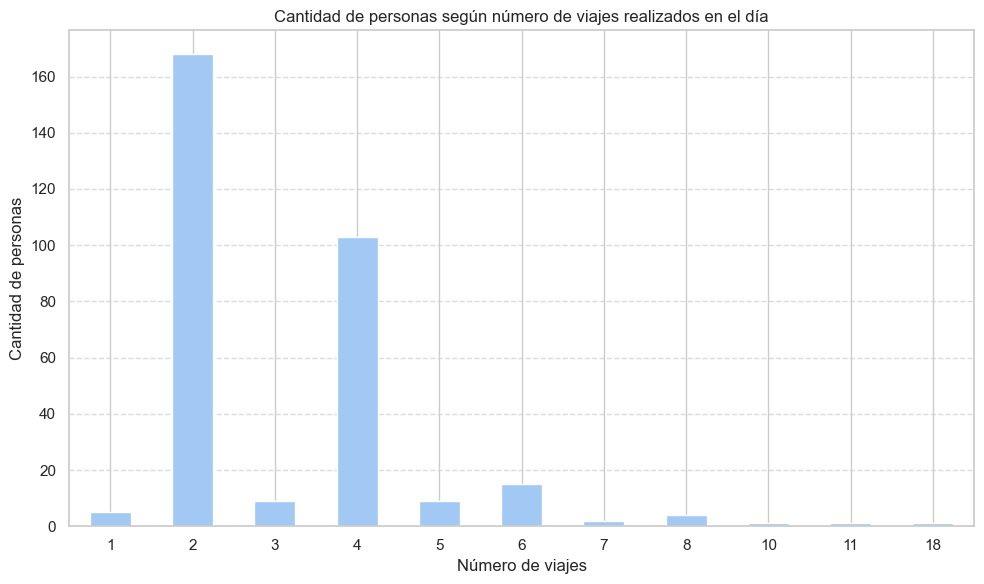

In [68]:
conteo_cantidad_viajes.plot(kind='bar')
plt.title('Cantidad de personas según número de viajes realizados en el día')
plt.xlabel('Número de viajes')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [69]:
#Conteo de modos de movilizacion durante el viaje.
modos_por_persona = viaje.groupby(['folio', 'ordenpersona', 'ordenviaje'])['modoetapa1'].unique().reset_index()
modos_por_persona['cantidad_modos'] = modos_por_persona['modoetapa1'].apply(lambda x: len(set(x)))
modos_por_persona['cantidad_modos'].value_counts()

#Durante el viaje se usa un solo metodo de trasporte

cantidad_modos
1    1000
Name: count, dtype: int64

##### Tabla etapa


In [70]:
etapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   folio                     1000 non-null   int64 
 1   ordenpersona              1000 non-null   int64 
 2   ordenviaje                1000 non-null   int64 
 3   ordenetapa                1000 non-null   int64 
 4   modoetapa                 1000 non-null   object
 5   cuadrascaminadasantes     1000 non-null   object
 6   minutoscaminadosantes     1000 non-null   object
 7   tipoasiento               1000 non-null   object
 8   ordenvehiculoviaje        1000 non-null   object
 9   situacionbicicleta        1000 non-null   object
 10  usohabitualbicicleta      1000 non-null   object
 11  usociclovia               1000 non-null   object
 12  motivonousociclovia       1000 non-null   object
 13  tiempoespera              1000 non-null   object
 14  vehiculosnouso           

In [71]:
etapa['ordenvehiculoviaje'].value_counts()

ordenvehiculoviaje
No aplica    462
1.0          404
2.0           89
99.0          41
3.0            4
Name: count, dtype: int64

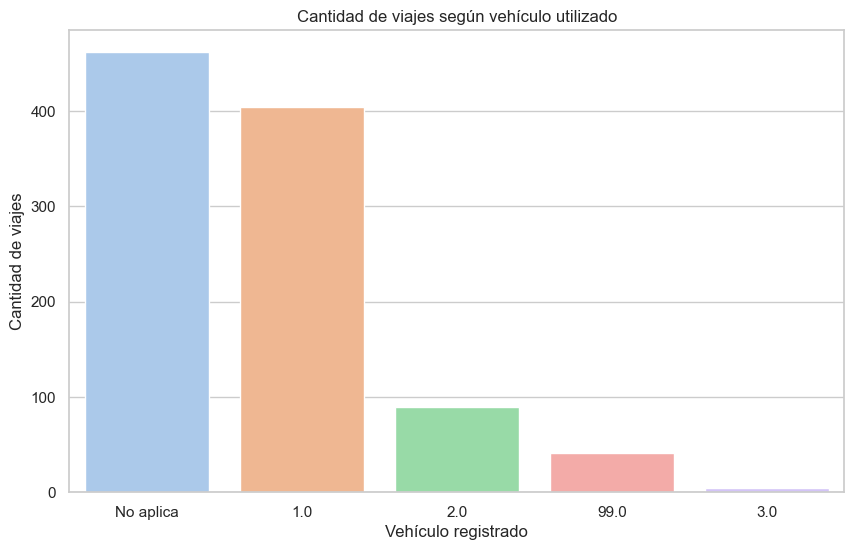

In [72]:
sns.countplot(data=etapa, x='ordenvehiculoviaje')
plt.title('Cantidad de viajes según vehículo utilizado')
plt.xlabel('Vehículo registrado')
plt.ylabel('Cantidad de viajes')
plt.show()
#99 es el registro de un auto que distinto a los anotados al iniciar el formulario.

In [73]:
etapa['usohabitualbicicleta'].value_counts()

usohabitualbicicleta
Desconocido    957
Si              43
Name: count, dtype: int64

In [74]:
cruce_bici = etapa.groupby(['usohabitualbicicleta', 'modoetapa']).size().reset_index(name='conteo')
print(cruce_bici)

  usohabitualbicicleta                     modoetapa  conteo
0          Desconocido                          Auto     534
1          Desconocido             Bus institucional      15
2          Desconocido       Bus interurbano o rural       2
3          Desconocido             Enteramente a pie     247
4          Desconocido  Furgon escolar como pasajero       5
5          Desconocido                   Motocicleta       4
6          Desconocido             Servicio informal       1
7          Desconocido                Taxi colectivo      96
8          Desconocido              Taxi o radiotaxi      53
9                   Si                     Bicicleta      43


In [75]:
#Se recodificó el valor 'desconocido' como 'no' bajo el supuesto de que las personas que no declararon un uso habitual de bicicleta efectivamente no la utilizan regularmente.
etapa['usohabitualbicicleta'] = etapa['usohabitualbicicleta'].replace('Desconocido', 'No')
etapa['usohabitualbicicleta'].value_counts()

usohabitualbicicleta
No    957
Si     43
Name: count, dtype: int64

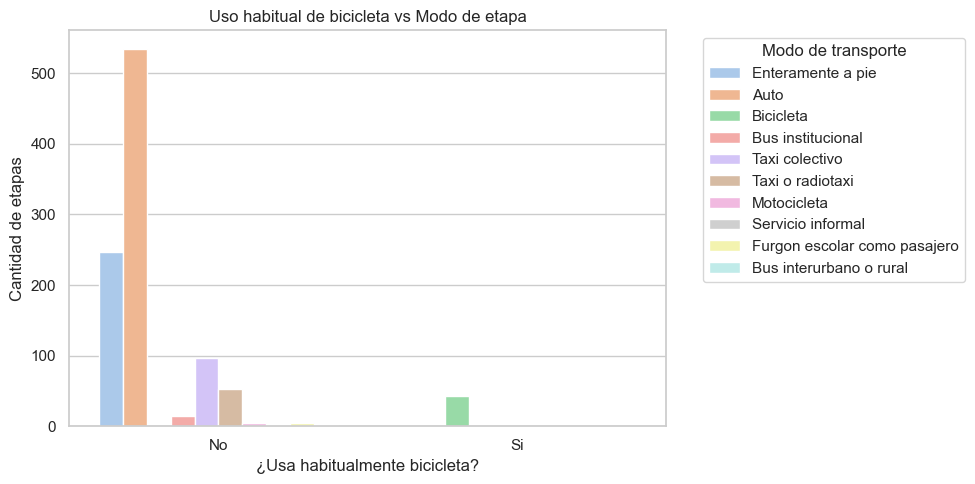

In [76]:
plt.figure(figsize=(10, 5))
sns.countplot(data=etapa, x='usohabitualbicicleta', hue='modoetapa')
plt.title('Uso habitual de bicicleta vs Modo de etapa')
plt.xlabel('¿Usa habitualmente bicicleta?')
plt.ylabel('Cantidad de etapas')
plt.legend(title='Modo de transporte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [77]:
etapa['pagotarifaviaje'].value_counts()

pagotarifaviaje
Desconocido          848
Si, adulto           124
Si, escolar           19
No, gratis o niño      5
No, pase liberado      4
Name: count, dtype: int64

In [78]:
cruce_pagotarifa = etapa.groupby(['pagotarifaviaje', 'modoetapa']).size().reset_index(name='conteo')
cruce_pagotarifa

pagotarifaviaje                     modoetapa  conteo
0         Desconocido                          Auto     534
1         Desconocido                     Bicicleta      43
2         Desconocido             Bus institucional      15
3         Desconocido             Enteramente a pie     247
4         Desconocido  Furgon escolar como pasajero       5
5         Desconocido                   Motocicleta       4
6   No, gratis o niño             Servicio informal       1
7   No, gratis o niño              Taxi o radiotaxi       4
8   No, pase liberado       Bus interurbano o rural       2
9   No, pase liberado                Taxi colectivo       2
10         Si, adulto                Taxi colectivo      79
11         Si, adulto              Taxi o radiotaxi      45
12        Si, escolar                Taxi colectivo      15
13        Si, escolar              Taxi o radiotaxi       4

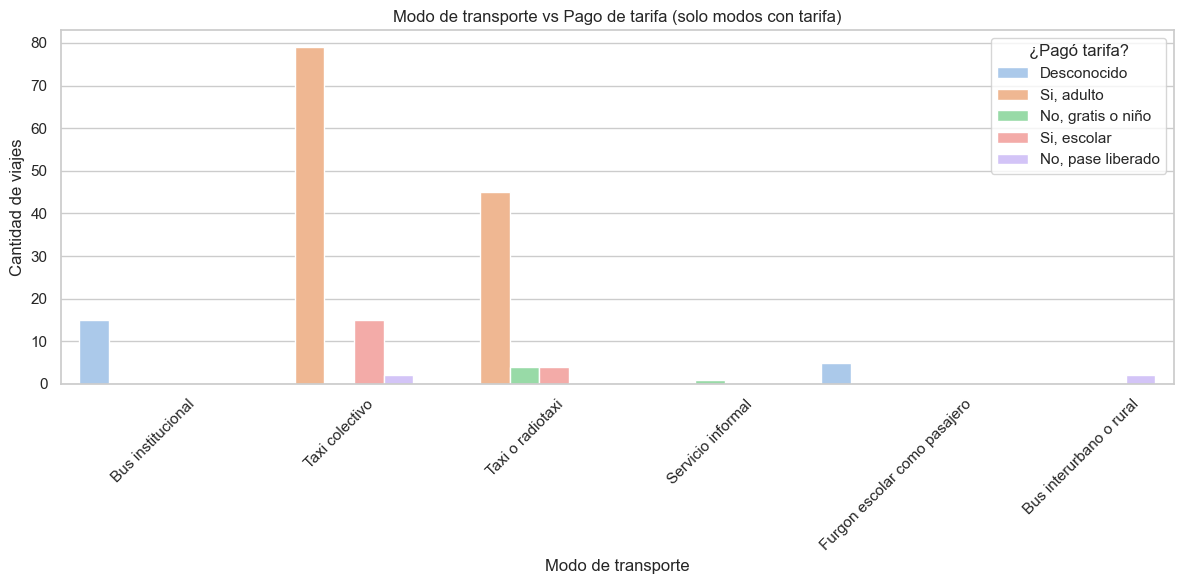

In [79]:
etapa_filtrada = etapa[~etapa['modoetapa'].isin(['Auto', 'Bicicleta', 'Enteramente a pie', 'Motocicleta'])]

plt.figure(figsize=(12, 6))
sns.countplot(data=etapa_filtrada, x='modoetapa', hue='pagotarifaviaje')
plt.title('Modo de transporte vs Pago de tarifa (solo modos con tarifa)')
plt.xlabel('Modo de transporte')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45)
plt.legend(title='¿Pagó tarifa?')
plt.tight_layout()
plt.show()

In [80]:
etapa['montopagoestacionamiento'].value_counts()

montopagoestacionamiento
Desconocido               575
No pago                   401
No sabe/ No se acuerda     24
Name: count, dtype: int64

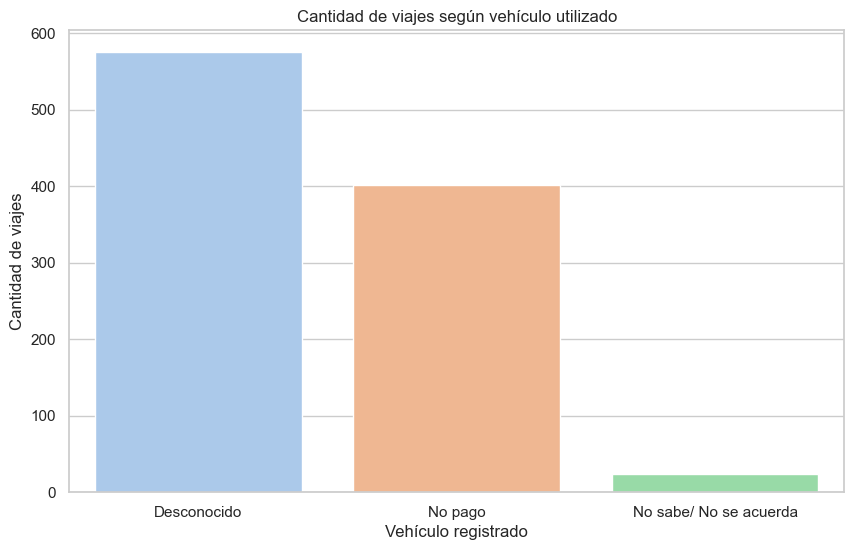

In [81]:
sns.countplot(data=etapa, x='montopagoestacionamiento')
plt.title('Cantidad de viajes según vehículo utilizado')
plt.xlabel('Vehículo registrado')
plt.ylabel('Cantidad de viajes')
plt.show()

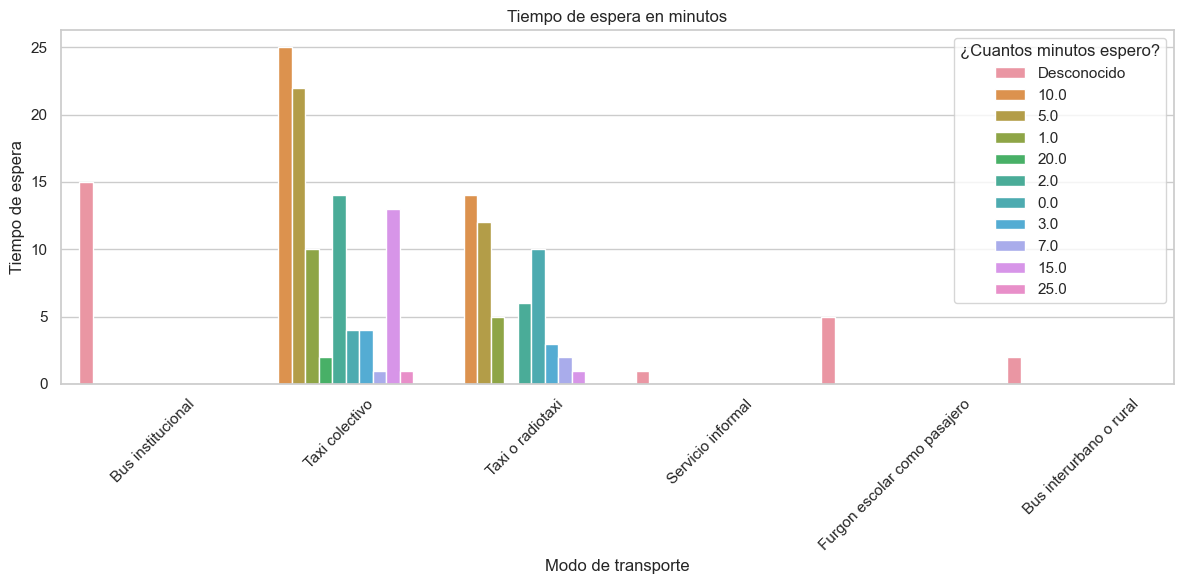

In [82]:
cruce_tiempoespera = etapa.groupby(['tiempoespera', 'modoetapa']).size().reset_index(name='conteo')



etapa_filtrada = etapa[~etapa['modoetapa'].isin(['Auto', 'Bicicleta', 'Enteramente a pie', 'Motocicleta'])]

plt.figure(figsize=(12, 6))
sns.countplot(data=etapa_filtrada, x='modoetapa', hue='tiempoespera')
plt.title('Tiempo de espera en minutos')
plt.xlabel('Modo de transporte')
plt.ylabel('Tiempo de espera')
plt.xticks(rotation=45)
plt.legend(title='¿Cuantos minutos espero?')
plt.tight_layout()
plt.show()

In [83]:
etapa['tiempoespera'] = pd.to_numeric(etapa['tiempoespera'], errors='coerce')
promedio_tiempoespera = etapa.groupby('modoetapa')['tiempoespera'].mean().reset_index()
print(promedio_tiempoespera)

                      modoetapa  tiempoespera
0                          Auto           NaN
1                     Bicicleta           NaN
2             Bus institucional           NaN
3       Bus interurbano o rural           NaN
4             Enteramente a pie           NaN
5  Furgon escolar como pasajero           NaN
6                   Motocicleta           NaN
7             Servicio informal           NaN
8                Taxi colectivo      7.052083
9              Taxi o radiotaxi      4.811321


In [84]:
etapa['motivonousociclovia'].value_counts()
#Se recodificó el valor 'Desconocido' como 'No Aplica' bajo el supuesto de que las personas que no declararon, son aquellas que no tiene acceso a una bicicleta
etapa['motivonousociclovia'] = etapa['motivonousociclovia'].replace('Desconocido', 'No aplica')

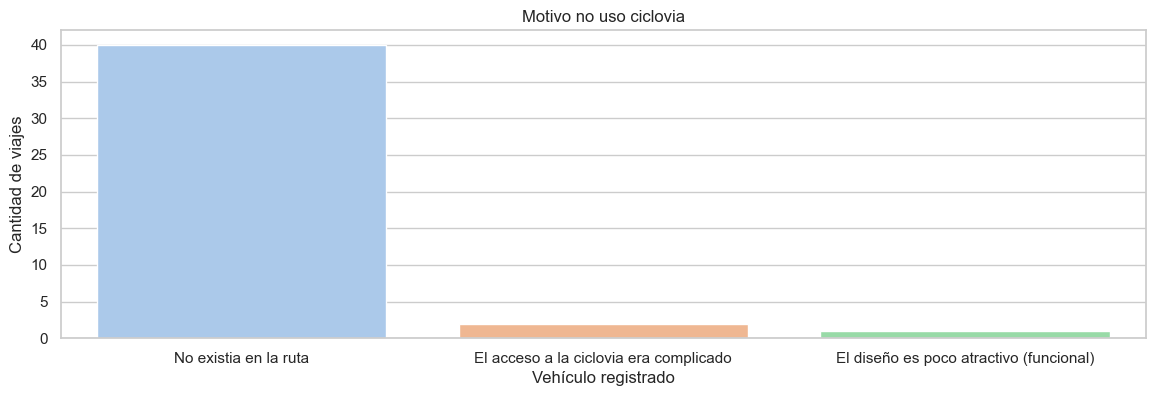

In [85]:
plt.figure(figsize=(14, 4))
sns.countplot(data=etapa[etapa['motivonousociclovia'] != 'No aplica'], x='motivonousociclovia' ) 
plt.title('Motivo no uso ciclovia')
plt.xlabel('Vehículo registrado')
plt.ylabel('Cantidad de viajes')
plt.show()

##### Tabla vehiculo

In [86]:
vehiculo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   folio                359 non-null    int64 
 1   ordenvehiculo        359 non-null    int64 
 2   tipovehiculo         359 non-null    object
 3   ordenconductor       359 non-null    int64 
 4   marcavehiculo        359 non-null    object
 5   anovehiculo          359 non-null    int64 
 6   combustiblevehiculo  359 non-null    object
 7   situacionvehiculo    359 non-null    object
 8   vehiculotrabajo      359 non-null    object
 9   factorexpansiona     359 non-null    object
dtypes: int64(4), object(6)
memory usage: 28.2+ KB


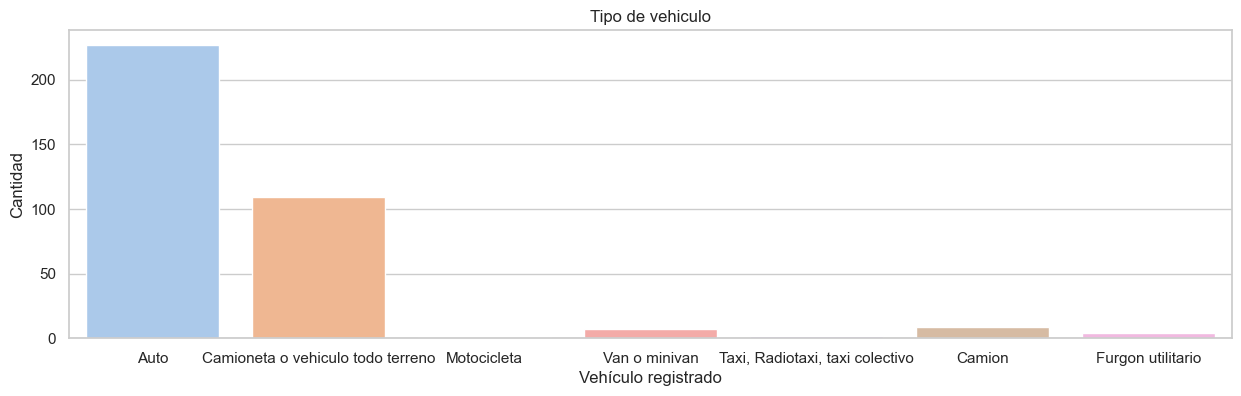

In [87]:
plt.figure(figsize= (15, 4))
sns.countplot(data=vehiculo, x='tipovehiculo')
plt.title('Tipo de vehiculo')
plt.xlabel('Vehículo registrado')
plt.ylabel('Cantidad')
plt.show()

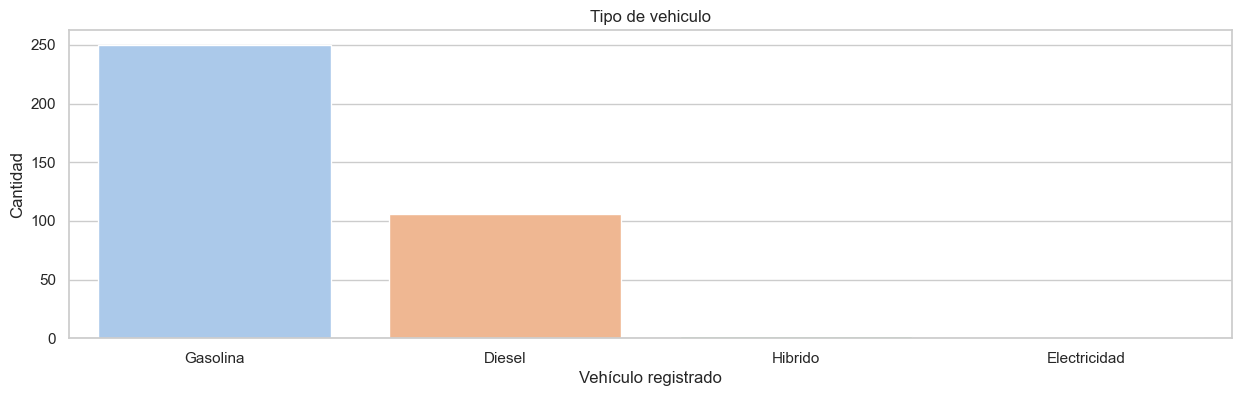

In [88]:
plt.figure(figsize= (15, 4))
sns.countplot(data=vehiculo, x='combustiblevehiculo')
plt.title('Tipo de vehiculo')
plt.xlabel('Vehículo registrado')
plt.ylabel('Cantidad')
plt.show()

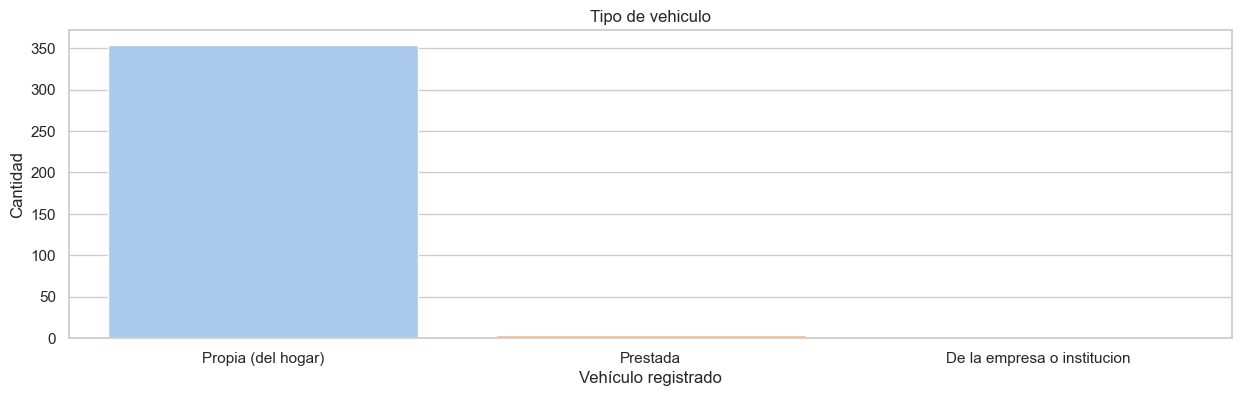

In [89]:
plt.figure(figsize= (15, 4))
sns.countplot(data=vehiculo, x='situacionvehiculo')
plt.title('Tipo de vehiculo')
plt.xlabel('Vehículo registrado')
plt.ylabel('Cantidad')
plt.show()

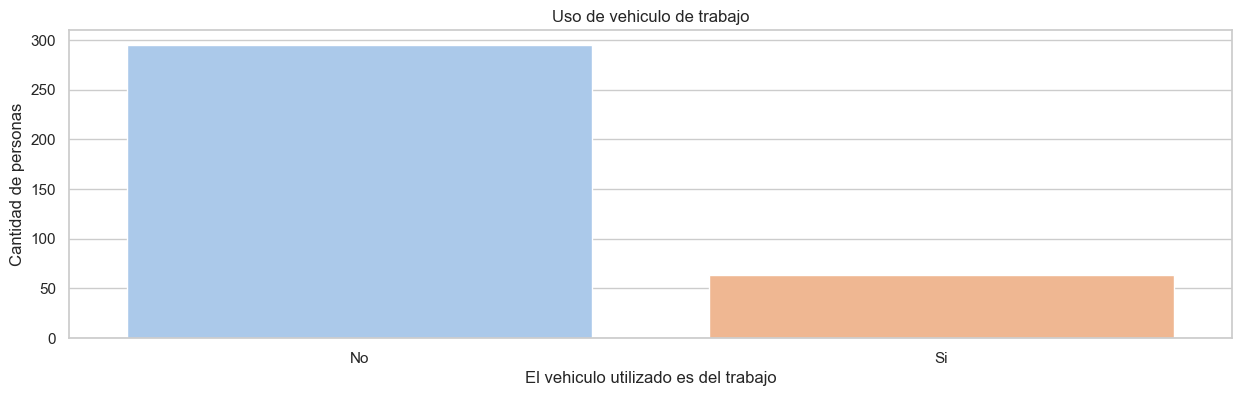

In [90]:
plt.figure(figsize= (15, 4))
sns.countplot(data=vehiculo, x='vehiculotrabajo')
plt.title('Uso de vehiculo de trabajo')
plt.xlabel('El vehiculo utilizado es del trabajo')
plt.ylabel('Cantidad de personas')
plt.show()

##### Tabla bicicleta

In [91]:
bicicleta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   folio               196 non-null    int64 
 1   ordenbicicleta      196 non-null    int64 
 2   tipobicicleta       196 non-null    object
 3   ordenconductor      196 non-null    int64 
 4   situacionbicicleta  196 non-null    object
 5   bicicletatrabajo    196 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.3+ KB


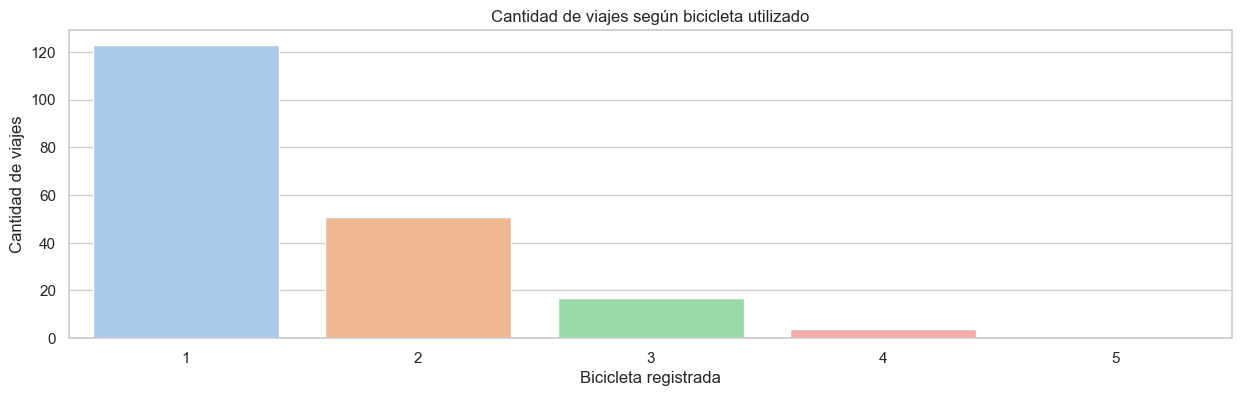

In [92]:
plt.figure(figsize= (15, 4))
sns.countplot(data=bicicleta, x='ordenbicicleta')
plt.title('Cantidad de viajes según bicicleta utilizado')
plt.xlabel('Bicicleta registrada')
plt.ylabel('Cantidad de viajes')
plt.show()

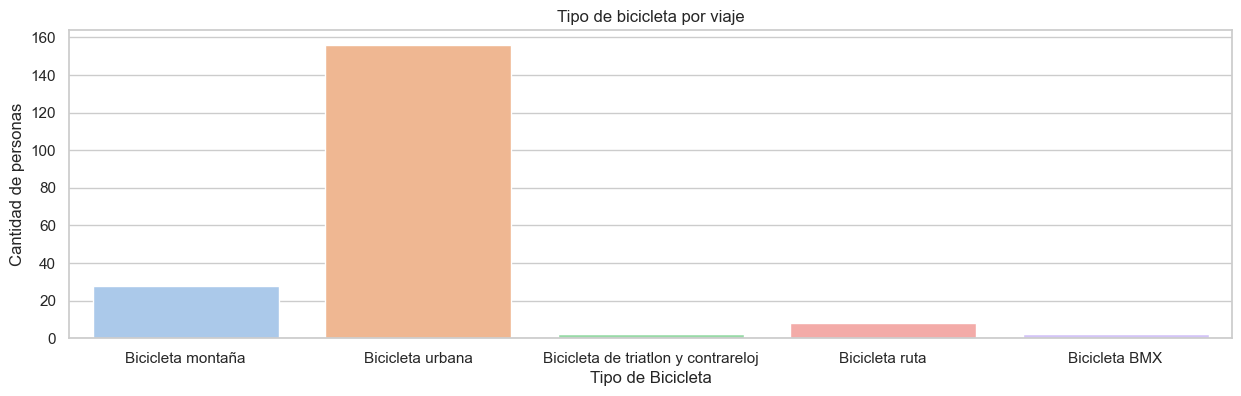

In [93]:
plt.figure(figsize= (15, 4))
sns.countplot(data=bicicleta, x='tipobicicleta')
plt.title('Tipo de bicicleta por viaje')
plt.xlabel('Tipo de Bicicleta')
plt.ylabel('Cantidad de personas')
plt.show()

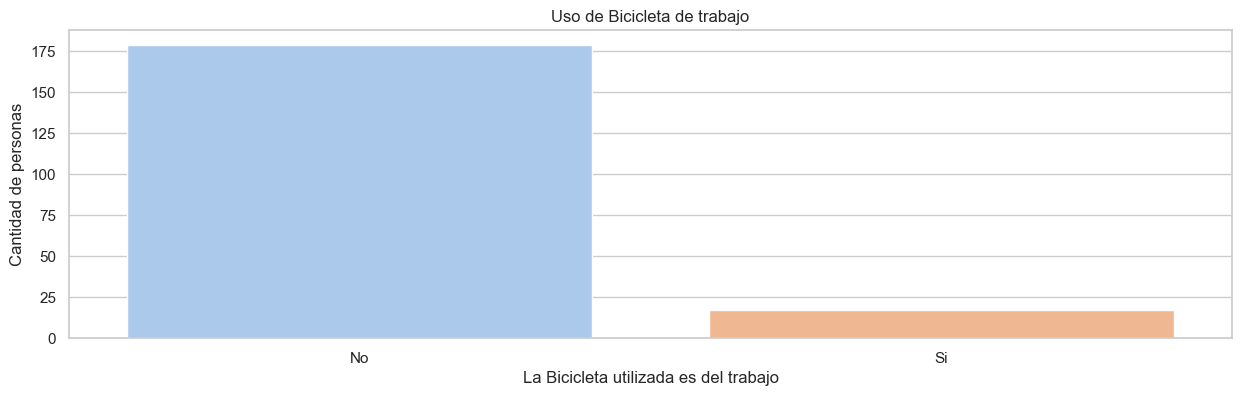

In [94]:
plt.figure(figsize= (15, 4))
sns.countplot(data=bicicleta, x='bicicletatrabajo')
plt.title('Uso de Bicicleta de trabajo')
plt.xlabel('La Bicicleta utilizada es del trabajo')
plt.ylabel('Cantidad de personas')
plt.show()

##### Tabla localizacion

In [95]:
localizacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   folio        520 non-null    int64 
 1   idzona       520 non-null    int64 
 2   idmacrozona  520 non-null    int64 
 3   zona         520 non-null    int64 
 4   macrozona    520 non-null    object
dtypes: int64(4), object(1)
memory usage: 20.4+ KB


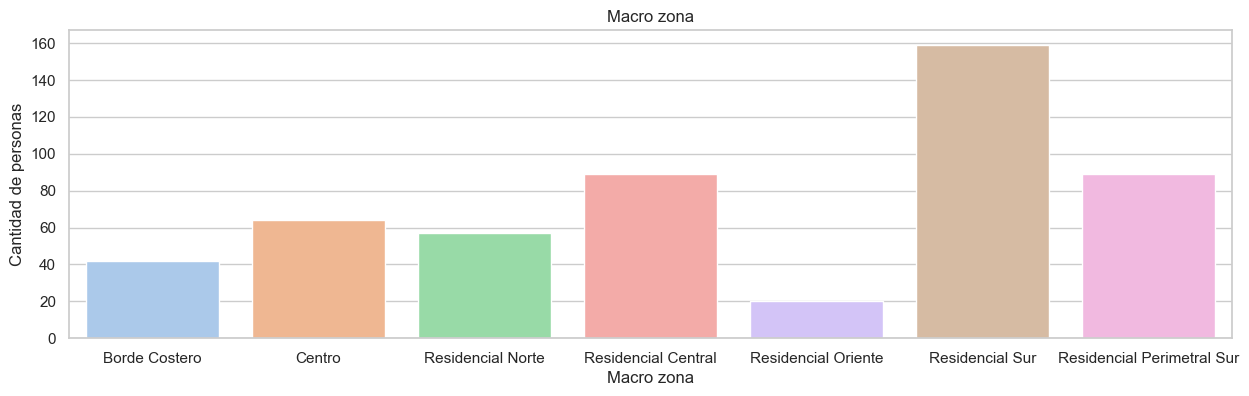

In [96]:
plt.figure(figsize= (15, 4))
sns.countplot(data=localizacion, x='macrozona')
plt.title('Macro zona')
plt.xlabel('Macro zona')
plt.ylabel('Cantidad de personas')
plt.show()

### Análisis especificos

#### Unión de tablas

In [97]:
#Merge Hogar y Persona
hogar_persona = pd.merge(persona, hogar, on='folio', how='left')

#Merge hogar_persona y viaje (Hogar + Persona + Viaje)
persona_viaje = pd.merge(hogar_persona, viaje, on=['folio', 'ordenpersona'], how='left')

#Merge (Hogar + Persona + Viaje + Etapa)
base_total = pd.merge(persona_viaje, etapa, on=['folio', 'ordenpersona', 'ordenviaje'], how='left')

base_total

folio  ordenpersona  diaentrevista_x  mesentrevista_x  horaentrevista_x  \
0     10011             1               17                6                18   
1     10011             2               17                6                18   
2     10011             3               17                6                20   
3     10011             3               17                6                20   
4     10011             3               17                6                20   
...     ...           ...              ...              ...               ...   
1677  12092             2                9                6                17   
1678  12101             1                9                6                18   
1679  12101             2                9                6                18   
1680  12101             3                9                6                18   
1681  12101             4                9                6                19   

      minutoentrevista_x     sexo        parentesco  mesnacimiento  \
0                      0   Hombre  Jefe(a) de hogar              3   
1                     10  Mujeres  Conyuge o Pareja              8   
2                      0  Mujeres       Hija o Hijo              6   
3                      0  Mujeres       Hija o Hijo              6   
4                      0  Mujeres       Hija o Hijo              6   
...                  ...      ...               ...            ...   
1677                  30  Mujeres       Hija o Hijo              6   
1678                  41   Hombre  Jefe(a) de hogar              9   
1679                  49  Mujeres  Conyuge o Pareja             10   
1680                  54  Mujeres       Hija o Hijo              6   
1681                   0  Mujeres       Hija o Hijo             12   

      agnonacimiento  ... pagotarifaviaje montotarifaviaje lugarbajovehiculo  \
0               1935  ...             NaN              NaN               NaN   
1               1944  ...             NaN              NaN               NaN   
2               1971  ...     Desconocido      Desconocido       Desconocido   
3               1971  ...     Desconocido      Desconocido       Desconocido   
4               1971  ...     Desconocido      Desconocido       Desconocido   
...              ...  ...             ...              ...               ...   
1677            1972  ...             NaN              NaN               NaN   
1678            1973  ...             NaN              NaN               NaN   
1679            1980  ...             NaN              NaN               NaN   
1680            2002  ...             NaN              NaN               NaN   
1681            2012  ...             NaN              NaN               NaN   

      lugarbajovehiculocomuna zona_lugarbajovehiculo sector_lugarbajovehiculo  \
0                         NaN                    NaN                      NaN   
1                         NaN                    NaN                      NaN   
2                 Desconocido            Desconocido              Desconocido   
3                 Desconocido            Desconocido              Desconocido   
4                 Desconocido            Desconocido              Desconocido   
...                       ...                    ...                      ...   
1677                      NaN                    NaN                      NaN   
1678                      NaN                    NaN                      NaN   
1679                      NaN                    NaN                      NaN   
1680                      NaN                    NaN                      NaN   
1681                      NaN                    NaN                      NaN   

     dondeestacionovehiculo lugarestacionovehiculo montopagoestacionamiento  \
0                       NaN                    NaN                      NaN   
1                       NaN                    NaN                      NaN   
2               Desco

#### Consultas especificas

##### Conteo de variables clave

In [98]:
bins = [0, 12, 18, 29, 64, float('inf')]
etiquetas = ['De 0 a 12 años', 'De 13 a 18 años', 'De 19 a 29 años', 
             'De 30 a 64 años', 'Mas de 65 años']

base_total['grupo_edad'] = pd.cut(
    base_total['edad'],
    bins=bins,
    labels=etiquetas,
    right=True,
    include_lowest=True
)
# Rellenar valores NaN con "Desconocido"
base_total['grupo_edad'].value_counts()

grupo_edad
De 30 a 64 años    928
Mas de 65 años     304
De 0 a 12 años     175
De 19 a 29 años    159
De 13 a 18 años    116
Name: count, dtype: int64

In [99]:
personas_unicas = base_total[['folio', 'ordenpersona', 'sexo', 'grupo_edad', 'realizoviaje', 'integrantecapred', 'capredtipo']].drop_duplicates()

In [100]:
viajes_unicos = base_total[['folio', 'ordenpersona', 'ordenviaje', 'proposito']].drop_duplicates()

In [101]:
hogares_unicos = base_total[['folio', 'ordenpersona']].drop_duplicates()
conteo_hogar = hogares_unicos.groupby('folio').size().reset_index(name='nmiembros')
hogares_unicos = base_total[['folio', 'ordenpersona']].drop_duplicates()
hogares_con_nmiembros = hogares_unicos.groupby('folio').size().reset_index(name='nmiembros')

In [102]:
personas_con_modo = base_total[['folio', 'ordenpersona', 'sexo', 'grupo_edad', 'realizoviaje', 'integrantecapred', 'capredtipo', 'modoetapa1', 'tipoasiento_x', 'freqprivado', 'freqcaminata', 'freqbicicleta', 'tiempoviaje_min', 'periodo']].drop_duplicates()

C:\Users\Catalina\AppData\Local\Temp\ipykernel_10372\3294601556.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_respuesta = conteo.groupby('grupo_edad')['conteo'].transform('sum')
C:\Users\Catalina\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Catalina\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt 

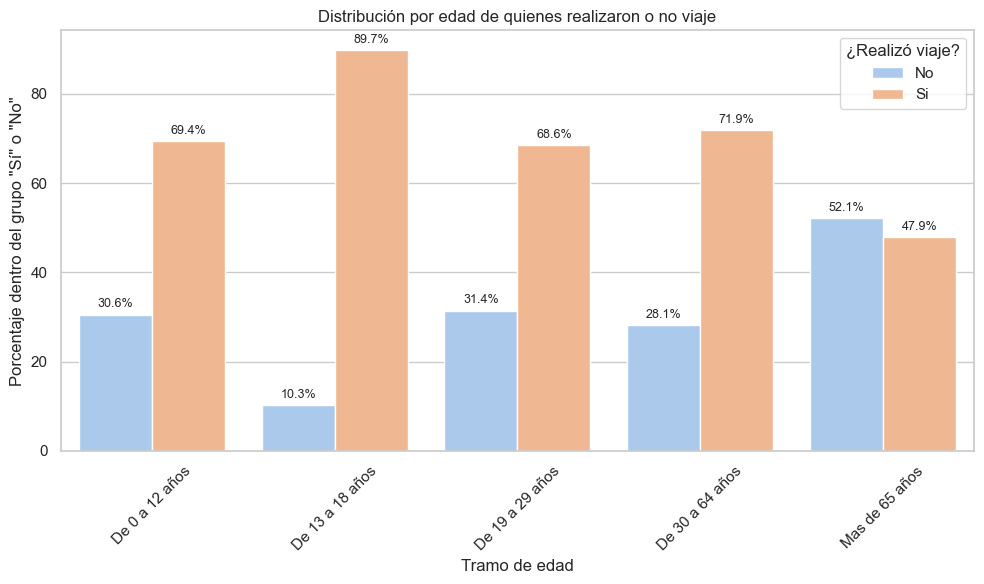

In [162]:
conteo = (
    personas_unicas.groupby(['realizoviaje', 'grupo_edad'], observed=True)
    .size()
    .reset_index(name='conteo')
)

# Total de personas por cada respuesta (sí o no)
total_por_respuesta = conteo.groupby('grupo_edad')['conteo'].transform('sum')

conteo['porcentaje'] = conteo['conteo'] / total_por_respuesta * 100

sns.set_palette("pastel")
orden_tramos = ['De 0 a 12 años', 'De 13 a 18 años', 'De 19 a 29 años', 
                'De 30 a 64 años', 'Mas de 65 años']
grafico = sns.barplot(data=conteo, 
                      x='grupo_edad', y='porcentaje', hue='realizoviaje', 
                      order=orden_tramos)

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%', 
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)

plt.title('Distribución por edad de quienes realizaron o no viaje')
plt.xlabel('Tramo de edad')
plt.ylabel('Porcentaje dentro del grupo "Sí" o "No"')
plt.xticks(rotation=45)
plt.legend(title='¿Realizó viaje?')
plt.savefig('graficos/realizaviaje_vs_edad.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

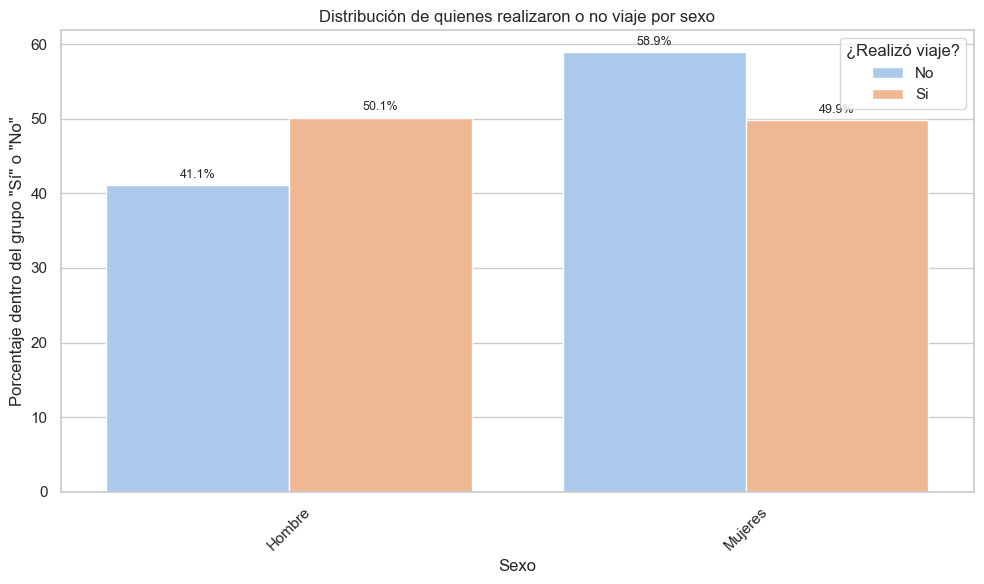

In [104]:
conteo = (
    personas_unicas.groupby(['realizoviaje', 'sexo'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_respuesta = conteo.groupby('realizoviaje')['conteo'].transform('sum')


conteo['porcentaje'] = conteo['conteo'] / total_por_respuesta * 100

sns.set_palette("pastel")
orden_sexo = ['Hombre', 'Mujeres']  
grafico = sns.barplot(data=conteo, 
                      x='sexo', y='porcentaje', hue='realizoviaje', 
                      order=orden_sexo)

# Anotar porcentaje
for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%', 
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)

# Actualización de título y etiquetas
plt.title('Distribución de quienes realizaron o no viaje por sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje dentro del grupo "Sí" o "No"')
plt.xticks(rotation=45)
plt.legend(title='¿Realizó viaje?')
plt.tight_layout()
plt.show()

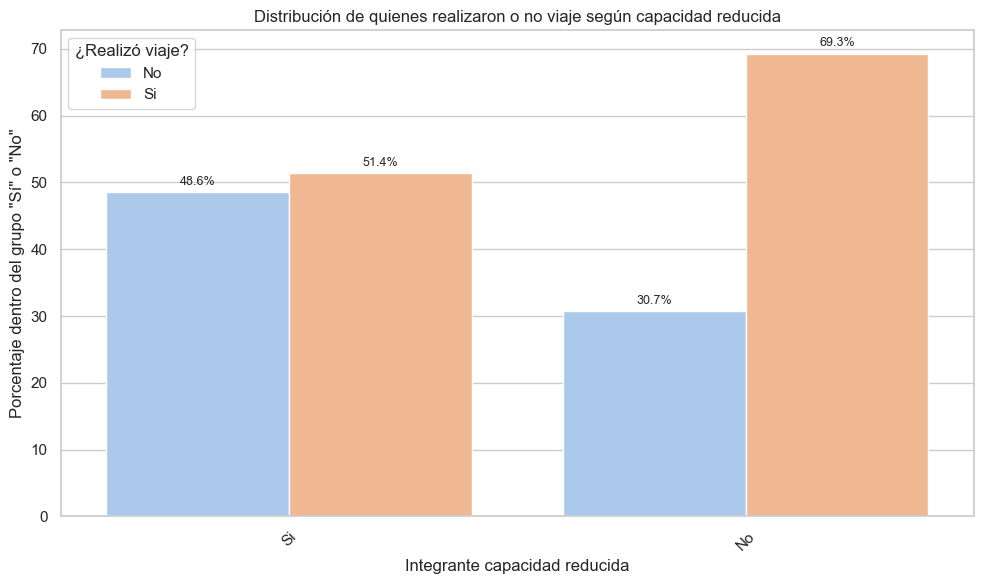

In [105]:
conteo = (
    personas_unicas.groupby(['integrantecapred', 'realizoviaje'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_respuesta = conteo.groupby('integrantecapred')['conteo'].transform('sum')


conteo['porcentaje'] = conteo['conteo'] / total_por_respuesta * 100

sns.set_palette("pastel")
orden_integrantecapred = ['Si', 'No']  
grafico = sns.barplot(data=conteo, 
                      x='integrantecapred', y='porcentaje', hue='realizoviaje', 
                      order=orden_integrantecapred)


for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%', 
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)


plt.title('Distribución de quienes realizaron o no viaje según capacidad reducida')
plt.xlabel('Integrante capacidad reducida')
plt.ylabel('Porcentaje dentro del grupo "Sí" o "No"')
plt.xticks(rotation=45)
plt.legend(title='¿Realizó viaje?')
plt.tight_layout()
plt.show()

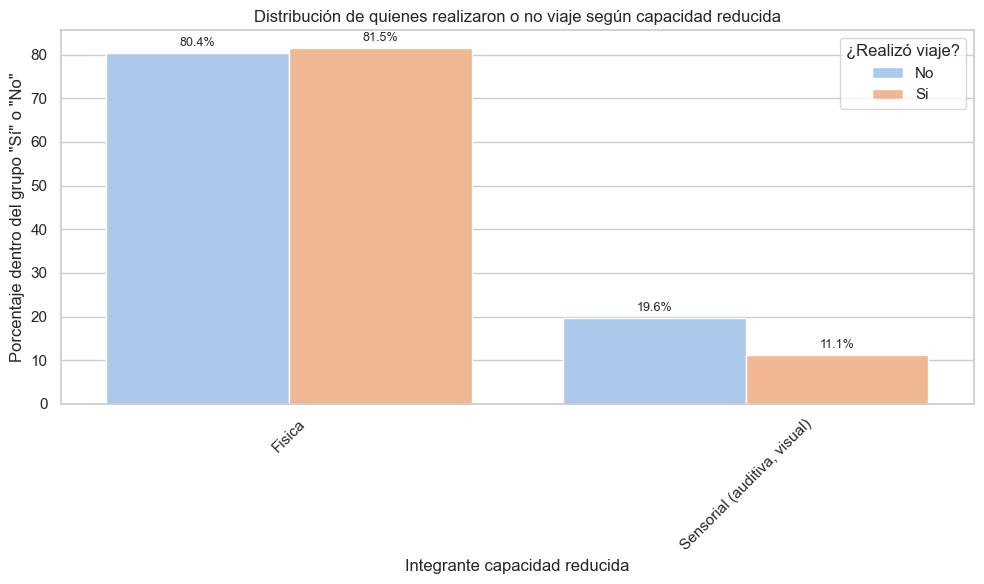

In [106]:
personas_unicas_filtradas = personas_unicas[personas_unicas['capredtipo'] != 'No aplica']

conteo = (
    personas_unicas_filtradas.groupby(['capredtipo', 'realizoviaje'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_respuesta = conteo.groupby('realizoviaje')['conteo'].transform('sum')


conteo['porcentaje'] = conteo['conteo'] / total_por_respuesta * 100


sns.set_palette("pastel")
orden_capredtipo = ['Fisica', 'Sensorial (auditiva, visual)']
grafico = sns.barplot(data=conteo, 
                      x='capredtipo', y='porcentaje', hue='realizoviaje', 
                      order=orden_capredtipo)


for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%', 
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)


plt.title('Distribución de quienes realizaron o no viaje según capacidad reducida')
plt.xlabel('Integrante capacidad reducida')
plt.ylabel('Porcentaje dentro del grupo "Sí" o "No"')
plt.xticks(rotation=45)
plt.legend(title='¿Realizó viaje?')
plt.tight_layout()
plt.show()

In [107]:
personas_viajesi = personas_con_modo[personas_con_modo['realizoviaje'] == 'Si']

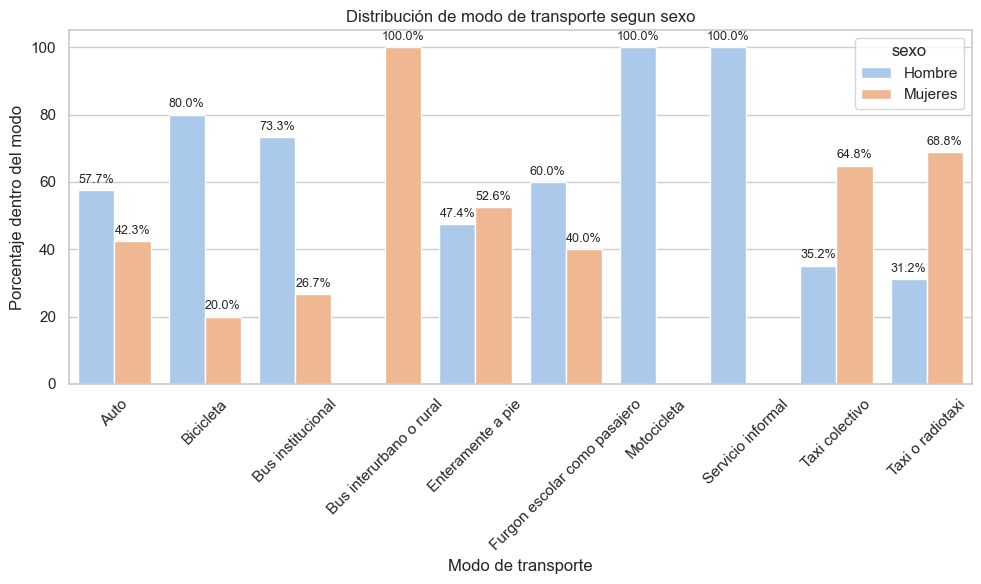

In [108]:
conteo_sexo = (
    personas_viajesi.groupby(['modoetapa1', 'sexo'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_modo = conteo_sexo.groupby('modoetapa1')['conteo'].transform('sum')
conteo_sexo['porcentaje'] = conteo_sexo['conteo'] / total_por_modo * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_sexo, x='modoetapa1', y='porcentaje', hue='sexo')


for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)

plt.title('Distribución de modo de transporte segun sexo')
plt.xlabel('Modo de transporte')
plt.ylabel('Porcentaje dentro del modo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

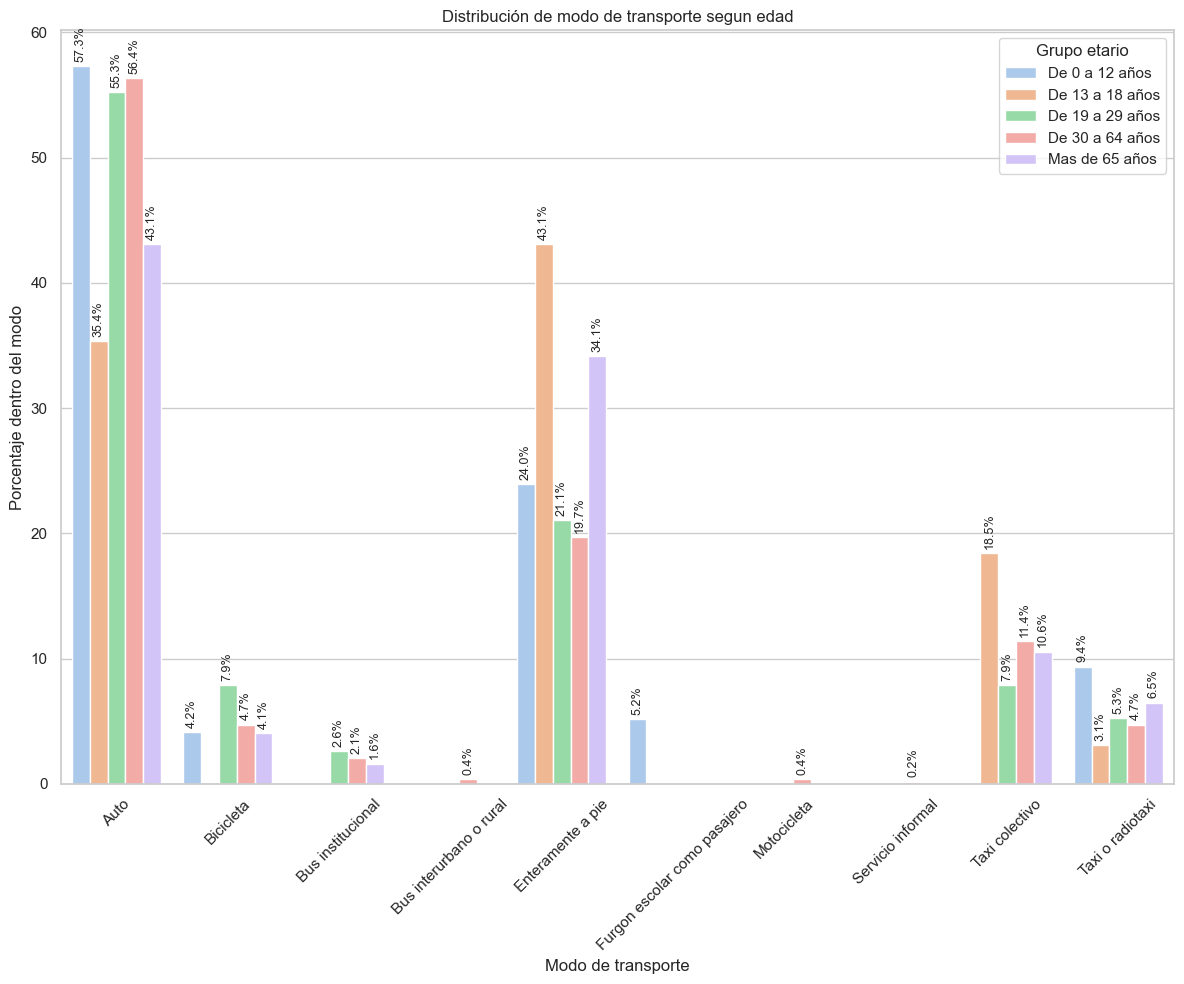

In [109]:
conteo_edad = (
    personas_viajesi.groupby(['modoetapa1', 'grupo_edad'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_modo = conteo_edad.groupby('grupo_edad',  observed=True)['conteo'].transform('sum')
conteo_edad['porcentaje'] = conteo_edad['conteo'] / total_por_modo * 100

plt.figure(figsize=(12, 10))
sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_edad, x='modoetapa1', y='porcentaje', hue='grupo_edad')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', 
                             rotation= 90, fontsize=9)

plt.title('Distribución de modo de transporte segun edad')
plt.xlabel('Modo de transporte')
plt.ylabel('Porcentaje dentro del modo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Grupo etario')
plt.show()

In [110]:
personas_viajesi_discapacidad = personas_viajesi[personas_viajesi['integrantecapred'] == 'Si']

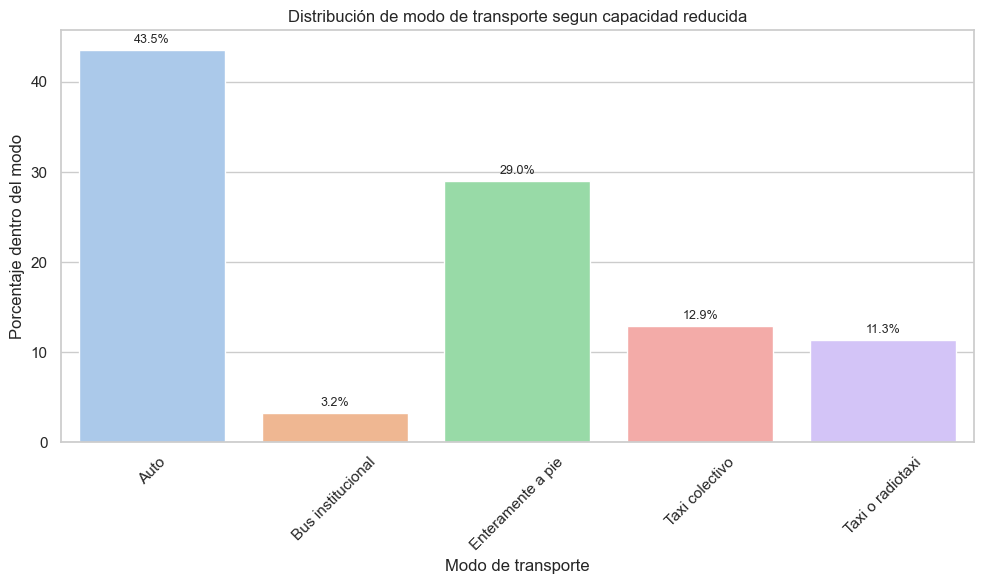

In [111]:

conteo_discapacidad = (
    personas_viajesi_discapacidad.groupby(['modoetapa1', 'integrantecapred'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_modo = conteo_discapacidad.groupby('integrantecapred')['conteo'].transform('sum')
conteo_discapacidad['porcentaje'] = conteo_discapacidad['conteo'] / total_por_modo * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_discapacidad, x='modoetapa1', y='porcentaje')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)

plt.title('Distribución de modo de transporte segun capacidad reducida')
plt.xlabel('Modo de transporte')
plt.ylabel('Porcentaje dentro del modo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

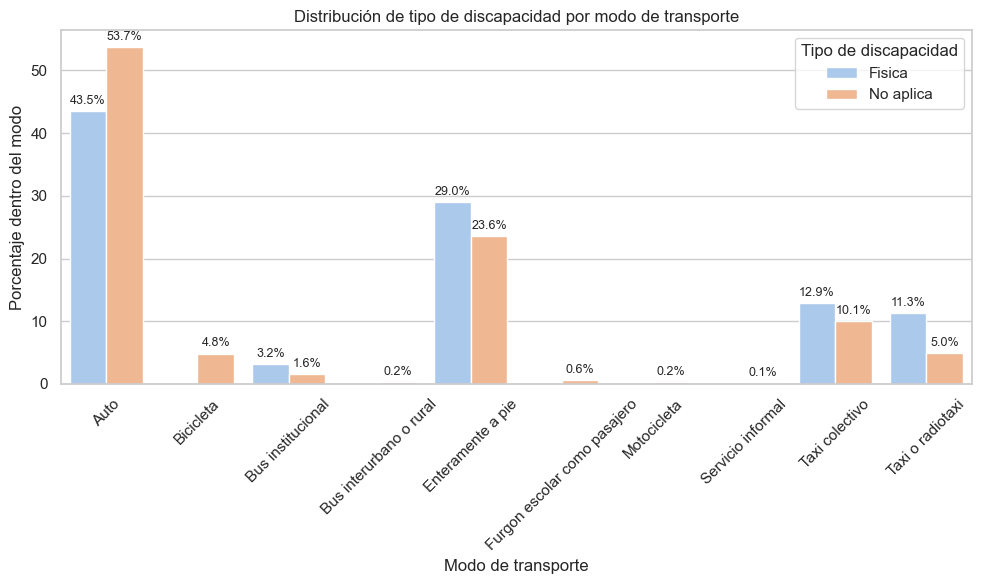

In [112]:
conteo_tipo_discapacidad = (
    personas_viajesi.groupby(['modoetapa1', 'capredtipo'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_modo = conteo_tipo_discapacidad.groupby('capredtipo', observed=True)['conteo'].transform('sum')
conteo_tipo_discapacidad['porcentaje'] = conteo_tipo_discapacidad['conteo'] / total_por_modo * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_tipo_discapacidad, x='modoetapa1', y='porcentaje', hue='capredtipo')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)

plt.title('Distribución de tipo de discapacidad por modo de transporte')
plt.xlabel('Modo de transporte')
plt.ylabel('Porcentaje dentro del modo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Tipo de discapacidad')
plt.show()


In [113]:
personas_con_modochofer = personas_con_modo[personas_con_modo['tipoasiento_x'] != 'Desconocido']

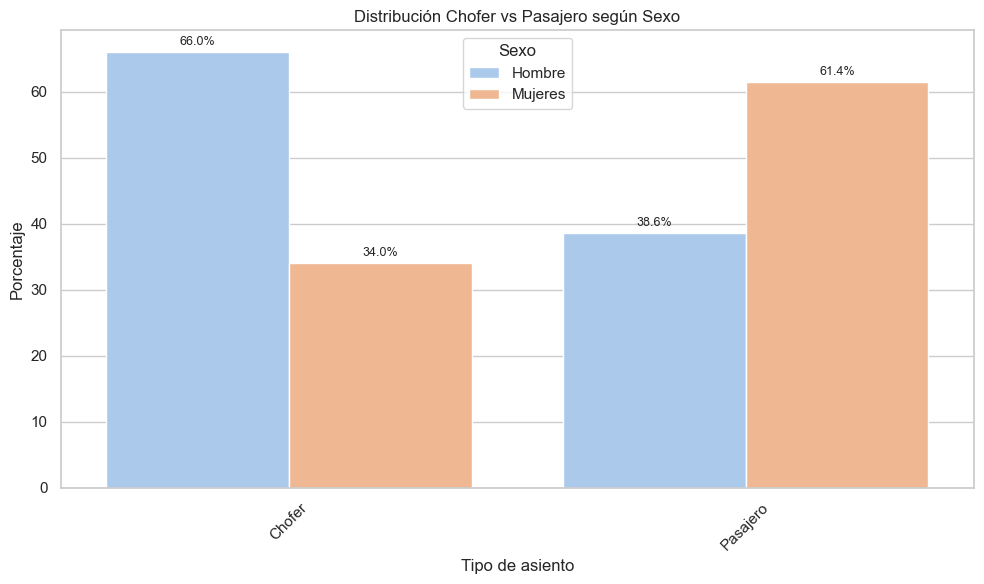

In [114]:
conteo_chofer = (
    personas_con_modochofer.groupby(['sexo', 'tipoasiento_x'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_asiento = conteo_chofer.groupby('tipoasiento_x')['conteo'].transform('sum')
conteo_chofer['porcentaje'] = conteo_chofer['conteo'] / total_por_asiento * 100


plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_chofer, x='tipoasiento_x', y='porcentaje', hue='sexo')


for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)

plt.title('Distribución Chofer vs Pasajero según Sexo')
plt.xlabel('Tipo de asiento')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Sexo')
plt.show()

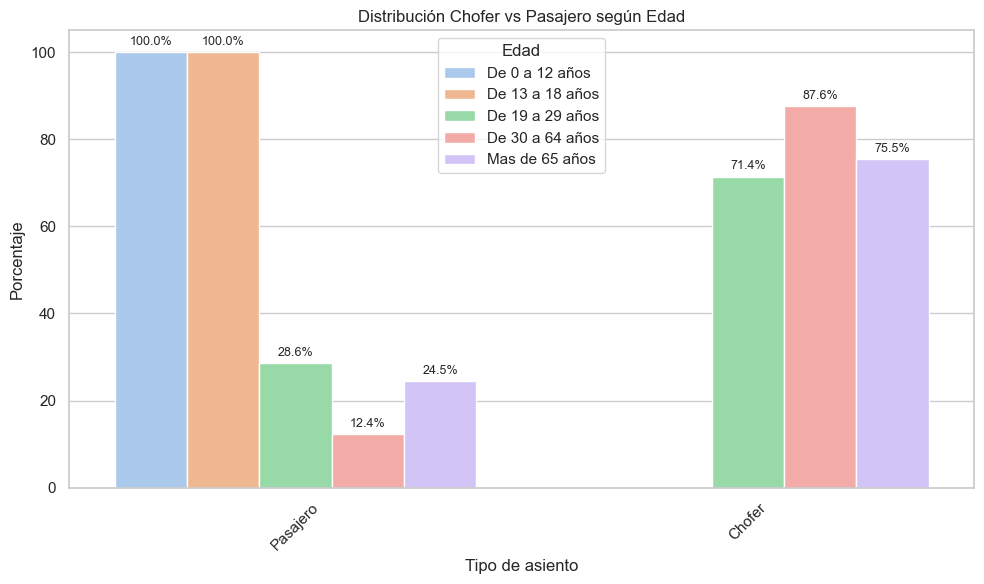

In [115]:
conteo_chofer = (
    personas_con_modochofer.groupby(['grupo_edad', 'tipoasiento_x'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_asiento = conteo_chofer.groupby('grupo_edad', observed=True)['conteo'].transform('sum')
conteo_chofer['porcentaje'] = conteo_chofer['conteo'] / total_por_asiento * 100


plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_chofer, x='tipoasiento_x', y='porcentaje', hue='grupo_edad')


for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)

plt.title('Distribución Chofer vs Pasajero según Edad')
plt.xlabel('Tipo de asiento')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Edad')
plt.show()

In [116]:
modo_chofer_capred = personas_con_modochofer[personas_con_modochofer['integrantecapred'] == 'Si']

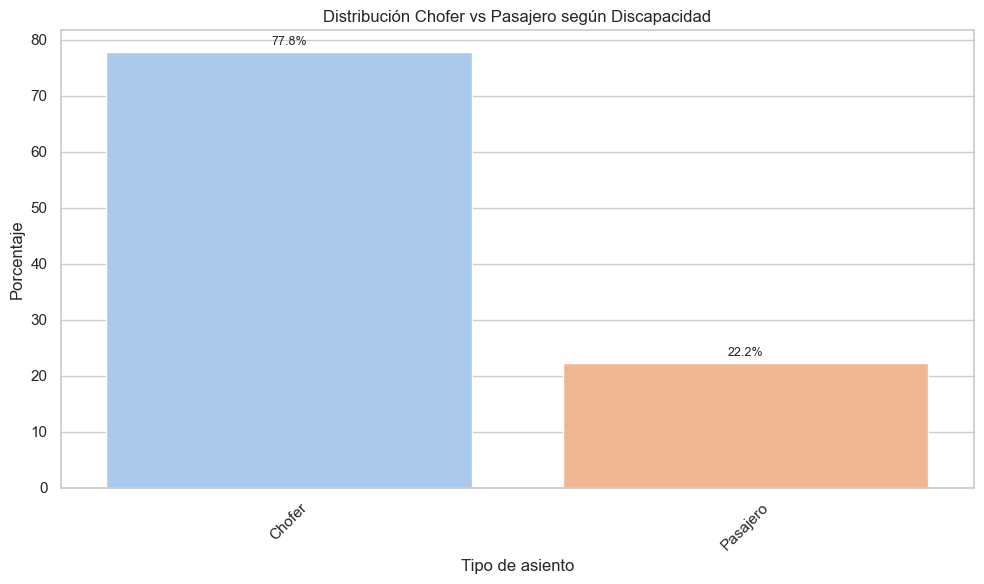

In [117]:
conteo_chofer = (
    modo_chofer_capred.groupby(['integrantecapred', 'tipoasiento_x'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total_por_asiento = conteo_chofer.groupby('integrantecapred', observed=True)['conteo'].transform('sum')
conteo_chofer['porcentaje'] = conteo_chofer['conteo'] / total_por_asiento * 100


plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_chofer, x='tipoasiento_x', y='porcentaje')


for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=9)

plt.title('Distribución Chofer vs Pasajero según Discapacidad')
plt.xlabel('Tipo de asiento')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

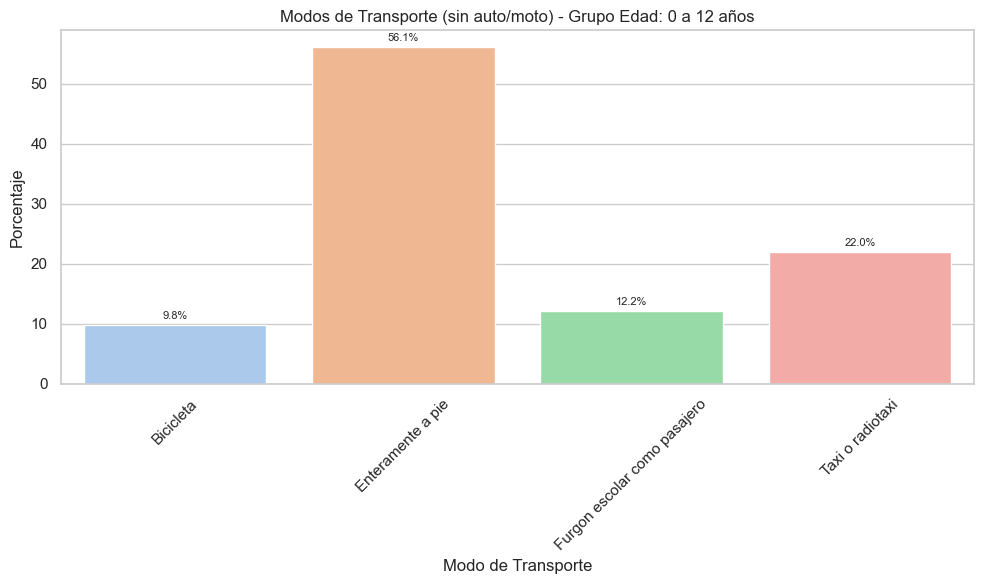

In [118]:
personas_con_modo12 = personas_con_modo[personas_con_modo['grupo_edad'] == 'De 0 a 12 años']

# Excluir Auto y Motocicleta
modos_excluidos = ['Auto', 'Motocicleta']
modo_filtrado12 = personas_con_modo12[~personas_con_modo12['modoetapa1'].isin(modos_excluidos)]

# Agrupación y cálculo
conteo_12 = (
    modo_filtrado12.groupby('modoetapa1', observed=True)
    .size()
    .reset_index(name='conteo')
)

total_12 = conteo_12['conteo'].sum()
conteo_12['porcentaje'] = conteo_12['conteo'] / total_12 * 100


sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_12, x='modoetapa1', y='porcentaje')

for bar in grafico.containers[0]:
    height = bar.get_height()
    if not np.isnan(height):
        grafico.annotate(f'{height:.1f}%',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),
                         textcoords='offset points',
                         ha='center', va='bottom', fontsize=8)

plt.title('Modos de Transporte (sin auto/moto) - Grupo Edad: 0 a 12 años')
plt.xlabel('Modo de Transporte')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

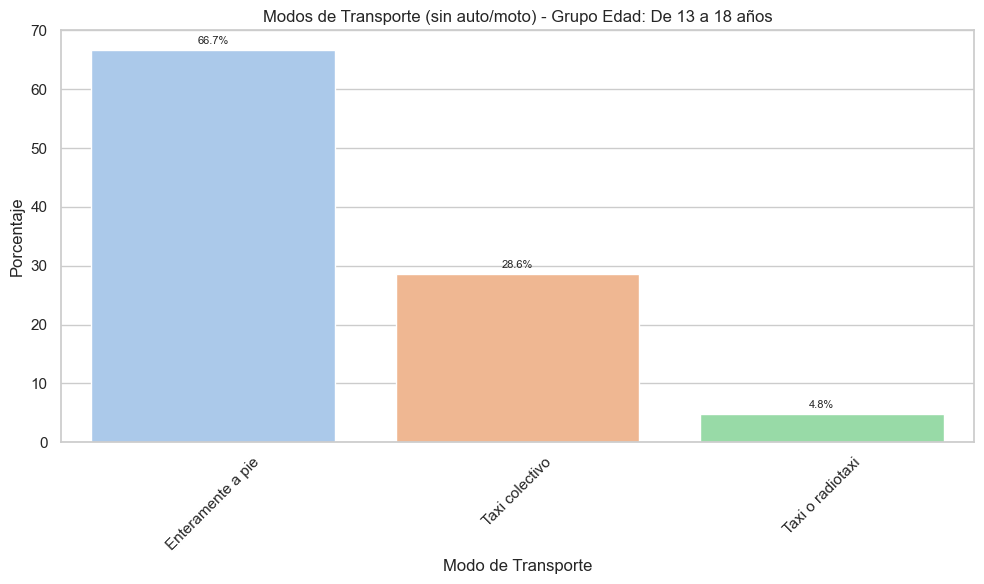

In [119]:
personas_con_modo18 = personas_con_modo[personas_con_modo['grupo_edad'] == 'De 13 a 18 años']

modos_excluidos = ['Auto', 'Motocicleta']
modo_filtrado18 = personas_con_modo18[~personas_con_modo18['modoetapa1'].isin(modos_excluidos)]

conteo_18 = (
    modo_filtrado18.groupby('modoetapa1', observed=True)
    .size()
    .reset_index(name='conteo')
)

total_18 = conteo_18['conteo'].sum()
conteo_18['porcentaje'] = conteo_18['conteo'] / total_18 * 100


sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_18, x='modoetapa1', y='porcentaje')

for bar in grafico.containers[0]:
    height = bar.get_height()
    if not np.isnan(height):
        grafico.annotate(f'{height:.1f}%',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),
                         textcoords='offset points',
                         ha='center', va='bottom', fontsize=8)

plt.title('Modos de Transporte (sin auto/moto) - Grupo Edad: De 13 a 18 años')
plt.xlabel('Modo de Transporte')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

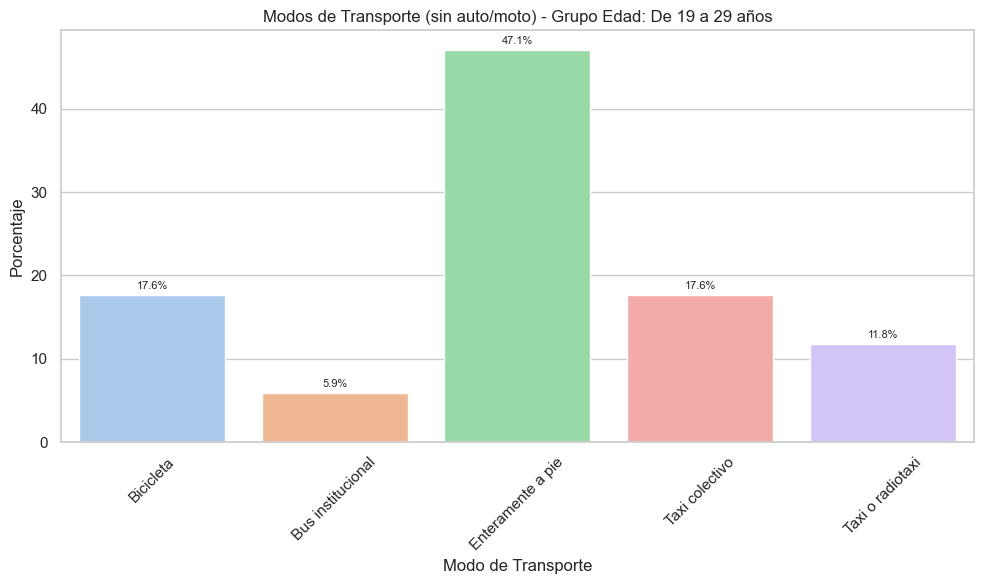

In [120]:
personas_con_modo29 = personas_con_modo[personas_con_modo['grupo_edad'] == 'De 19 a 29 años']

modos_excluidos = ['Auto', 'Motocicleta']
modo_filtrado29 = personas_con_modo29[~personas_con_modo29['modoetapa1'].isin(modos_excluidos)]

conteo_29 = (
    modo_filtrado29.groupby('modoetapa1', observed=True)
    .size()
    .reset_index(name='conteo')
)

total_29 = conteo_29['conteo'].sum()
conteo_29['porcentaje'] = conteo_29['conteo'] / total_29 * 100


sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_29, x='modoetapa1', y='porcentaje')

for bar in grafico.containers[0]:
    height = bar.get_height()
    if not np.isnan(height):
        grafico.annotate(f'{height:.1f}%',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),
                         textcoords='offset points',
                         ha='center', va='bottom', fontsize=8)

plt.title('Modos de Transporte (sin auto/moto) - Grupo Edad: De 19 a 29 años')
plt.xlabel('Modo de Transporte')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

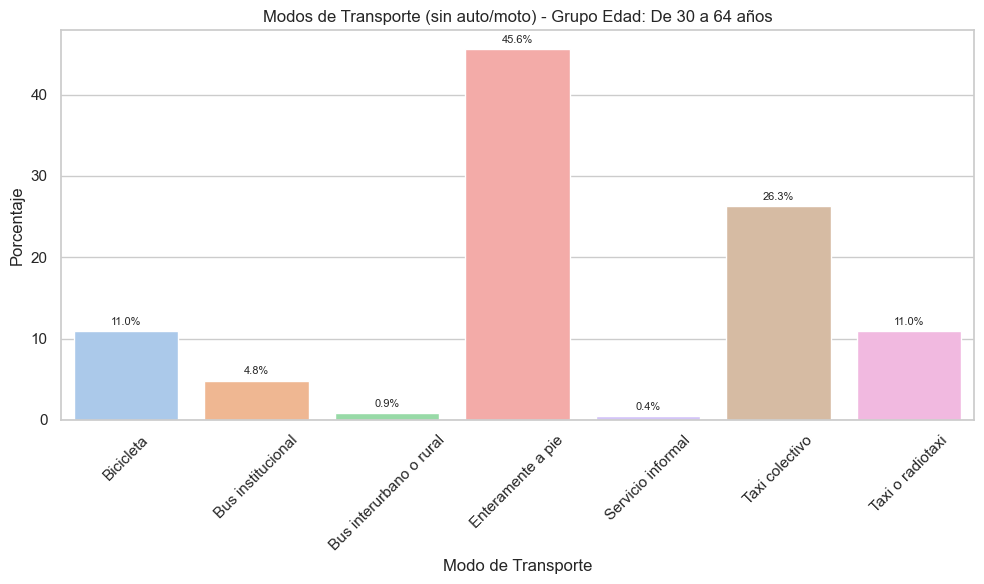

In [121]:
personas_con_modo64 = personas_con_modo[personas_con_modo['grupo_edad'] == 'De 30 a 64 años']

modos_excluidos = ['Auto', 'Motocicleta']
modo_filtrado64 = personas_con_modo64[~personas_con_modo64['modoetapa1'].isin(modos_excluidos)]

conteo_64 = (
    modo_filtrado64.groupby('modoetapa1', observed=True)
    .size()
    .reset_index(name='conteo')
)

total_64 = conteo_64['conteo'].sum()
conteo_64['porcentaje'] = conteo_64['conteo'] / total_64 * 100


sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_64, x='modoetapa1', y='porcentaje')

for bar in grafico.containers[0]:
    height = bar.get_height()
    if not np.isnan(height):
        grafico.annotate(f'{height:.1f}%',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),
                         textcoords='offset points',
                         ha='center', va='bottom', fontsize=8)

plt.title('Modos de Transporte (sin auto/moto) - Grupo Edad: De 30 a 64 años')
plt.xlabel('Modo de Transporte')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

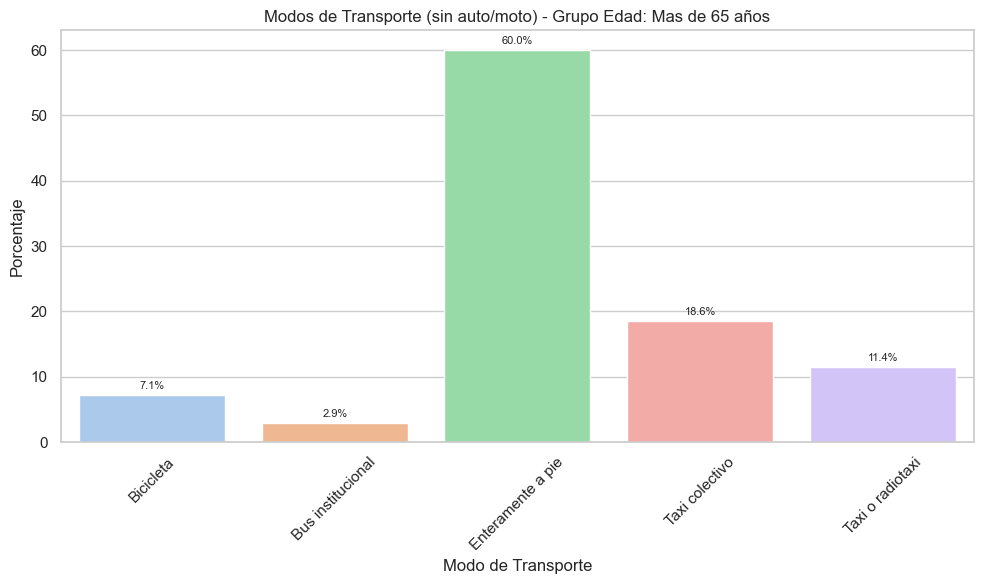

In [122]:
personas_con_modo65 = personas_con_modo[personas_con_modo['grupo_edad'] == 'Mas de 65 años']


modos_excluidos = ['Auto', 'Motocicleta']
modo_filtrado65 = personas_con_modo65[~personas_con_modo65['modoetapa1'].isin(modos_excluidos)]

conteo_65 = (
    modo_filtrado65.groupby('modoetapa1', observed=True)
    .size()
    .reset_index(name='conteo')
)

total_65 = conteo_65['conteo'].sum()
conteo_65['porcentaje'] = conteo_65['conteo'] / total_65 * 100


sns.set_palette("pastel")
grafico = sns.barplot(data=conteo_65, x='modoetapa1', y='porcentaje')

for bar in grafico.containers[0]:
    height = bar.get_height()
    if not np.isnan(height):
        grafico.annotate(f'{height:.1f}%',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),
                         textcoords='offset points',
                         ha='center', va='bottom', fontsize=8)

plt.title('Modos de Transporte (sin auto/moto) - Grupo Edad: Mas de 65 años')
plt.xlabel('Modo de Transporte')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

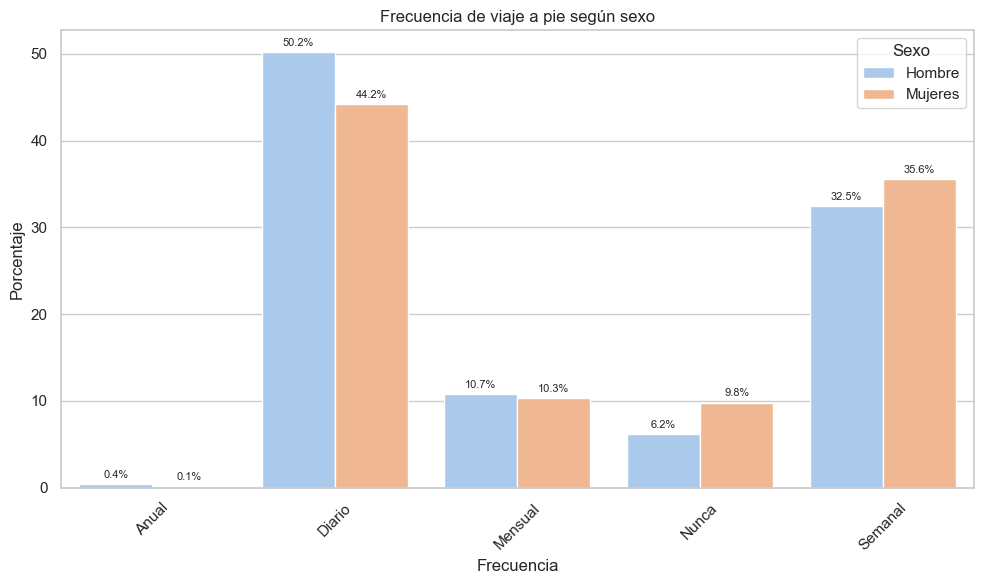

In [123]:
frecuencia_caminata_sexo = (
    personas_con_modo.groupby(['sexo', 'freqcaminata'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = frecuencia_caminata_sexo.groupby('sexo')['conteo'].transform('sum')
frecuencia_caminata_sexo['porcentaje'] = frecuencia_caminata_sexo['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=frecuencia_caminata_sexo, x='freqcaminata', y='porcentaje', hue='sexo')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Frecuencia de viaje a pie según sexo')
plt.xlabel('Frecuencia')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Sexo')
plt.show()

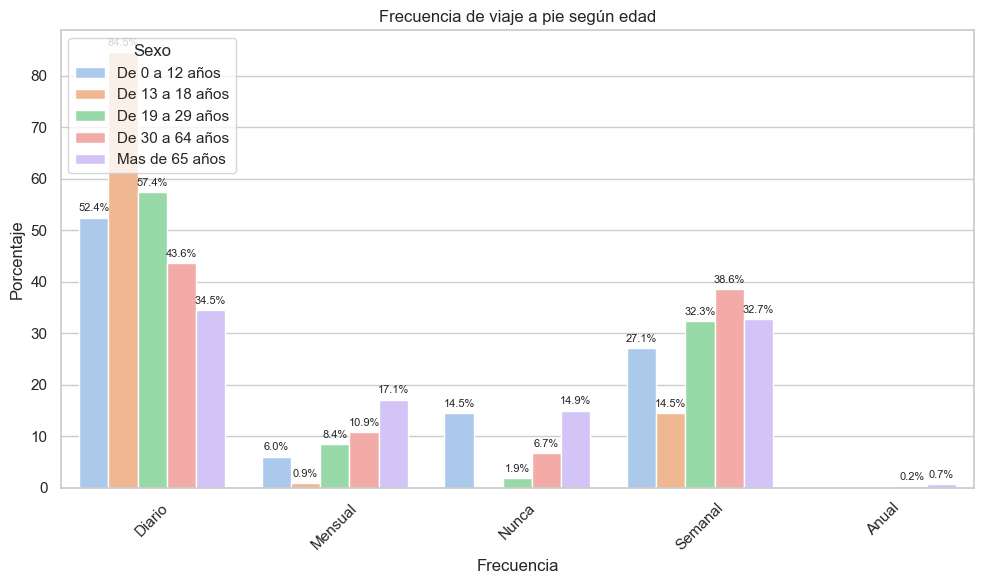

In [124]:
frecuencia_caminata_sexo = (
    personas_con_modo.groupby(['grupo_edad', 'freqcaminata'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = frecuencia_caminata_sexo.groupby('grupo_edad', observed=True)['conteo'].transform('sum')
frecuencia_caminata_sexo['porcentaje'] = frecuencia_caminata_sexo['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=frecuencia_caminata_sexo, x='freqcaminata', y='porcentaje', hue='grupo_edad')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Frecuencia de viaje a pie según edad')
plt.xlabel('Frecuencia')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Sexo')
plt.show()

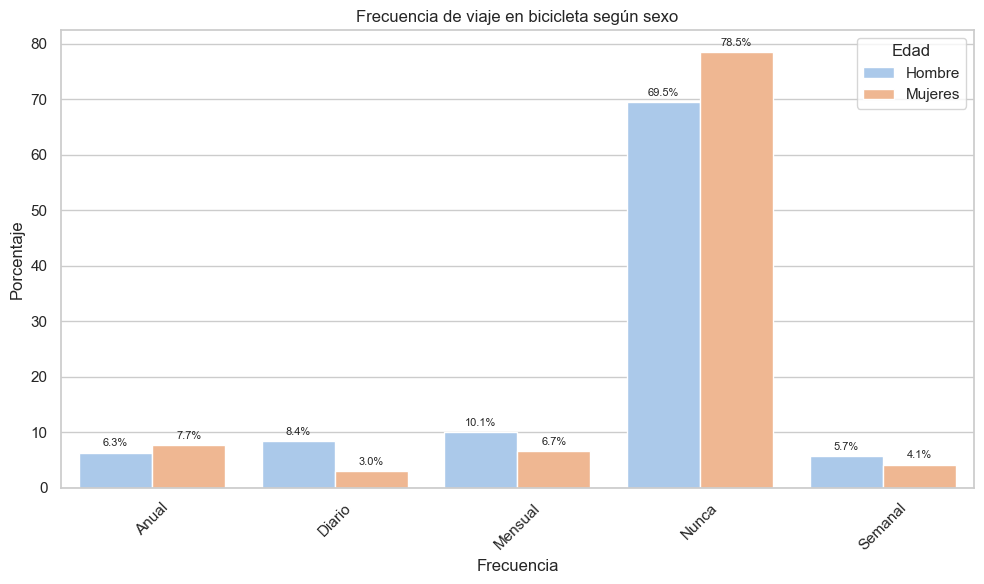

In [125]:
frecuencia_bicicleta_sexo = (
    personas_con_modo.groupby(['sexo', 'freqbicicleta'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = frecuencia_bicicleta_sexo.groupby('sexo', observed=True)['conteo'].transform('sum')
frecuencia_bicicleta_sexo['porcentaje'] = frecuencia_bicicleta_sexo['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=frecuencia_bicicleta_sexo, x='freqbicicleta', y='porcentaje', hue='sexo')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Frecuencia de viaje en bicicleta según sexo')
plt.xlabel('Frecuencia')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Edad')
plt.show()

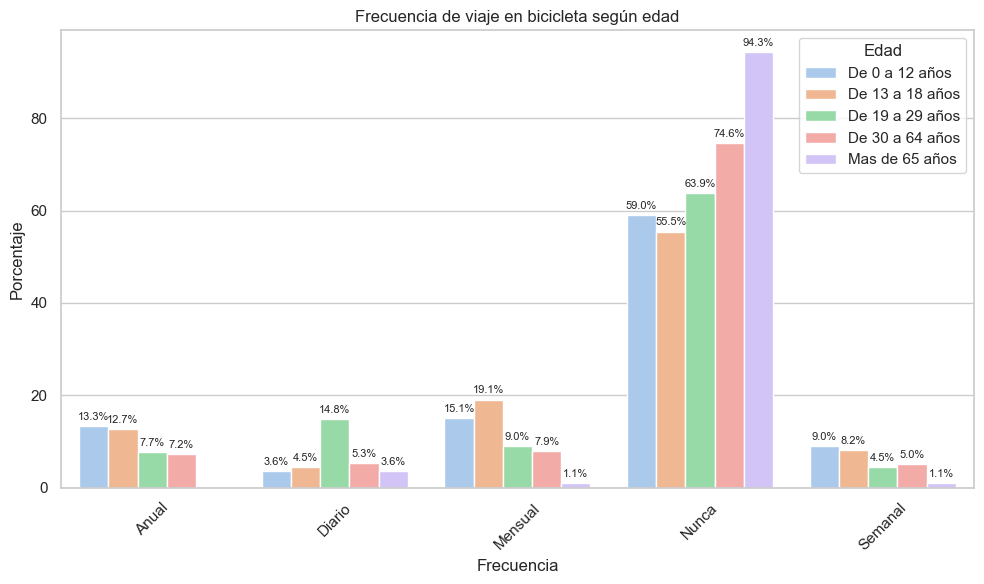

In [126]:
frecuencia_bicicleta_sexo = (
    personas_con_modo.groupby(['grupo_edad', 'freqbicicleta'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = frecuencia_bicicleta_sexo.groupby('grupo_edad', observed=True)['conteo'].transform('sum')
frecuencia_bicicleta_sexo['porcentaje'] = frecuencia_bicicleta_sexo['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=frecuencia_bicicleta_sexo, x='freqbicicleta', y='porcentaje', hue='grupo_edad')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Frecuencia de viaje en bicicleta según edad')
plt.xlabel('Frecuencia')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Edad')
plt.show()

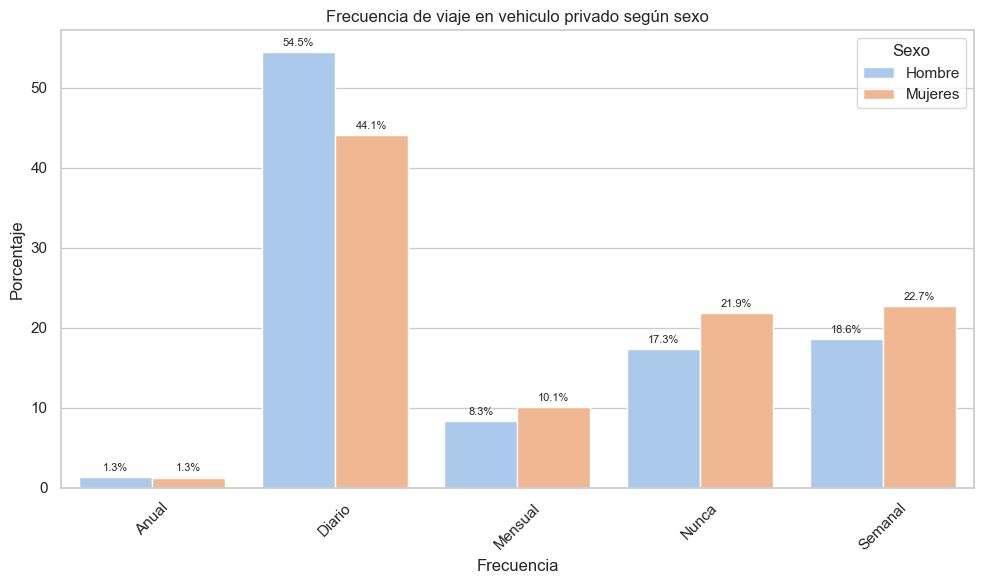

In [127]:
frecuencia_privado_sexo = (
    personas_con_modo.groupby(['sexo', 'freqprivado'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = frecuencia_privado_sexo.groupby('sexo',observed=True)['conteo'].transform('sum')
frecuencia_privado_sexo['porcentaje'] = frecuencia_privado_sexo['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=frecuencia_privado_sexo, x='freqprivado', y='porcentaje', hue='sexo')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Frecuencia de viaje en vehiculo privado según sexo')
plt.xlabel('Frecuencia')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Sexo')
plt.show()

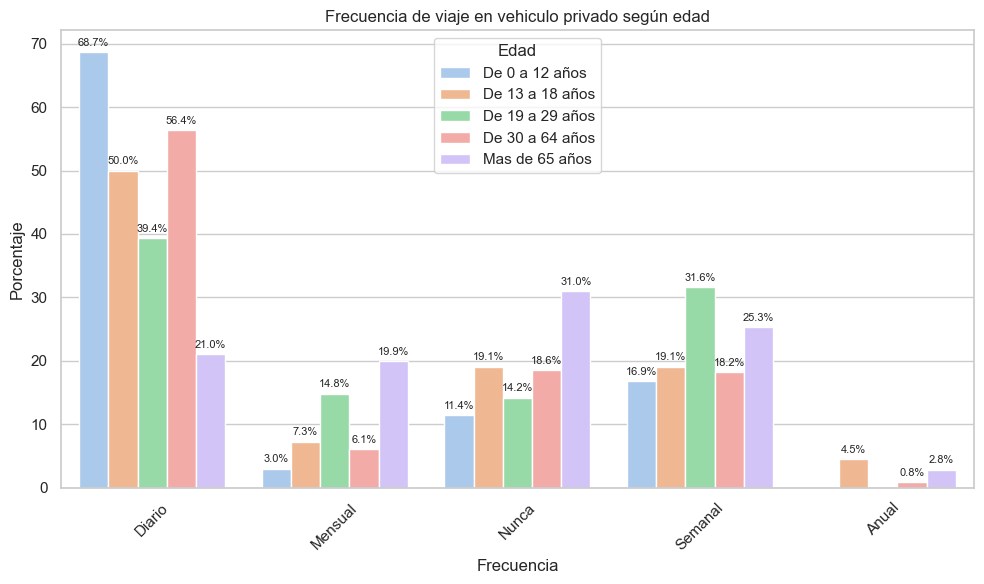

In [128]:
frecuencia_privado_sexo = (
    personas_con_modo.groupby(['grupo_edad', 'freqprivado'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = frecuencia_privado_sexo.groupby('grupo_edad',observed=True)['conteo'].transform('sum')
frecuencia_privado_sexo['porcentaje'] = frecuencia_privado_sexo['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=frecuencia_privado_sexo, x='freqprivado', y='porcentaje', hue='grupo_edad')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Frecuencia de viaje en vehiculo privado según edad')
plt.xlabel('Frecuencia')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Edad')
plt.show()

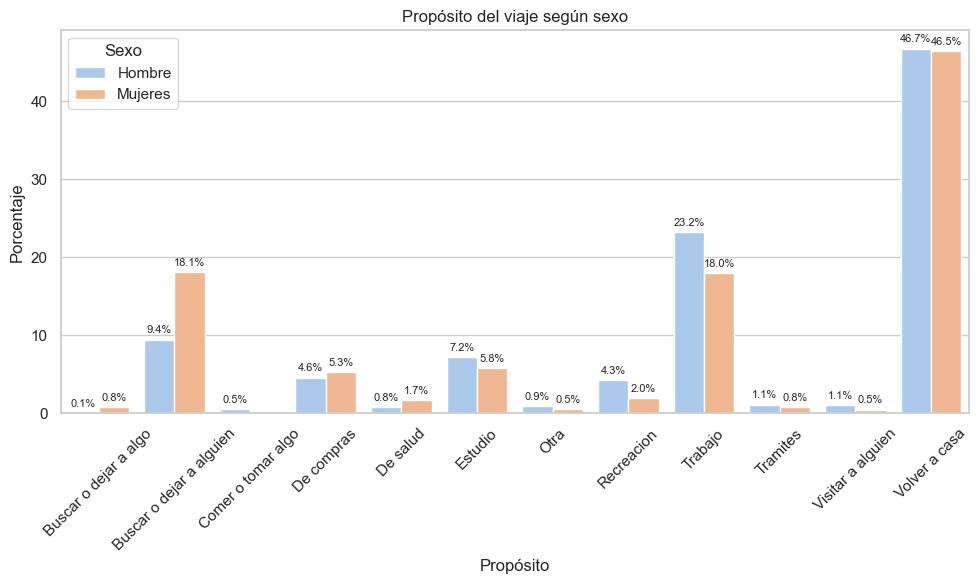

In [129]:
proposito_sexo = (
    viajes_unicos.merge(personas_con_modo[['folio', 'ordenpersona', 'sexo']], on=['folio', 'ordenpersona'], how='left')
    .groupby(['sexo', 'proposito'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = proposito_sexo.groupby('sexo')['conteo'].transform('sum')
proposito_sexo['porcentaje'] = proposito_sexo['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=proposito_sexo, x='proposito', y='porcentaje', hue='sexo')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Propósito del viaje según sexo')
plt.xlabel('Propósito')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Sexo')
plt.show()

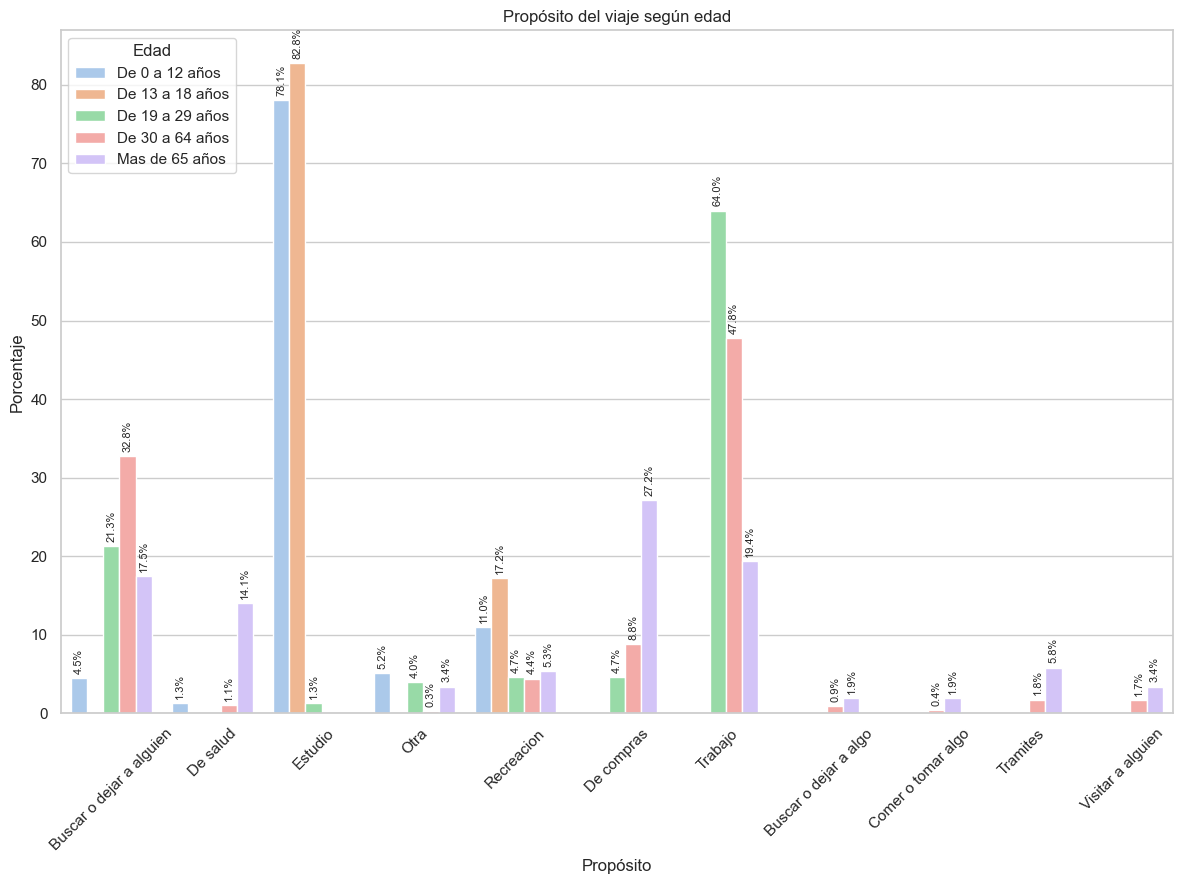

In [160]:
proposito_edad = (
    viajes_unicos
    .merge(personas_con_modo[['folio', 'ordenpersona', 'grupo_edad']], on=['folio', 'ordenpersona'], how='left')
    .query("proposito != 'Volver a casa'") 
    .groupby(['grupo_edad', 'proposito'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = proposito_edad.groupby('grupo_edad', observed=True)['conteo'].transform('sum')
proposito_edad['porcentaje'] = proposito_edad['conteo'] / total * 100

plt.figure(figsize=(12, 9))
sns.set_palette("pastel")
grafico = sns.barplot(data=proposito_edad, x='proposito', y='porcentaje', hue='grupo_edad')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom',
                             rotation=90, fontsize=8)

plt.title('Propósito del viaje según edad')
plt.xlabel('Propósito')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Edad')
plt.savefig('graficos/proposito_vs_edad.png', dpi=300, bbox_inches='tight')
plt.show()


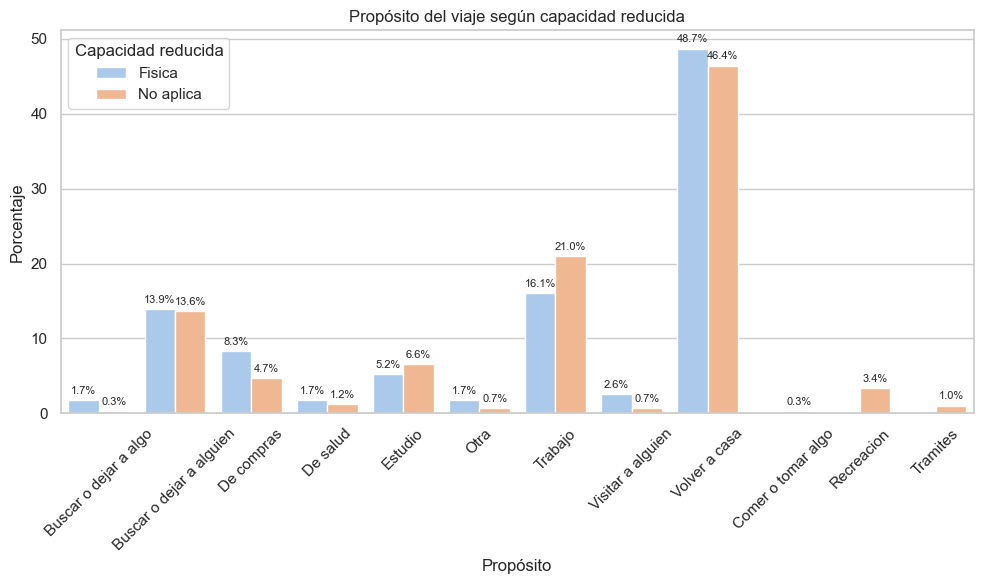

In [131]:
proposito_capred = (
    viajes_unicos.merge(personas_con_modo[['folio', 'ordenpersona', 'capredtipo']], on=['folio', 'ordenpersona'], how='left')
    .groupby(['capredtipo', 'proposito'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = proposito_capred.groupby('capredtipo')['conteo'].transform('sum')
proposito_capred['porcentaje'] = proposito_capred['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=proposito_capred, x='proposito', y='porcentaje', hue='capredtipo')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Propósito del viaje según capacidad reducida')
plt.xlabel('Propósito')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Capacidad reducida')
plt.show()

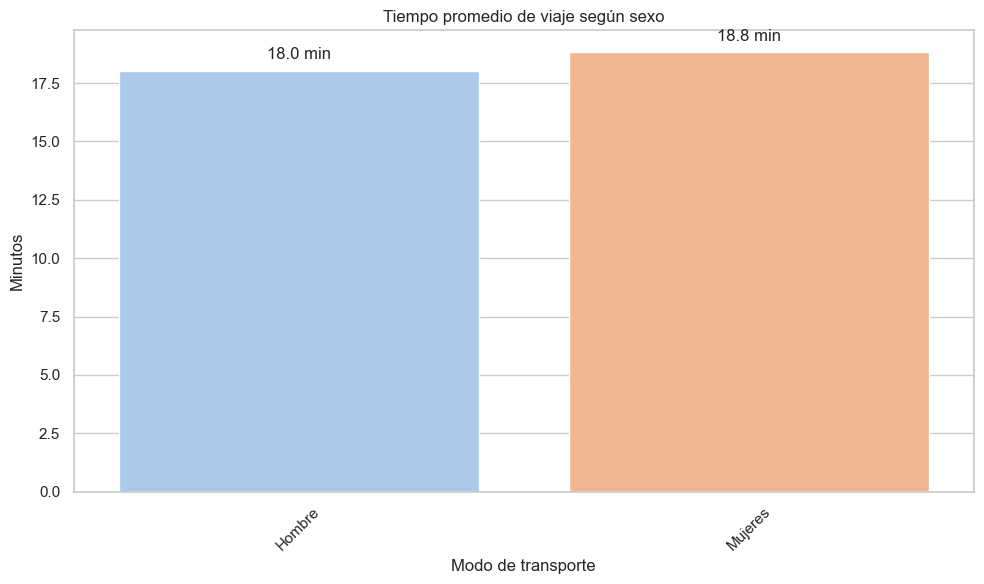

In [132]:
tiempo_promedio = (
    personas_con_modo.groupby('sexo')['tiempoviaje_min']
    .mean()
    .reset_index(name='tiempo_promedio')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=tiempo_promedio, x='sexo', y='tiempo_promedio', palette='pastel')

for i, row in tiempo_promedio.iterrows():
    plt.text(i, row['tiempo_promedio'] + 0.5, f"{row['tiempo_promedio']:.1f} min", ha='center')

plt.title('Tiempo promedio de viaje según sexo')
plt.xlabel('Modo de transporte')
plt.ylabel('Minutos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

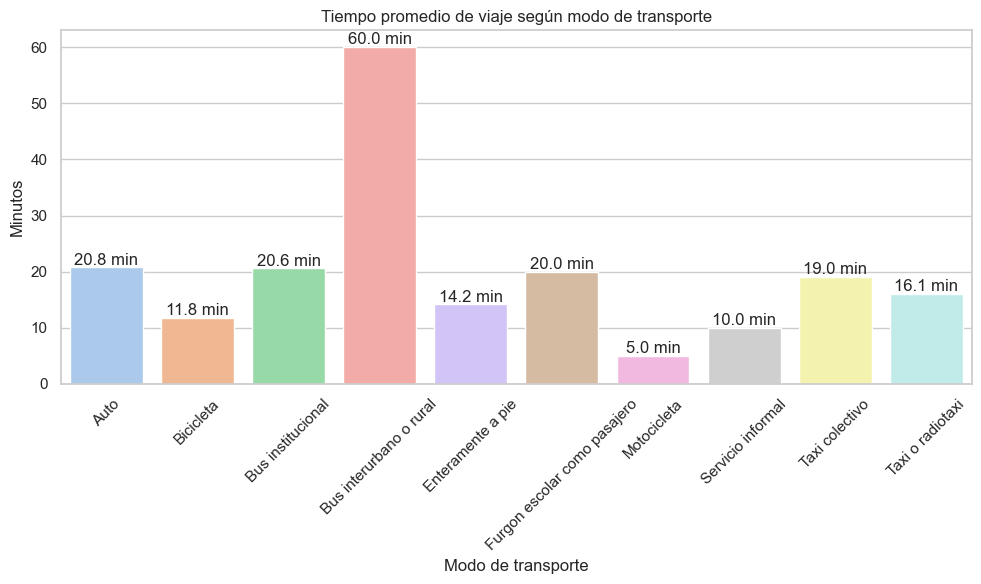

In [133]:
tiempo_promedio = (
    personas_con_modo.groupby('modoetapa1')['tiempoviaje_min']
    .mean()
    .reset_index(name='tiempo_promedio')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=tiempo_promedio, x='modoetapa1', y='tiempo_promedio', palette='pastel')

for i, row in tiempo_promedio.iterrows():
    plt.text(i, row['tiempo_promedio'] + 0.5, f"{row['tiempo_promedio']:.1f} min", ha='center')

plt.title('Tiempo promedio de viaje según modo de transporte')
plt.xlabel('Modo de transporte')
plt.ylabel('Minutos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Catalina\AppData\Local\Temp\ipykernel_10372\1344009454.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = periodo_edad.groupby('grupo_edad')['conteo'].transform('sum')


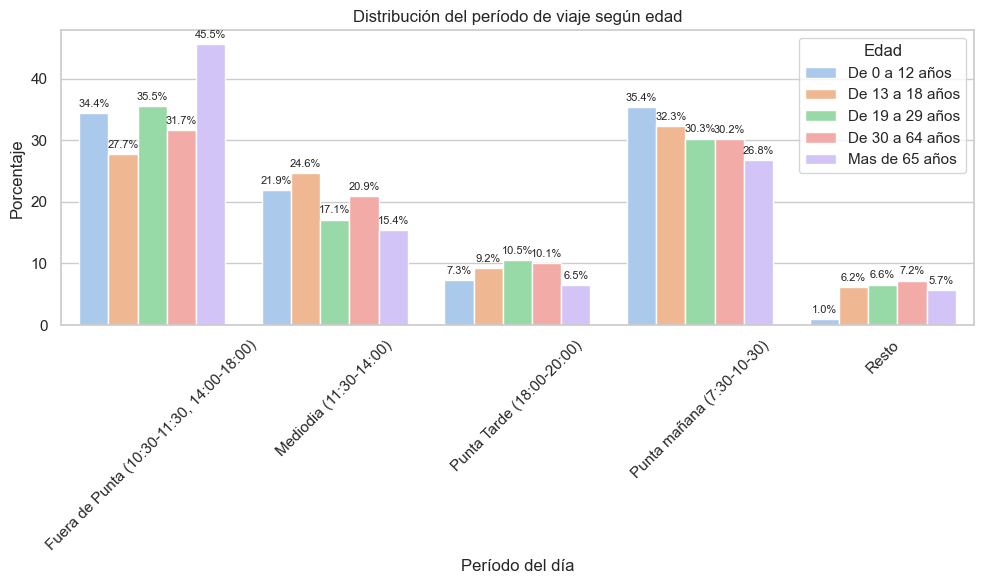

In [134]:
periodo_edad = (
    personas_con_modo.groupby(['grupo_edad', 'periodo'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = periodo_edad.groupby('grupo_edad')['conteo'].transform('sum')
periodo_edad['porcentaje'] = periodo_edad['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=periodo_edad, x='periodo', y='porcentaje', hue='grupo_edad')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Distribución del período de viaje según edad')
plt.xlabel('Período del día')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Edad')
plt.show()

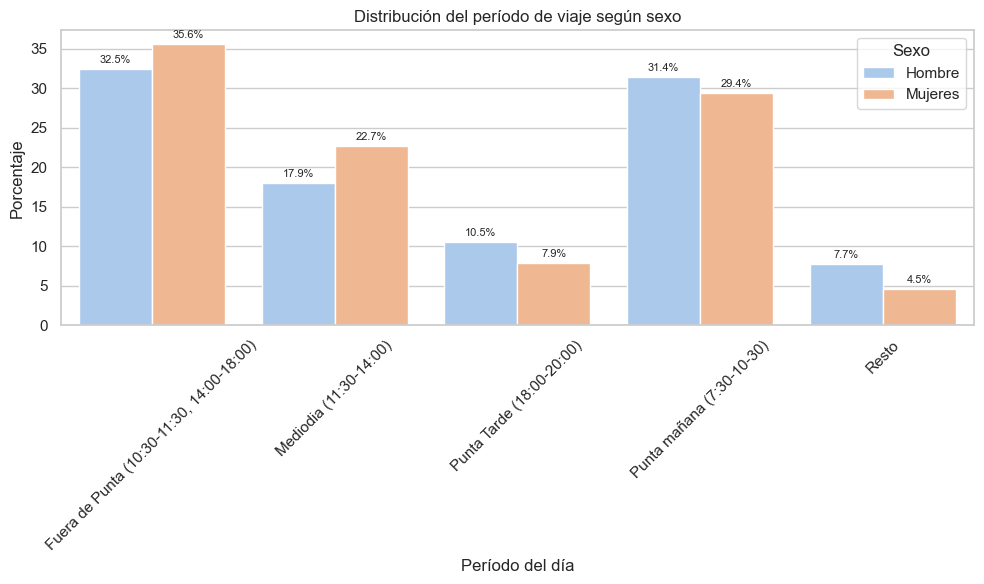

In [135]:
periodo_sexo = (
    personas_con_modo.groupby(['sexo', 'periodo'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = periodo_sexo.groupby('sexo')['conteo'].transform('sum')
periodo_sexo['porcentaje'] = periodo_sexo['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=periodo_sexo, x='periodo', y='porcentaje', hue='sexo')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Distribución del período de viaje según sexo')
plt.xlabel('Período del día')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Sexo')
plt.show()

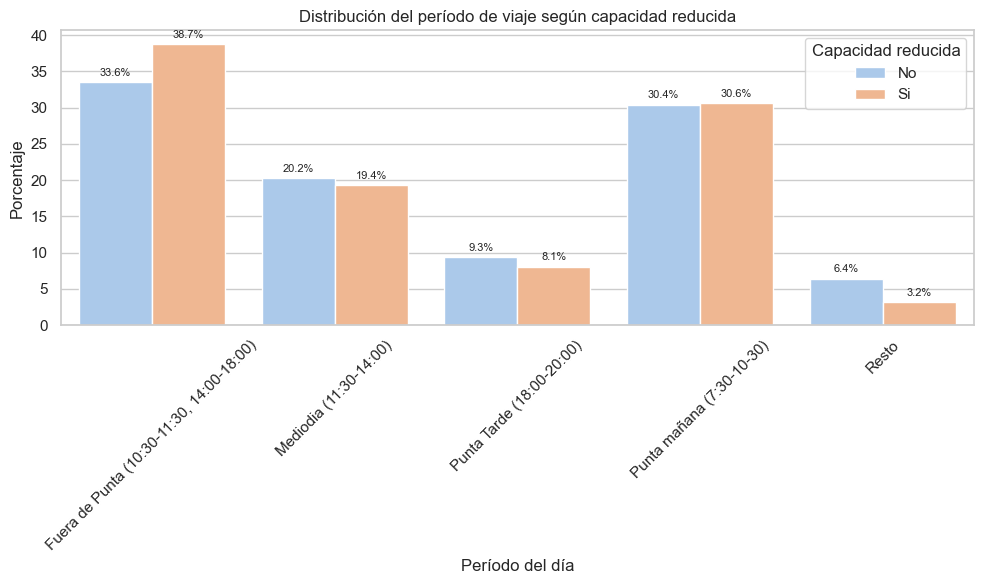

In [136]:
periodo_capred = (
    personas_con_modo.groupby(['periodo', 'integrantecapred'], observed=True)
    .size()
    .reset_index(name='conteo')
)

total = periodo_capred.groupby('integrantecapred')['conteo'].transform('sum')
periodo_capred['porcentaje'] = periodo_capred['conteo'] / total * 100

plt.figure(figsize=(10, 6))
sns.set_palette("pastel")
grafico = sns.barplot(data=periodo_capred, x='periodo', y='porcentaje', hue='integrantecapred')

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(f'{height:.1f}%',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords='offset points',
                             ha='center', va='bottom', fontsize=8)

plt.title('Distribución del período de viaje según capacidad reducida')
plt.xlabel('Período del día')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Capacidad reducida')
plt.show()

In [137]:
#Consultas Chofer 

In [138]:
# Pasajeros menores de 18 en auto con propósito estudio
pasajeros_menores = base_total[
    (base_total['grupo_edad'].isin(['De 0 a 12 años', 'De 13 a 18 años'])) &
    (base_total['modoetapa1'] == 'Auto') &
    (base_total['tipoasiento_x'] == 'Pasajero') &
    (base_total['proposito'] == 'Estudio')
][['folio', 'ordenviaje']].drop_duplicates()

# Unir para buscar al chofer del mismo viaje
choferes_en_viajes = base_total[
    (base_total['modoetapa1'] == 'Auto') &
    (base_total['tipoasiento_x'] == 'Chofer')
][['folio', 'ordenviaje', 'sexo', 'grupo_edad', 'proposito', 'horasalida']]

# Merge para ver solo choferes de los viajes donde hubo menores en auto y por estudio
choferes_de_menores = pasajeros_menores.merge(
    choferes_en_viajes,
    on=['folio', 'ordenviaje'],
    how='inner'
)

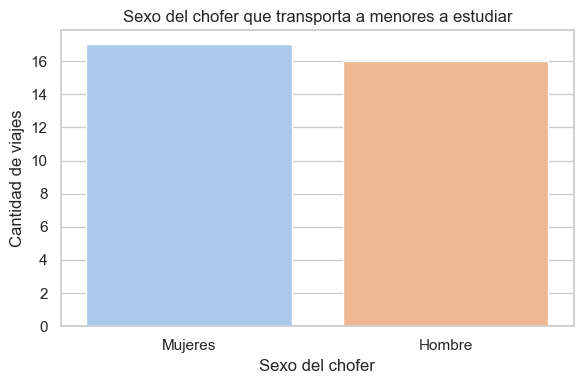

In [139]:
plt.figure(figsize=(6, 4))
sns.countplot(data=choferes_de_menores, x='sexo')

plt.title('Sexo del chofer que transporta a menores a estudiar')
plt.xlabel('Sexo del chofer')
plt.ylabel('Cantidad de viajes')
plt.tight_layout()
plt.show()

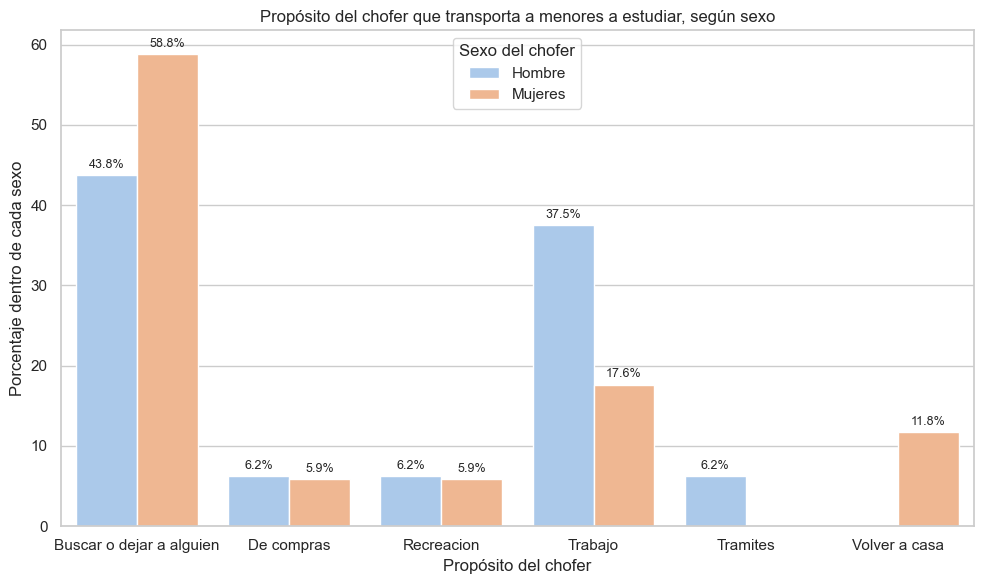

In [152]:
conteo = choferes_de_menores.groupby(['proposito', 'sexo']).size().reset_index(name='cantidad')
conteo['porcentaje'] = conteo['cantidad'] / conteo.groupby('sexo')['cantidad'].transform('sum') * 100

grafico = sns.barplot(
    data=conteo,
    x='proposito',
    y='porcentaje',
    hue='sexo'
)

for container in grafico.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            grafico.annotate(
                f'{height:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9
            )

plt.title('Propósito del chofer que transporta a menores a estudiar, según sexo')
plt.xlabel('Propósito del chofer')
plt.ylabel('Porcentaje dentro de cada sexo')
plt.legend(title='Sexo del chofer')
plt.savefig('graficos/proposito_vs_chofersexo.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()